In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [ ]:
import pip

In [ ]:
!pip install tensorflow

In [56]:
!pip install tqdm

In [164]:
 import tensorflow as tf
from keras.datasets import mnist
(X_train,Y_train), (X_test,Y_test)=mnist.load_data(path='/kaggle/input/mnistnpz/mnist.npz')
import matplotlib.pyplot as plt
from keras.layers import Dense,Input,Flatten,Conv2D,MaxPool2D,LeakyReLU,Reshape,Dropout
from keras.models import Model,Sequential
from keras.optimizers import Adam
import shutil


In [ ]:
os.makedirs('output')

In [166]:
train_filter = np.where((Y_train == 3 ))
test_filter = np.where((Y_test == 3))
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]                       

X=np.vstack((X_train, X_test))
X=X.astype('float32')
X=(X-127.5)/127.5

In [46]:
def discriminator_dense():
    inp=Input(shape=(28,28,1))
    
    x=Flatten()(inp)
    x=Dropout(0.4)(x)
    x=Dense(1024,activation=LeakyReLU(alpha=0.2))(x)
    x=Dropout(0.4)(x)
    x=Dense(512,activation=LeakyReLU(alpha=0.2))(x)
    op=Dense(1,activation="sigmoid")(x)
    model=Model(inp,op)
    model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy")
    return model

In [ ]:
def generator(n):
    inp=Input(shape=(n))
    
    x=Dense(256,activation=LeakyReLU(alpha=0.2))(inp)
    x=Dense(512,activation=LeakyReLU(alpha=0.2))(x)
    x=Dense(1024,activation=LeakyReLU(alpha=0.2))(x)
    x=Dense(784,activation='tanh')(x)
    
    op=Reshape((28,28,1))(x)
    return Model(inp,op)

In [42]:
def gan(discrim, gen):
    discrim.trainable=False
    
    model=Sequential()
    
    model.add(gen)
    model.add(discrim)
    
    model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy")
    
    return model

In [ ]:
discrim=discriminator_dense()

In [ ]:
gener=generator(100)

In [ ]:
gan_model=gan(discrim,gener)

In [ ]:
plt.imshow(gener.predict(np.random.randn(100).reshape(1,100)).reshape(28,28), cmap="gray")
plt.xlabel(discrim.predict(gener.predict(np.random.randn(100).reshape(1,100))))

In [ ]:
plt.imshow(X[0].reshape(28,28), cmap="gray")
plt.xlabel(discrim.predict(X[15].reshape(1,28,28,1)))

In [168]:
epochs=80
batch_size=2048
half_batch=batch_size//2
n=100
losses=[]


In [1]:
from tqdm import tqdm
   

EPOCH  0


100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


losses-> 0.5901727676391602   1.3279438018798828


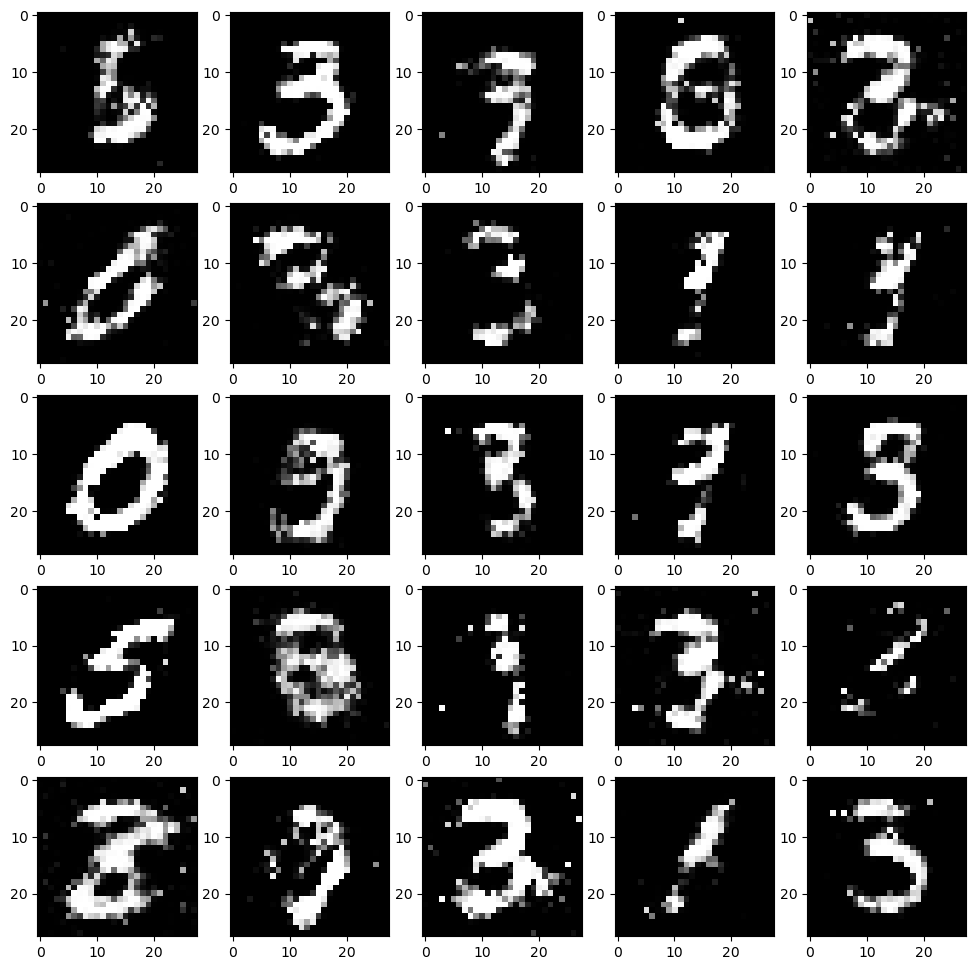

EPOCH  1


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6059191226959229   1.1062580347061157


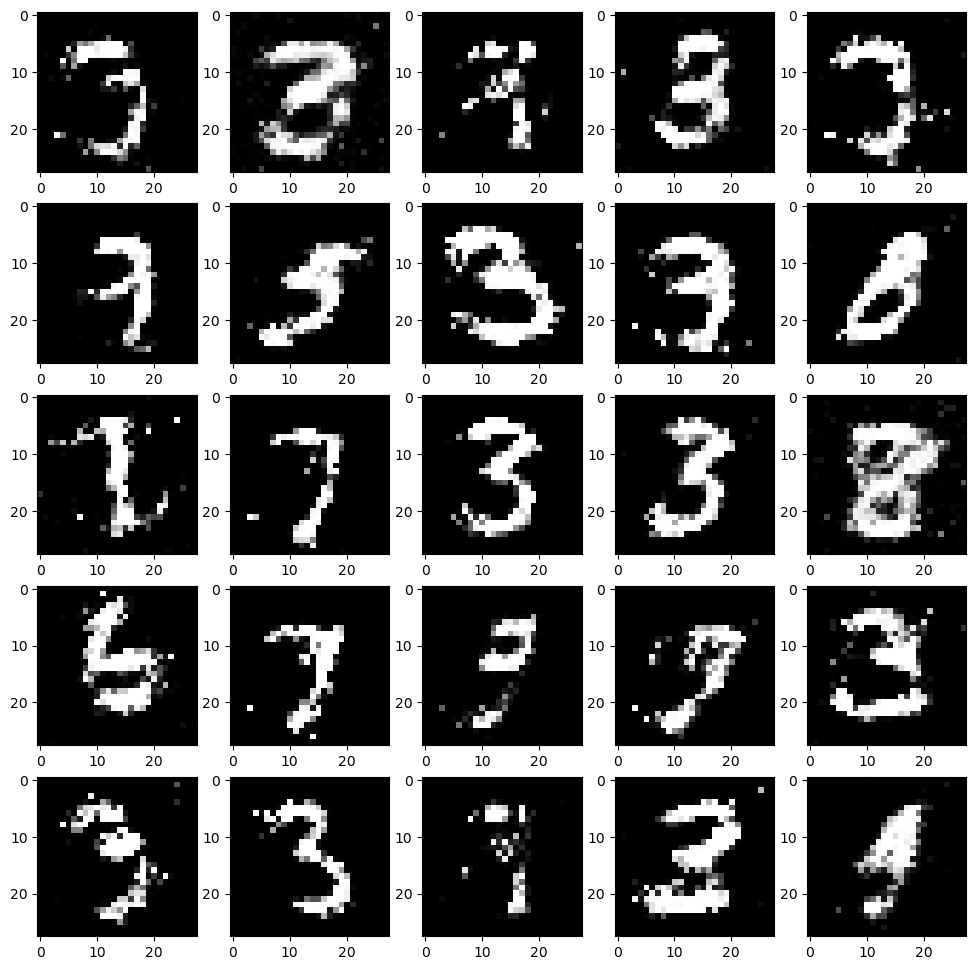

EPOCH  2


100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


losses-> 0.5669188499450684   1.1761393547058105


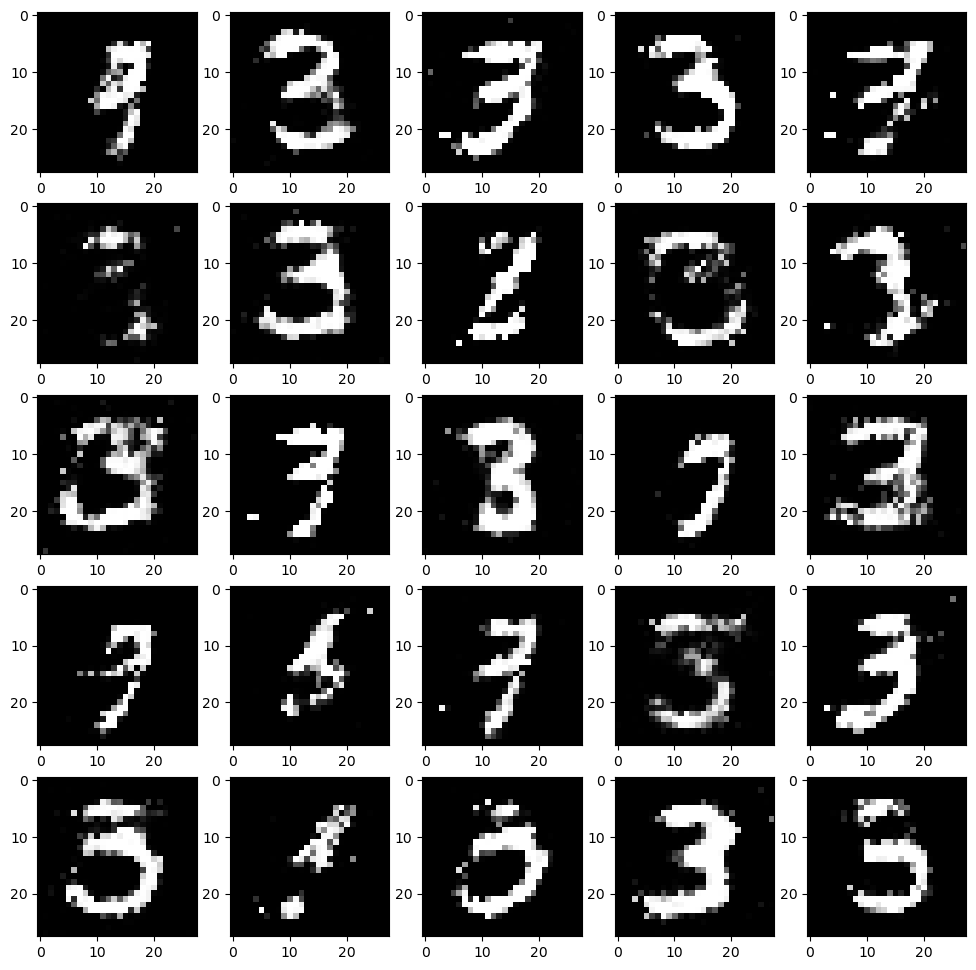

EPOCH  3


100%|██████████| 3/3 [00:01<00:00,  1.68it/s]


losses-> 0.5813478231430054   1.2306723594665527


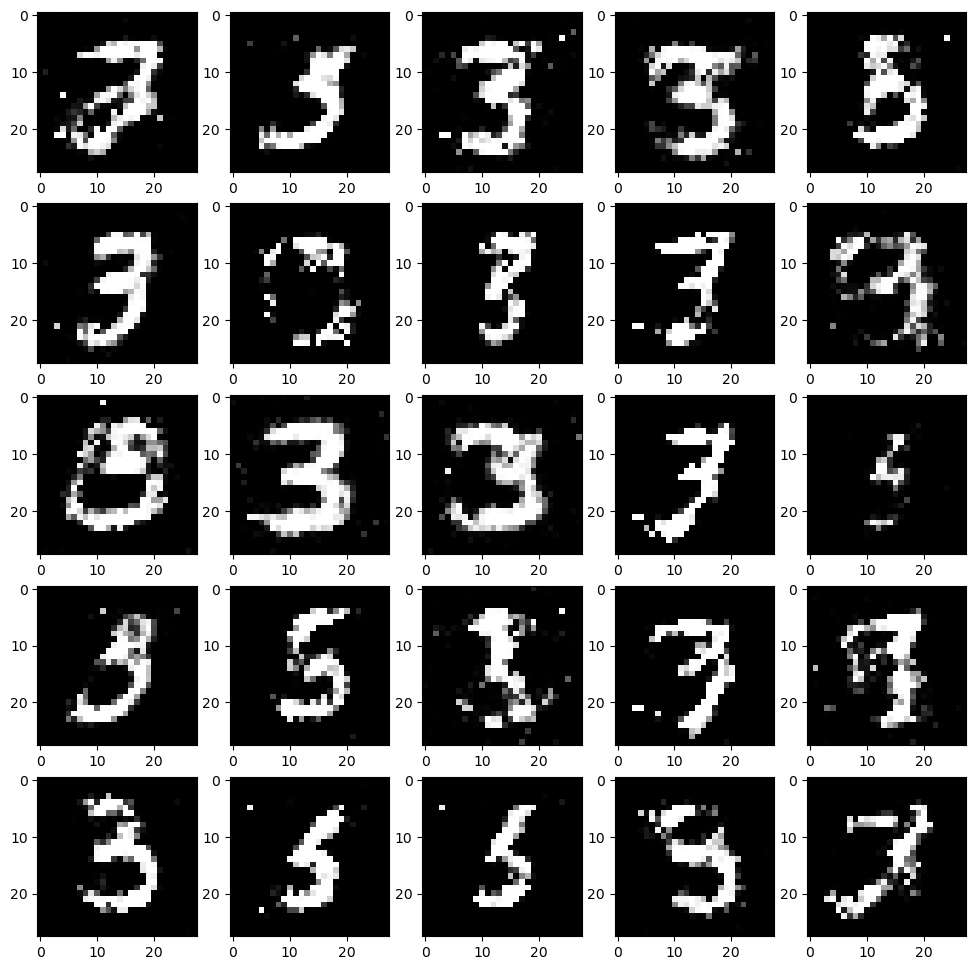

EPOCH  4


100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


losses-> 0.6111937761306763   1.0492794513702393


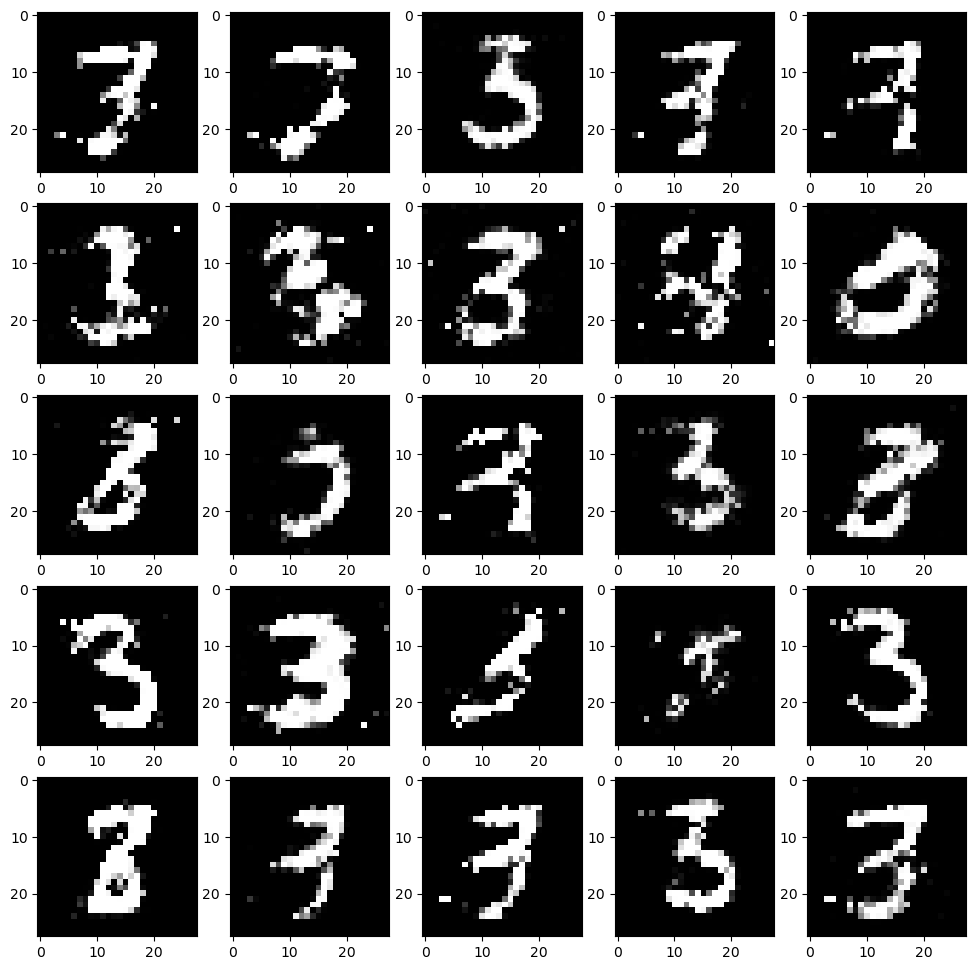

EPOCH  5


100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


losses-> 0.5987457036972046   1.0791032314300537


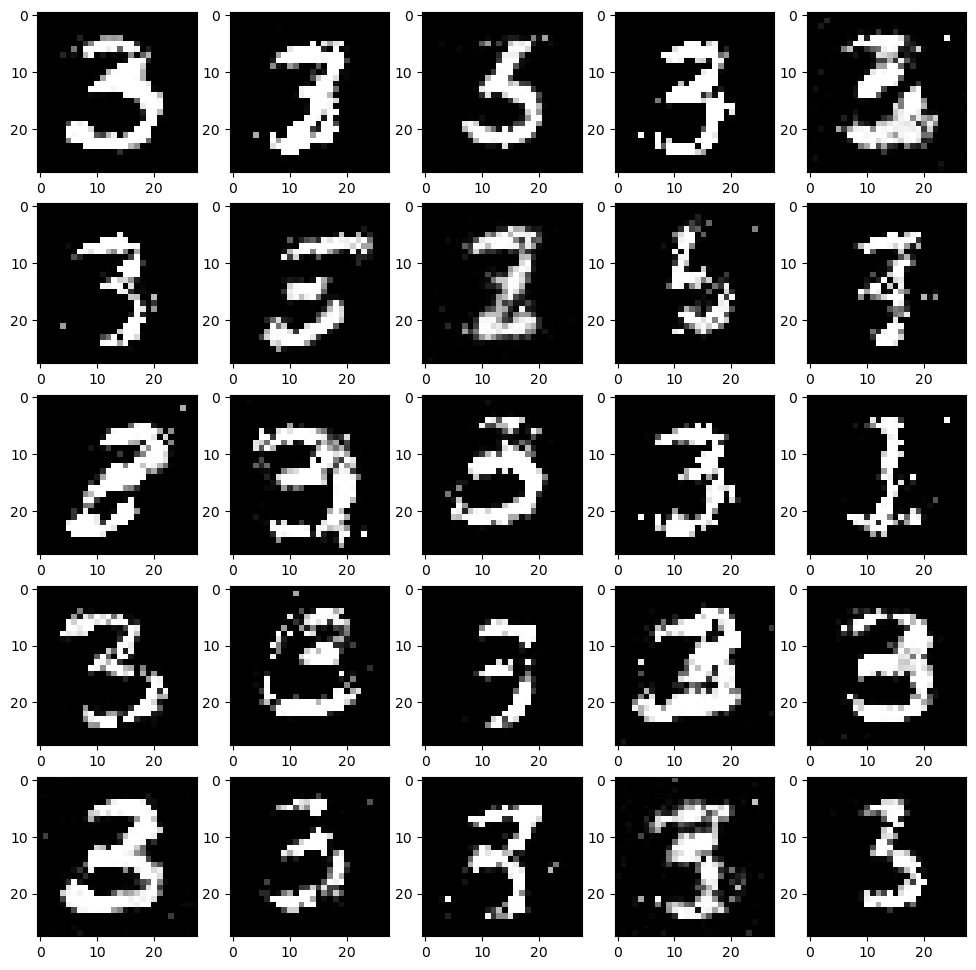

EPOCH  6


100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


losses-> 0.5939093232154846   1.0822041034698486


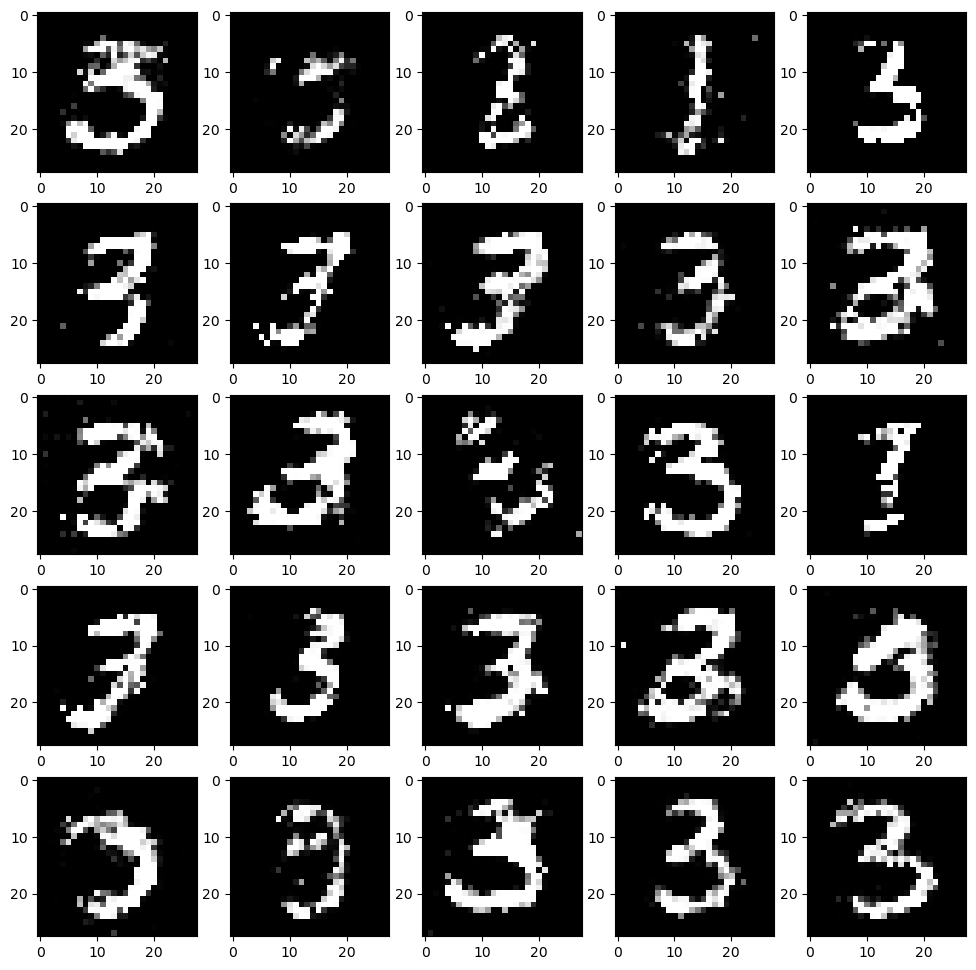

EPOCH  7


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


losses-> 0.6013278961181641   1.0916411876678467


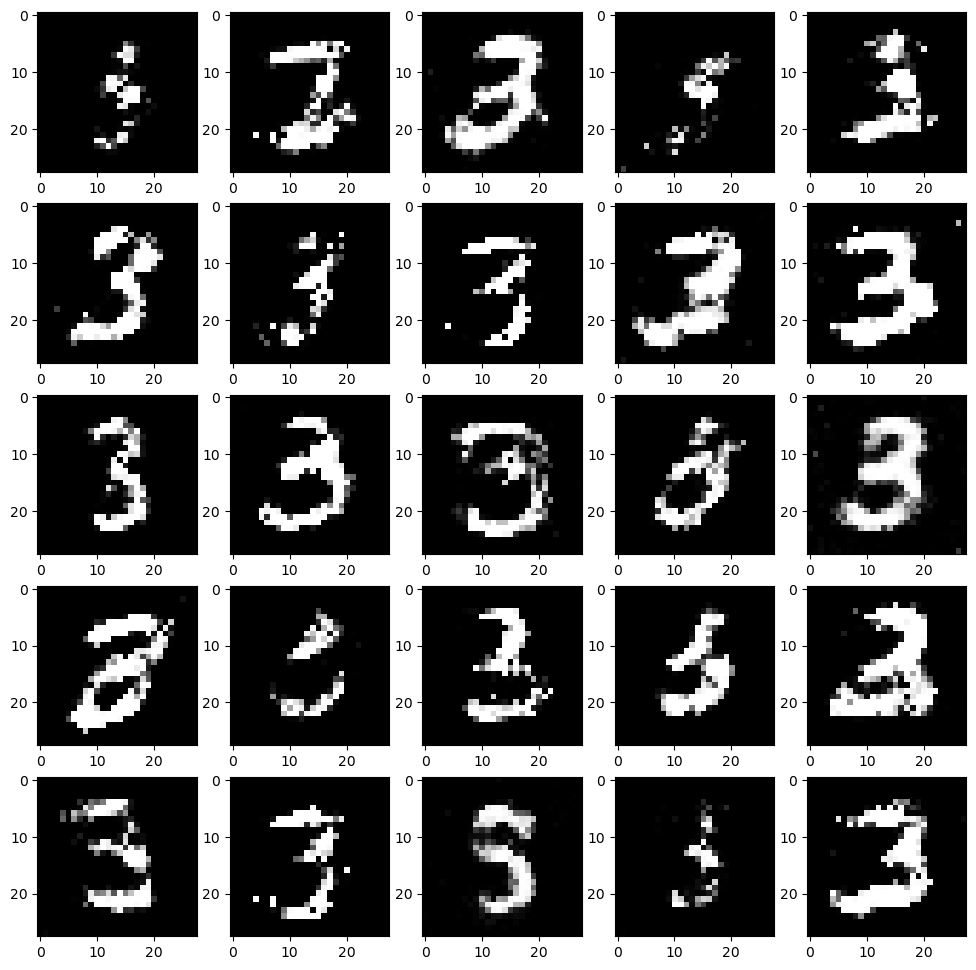

EPOCH  8


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6354163885116577   1.0979580879211426


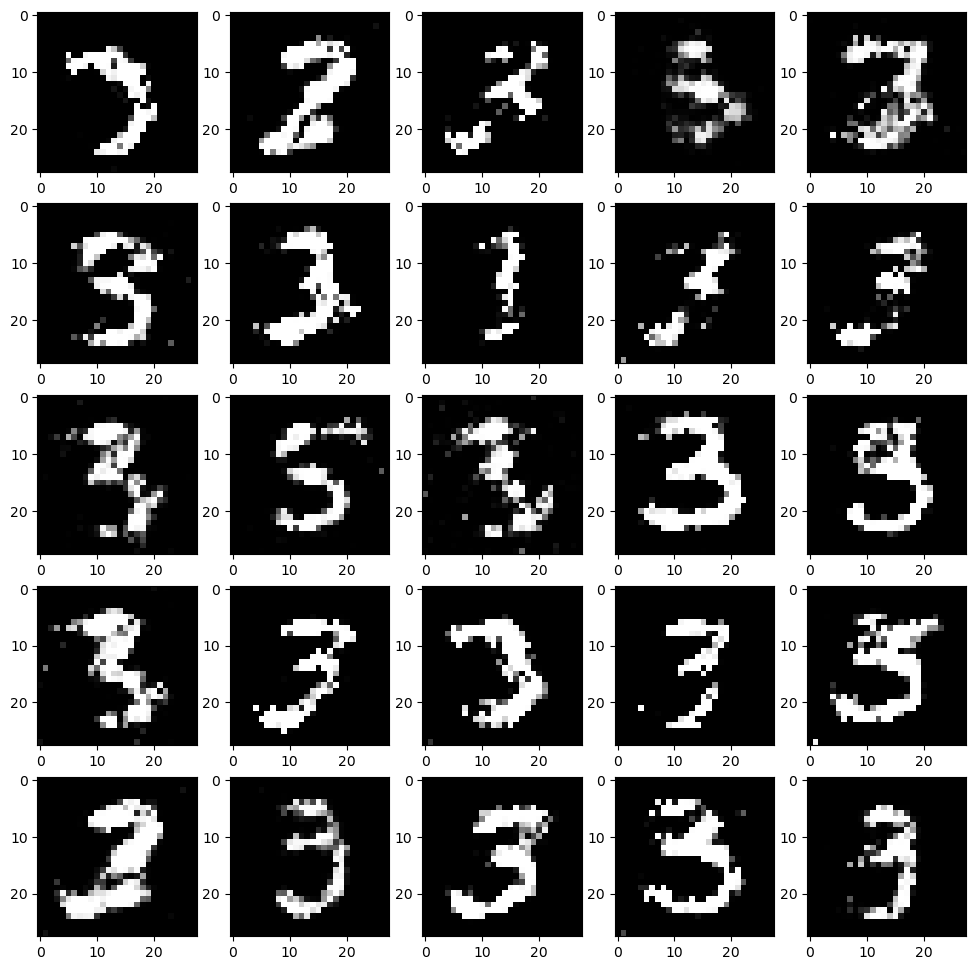

EPOCH  9


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


losses-> 0.6409860849380493   1.0594573020935059


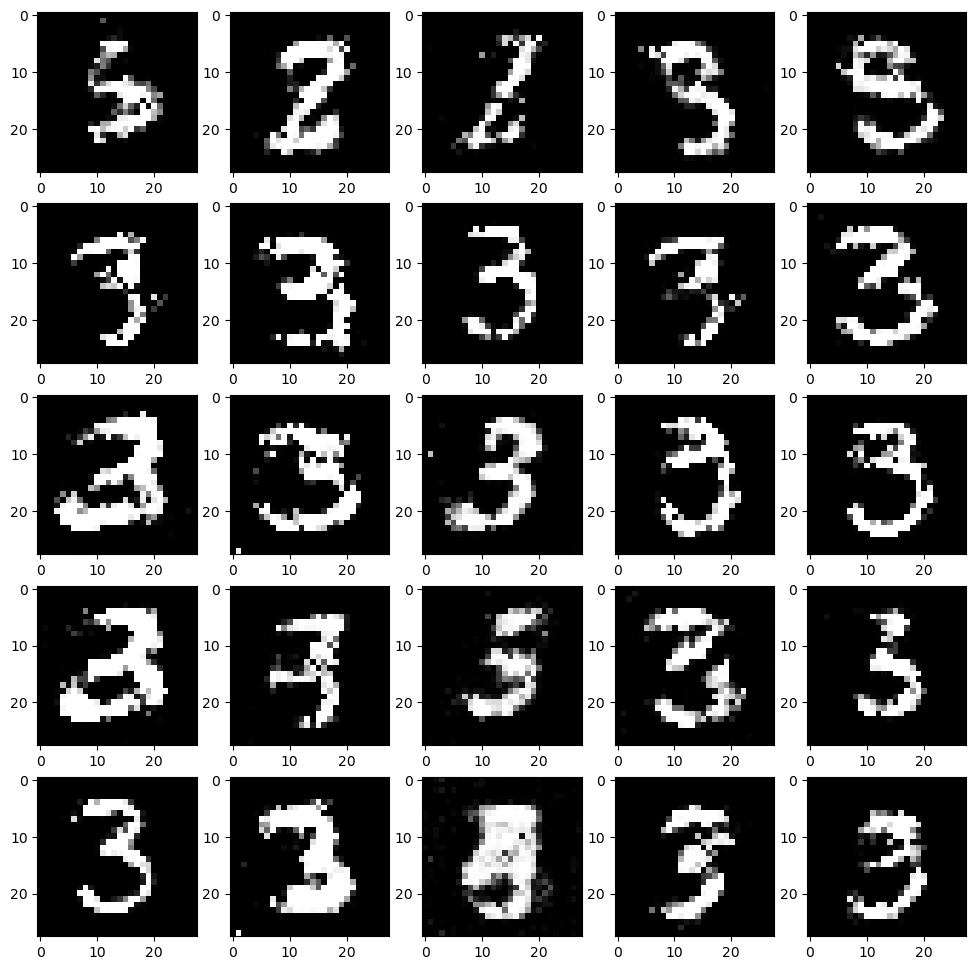

EPOCH  10


100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


losses-> 0.6475306749343872   0.9549585580825806


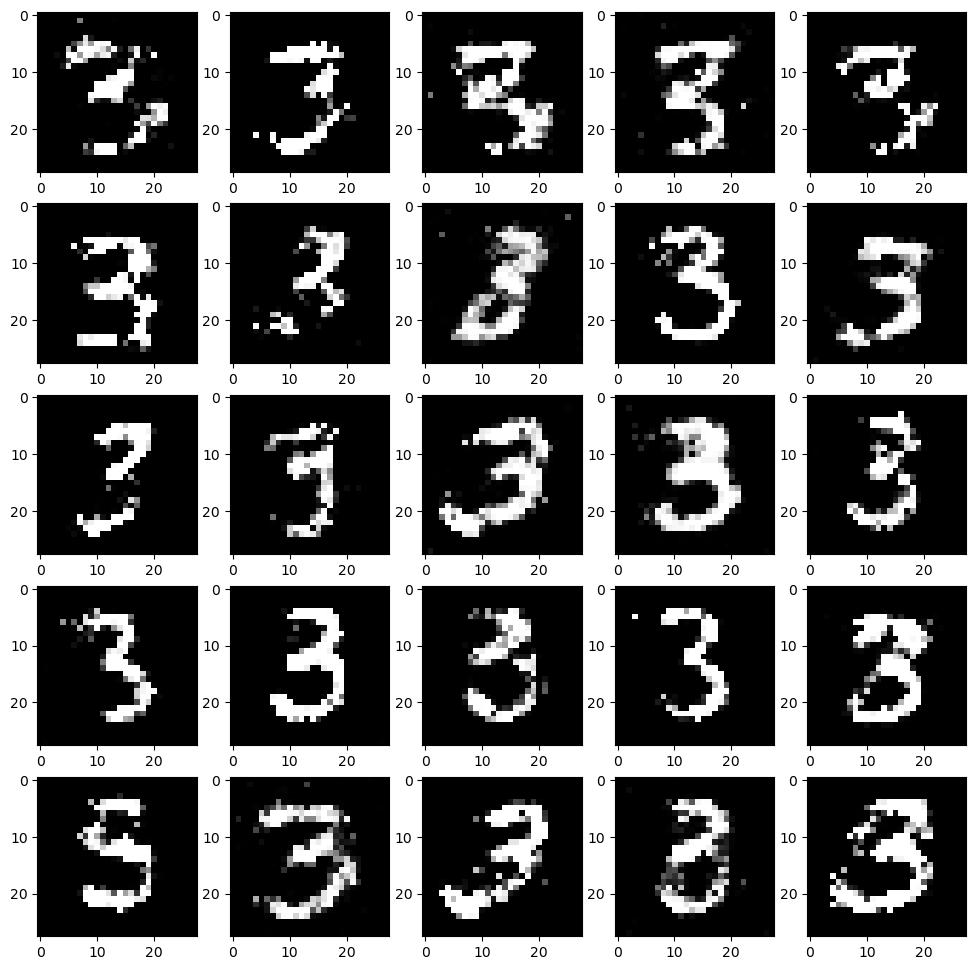

EPOCH  11


100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


losses-> 0.6581991910934448   0.9170583486557007


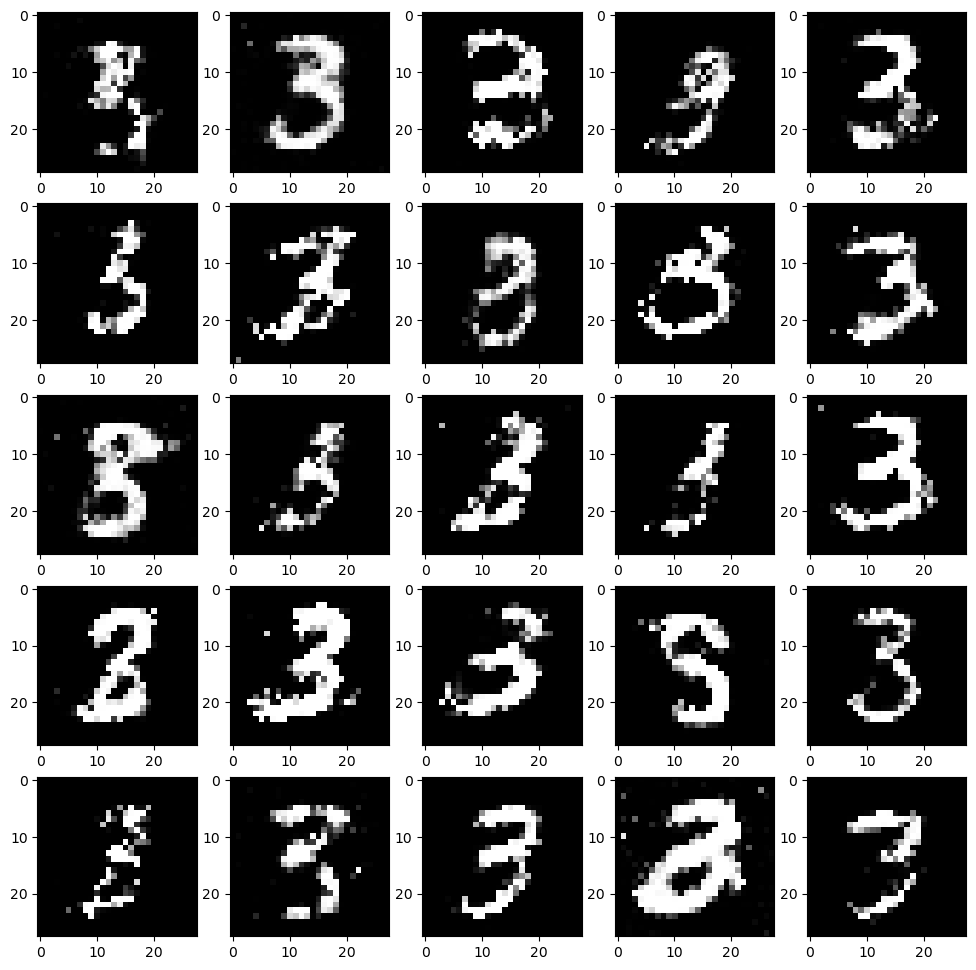

EPOCH  12


100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


losses-> 0.6416960954666138   0.935327410697937


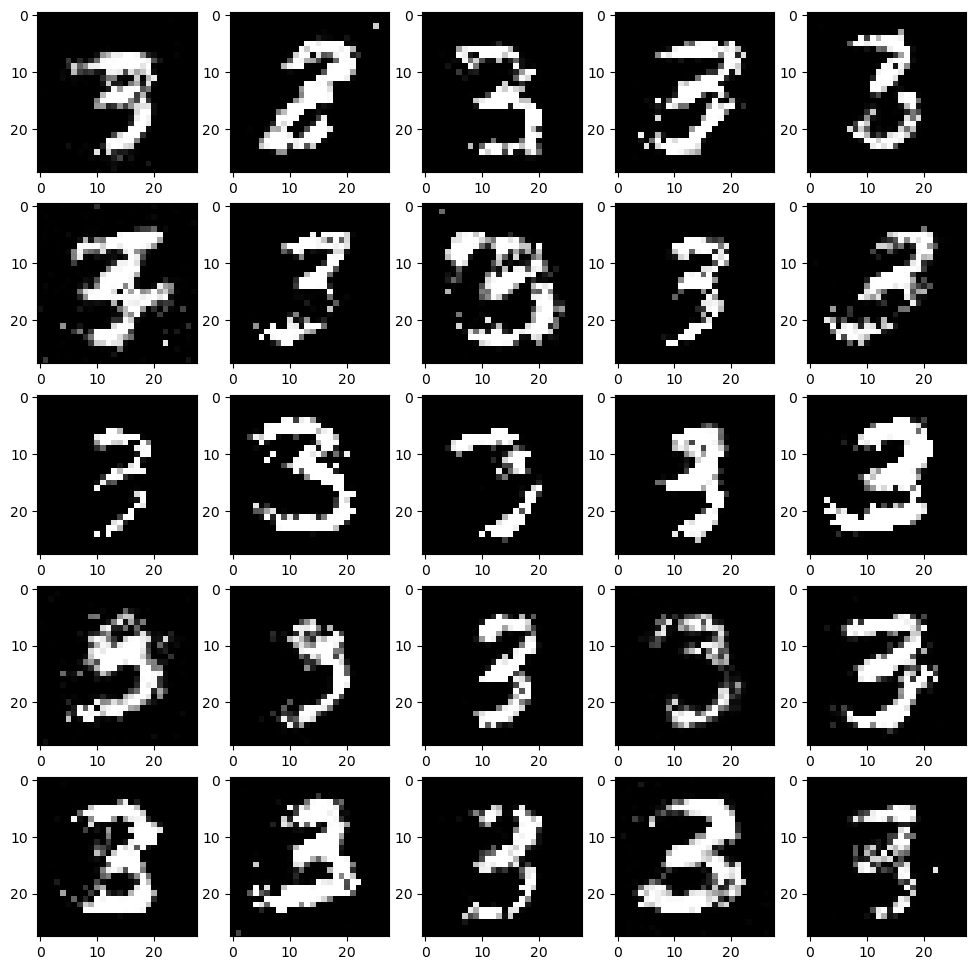

EPOCH  13


100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


losses-> 0.6357940435409546   0.9590456485748291


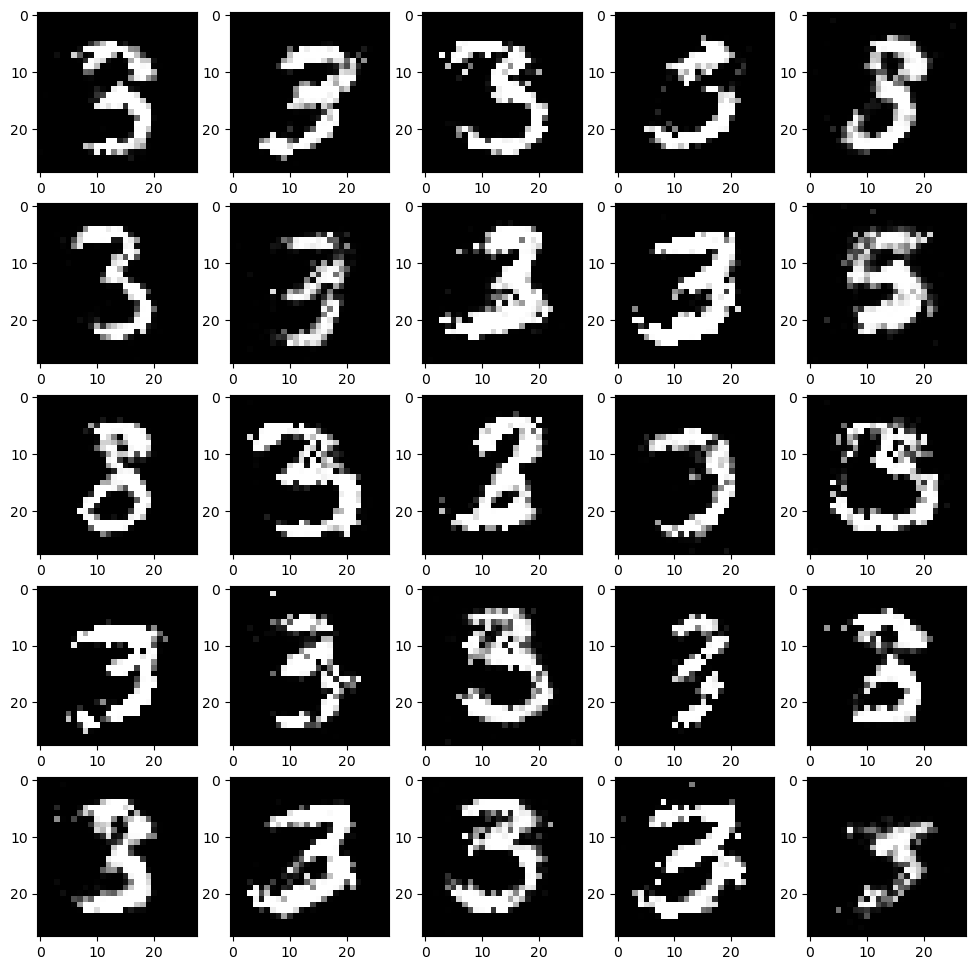

EPOCH  14


100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


losses-> 0.6398991346359253   0.8977072834968567


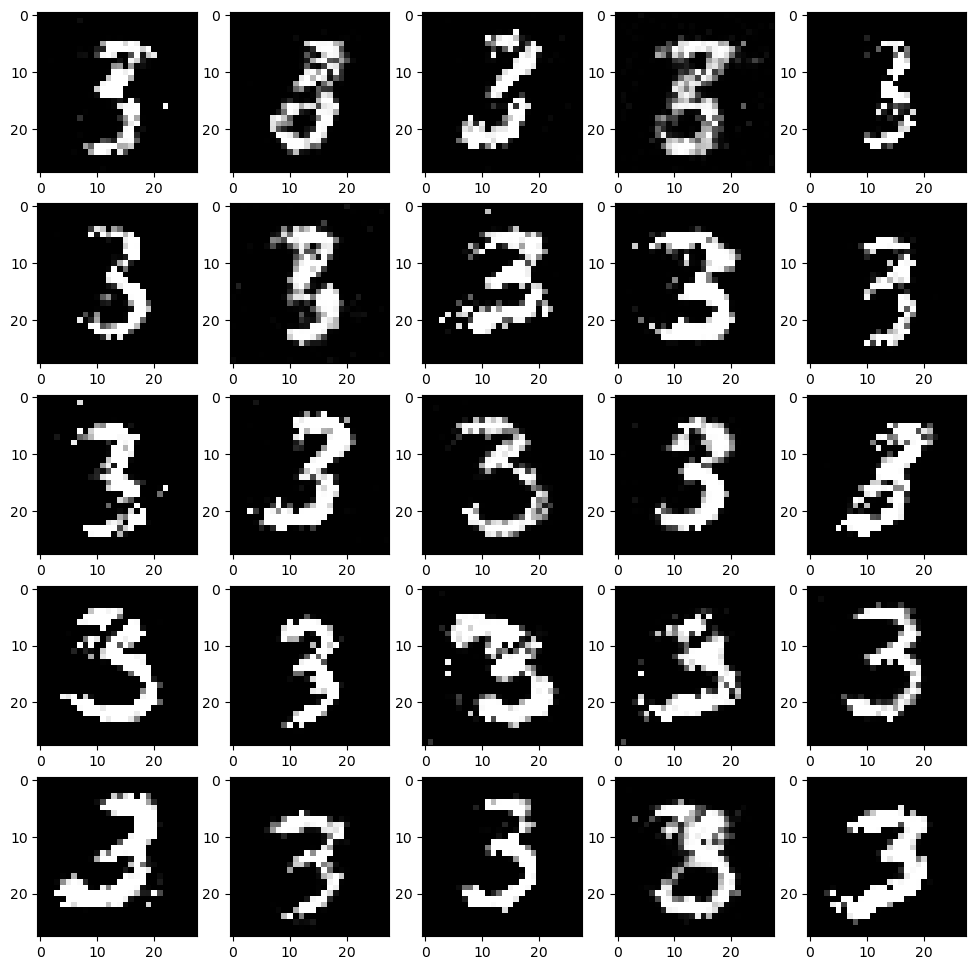

EPOCH  15


100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


losses-> 0.629755973815918   0.9177571535110474


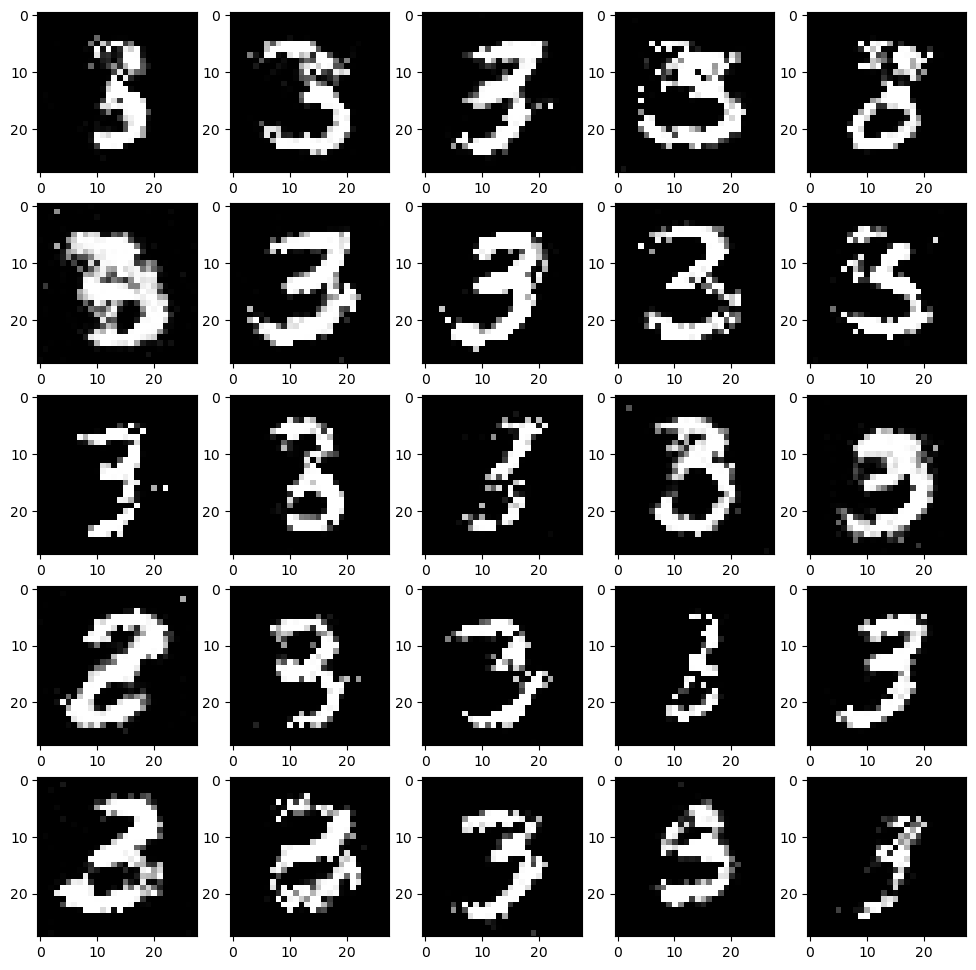

EPOCH  16


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6501781940460205   0.951034665107727


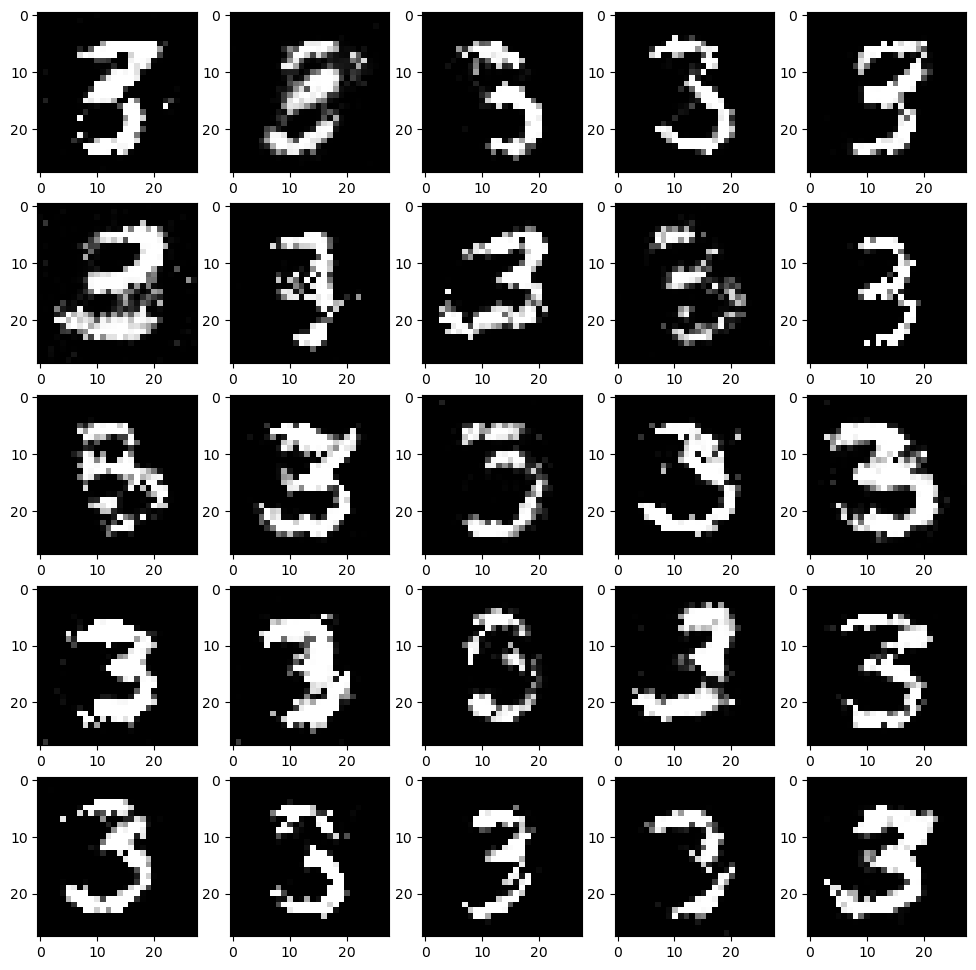

EPOCH  17


100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


losses-> 0.647675633430481   0.9314994215965271


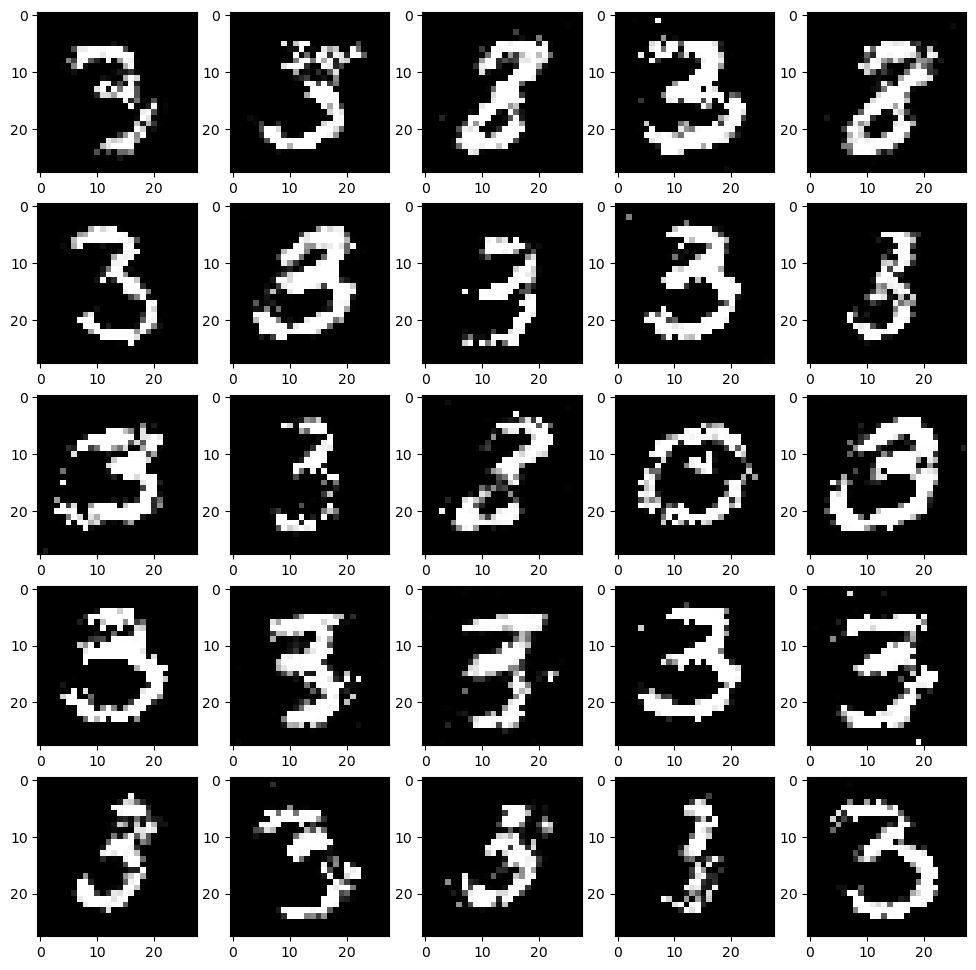

EPOCH  18


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6452163457870483   0.9711616039276123


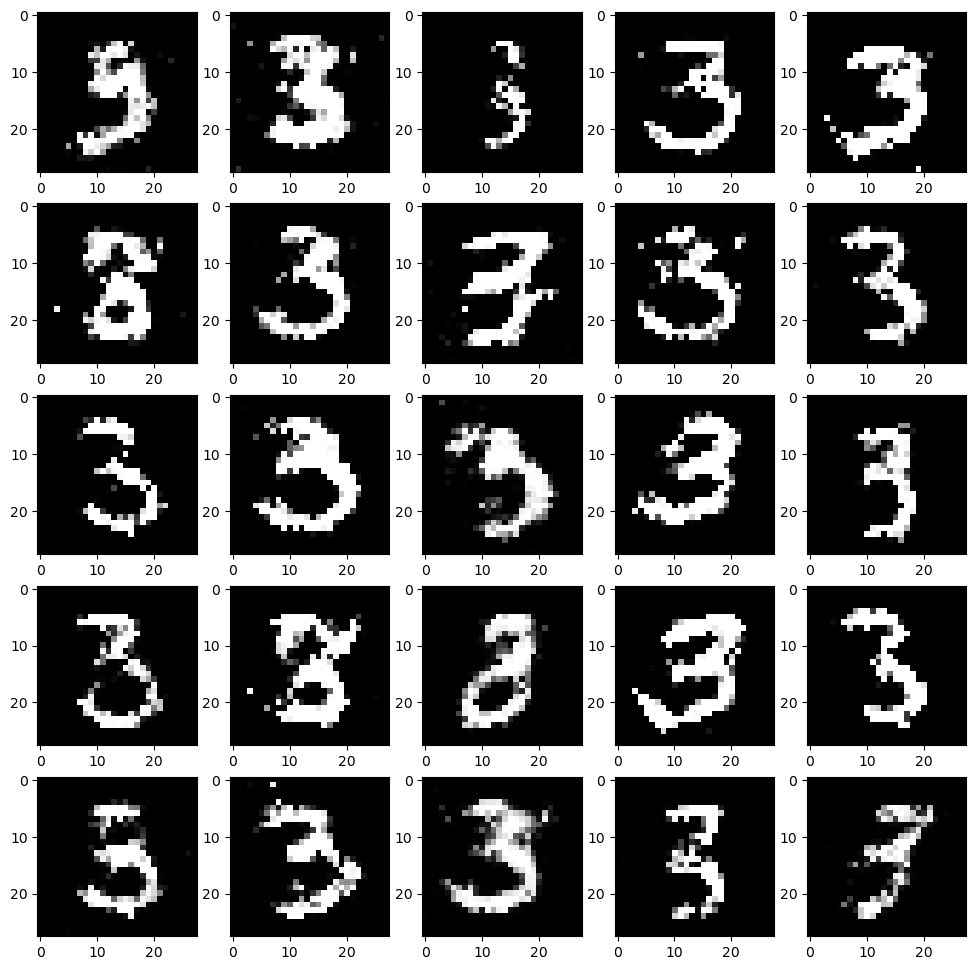

EPOCH  19


100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


losses-> 0.6273297071456909   0.9370126724243164


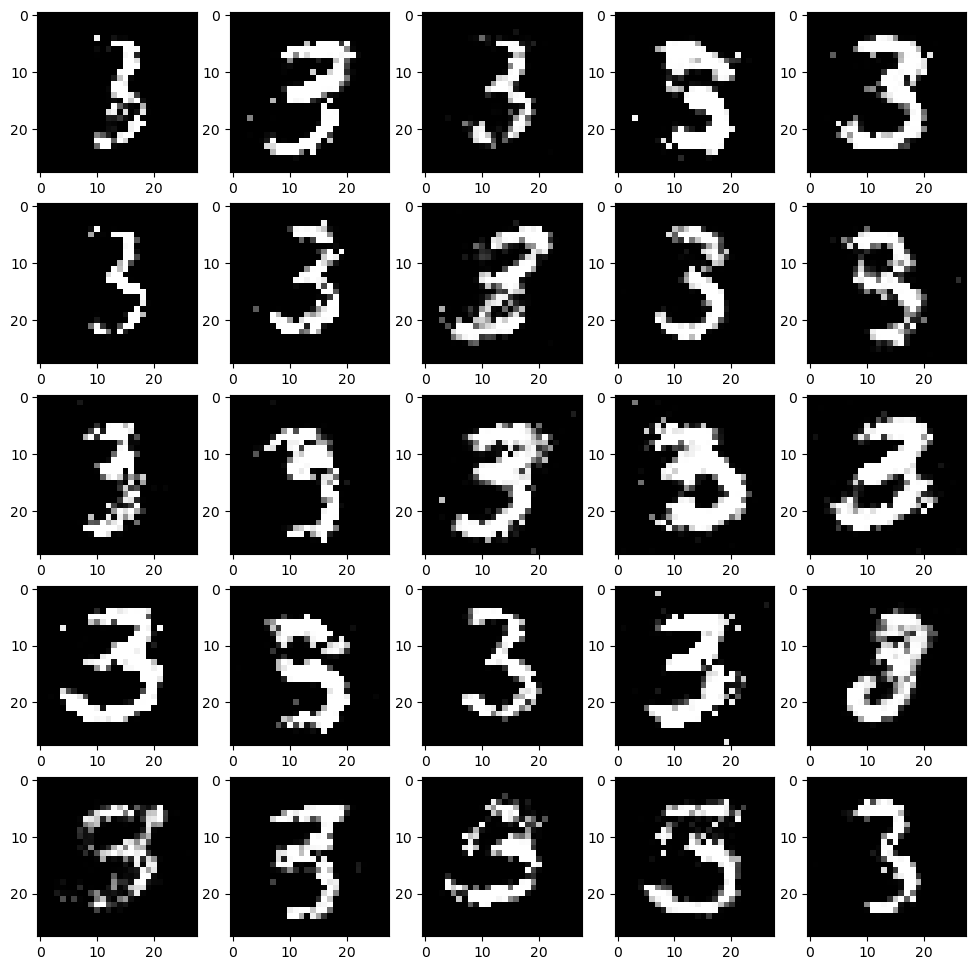

EPOCH  20


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6207529306411743   0.9288410544395447


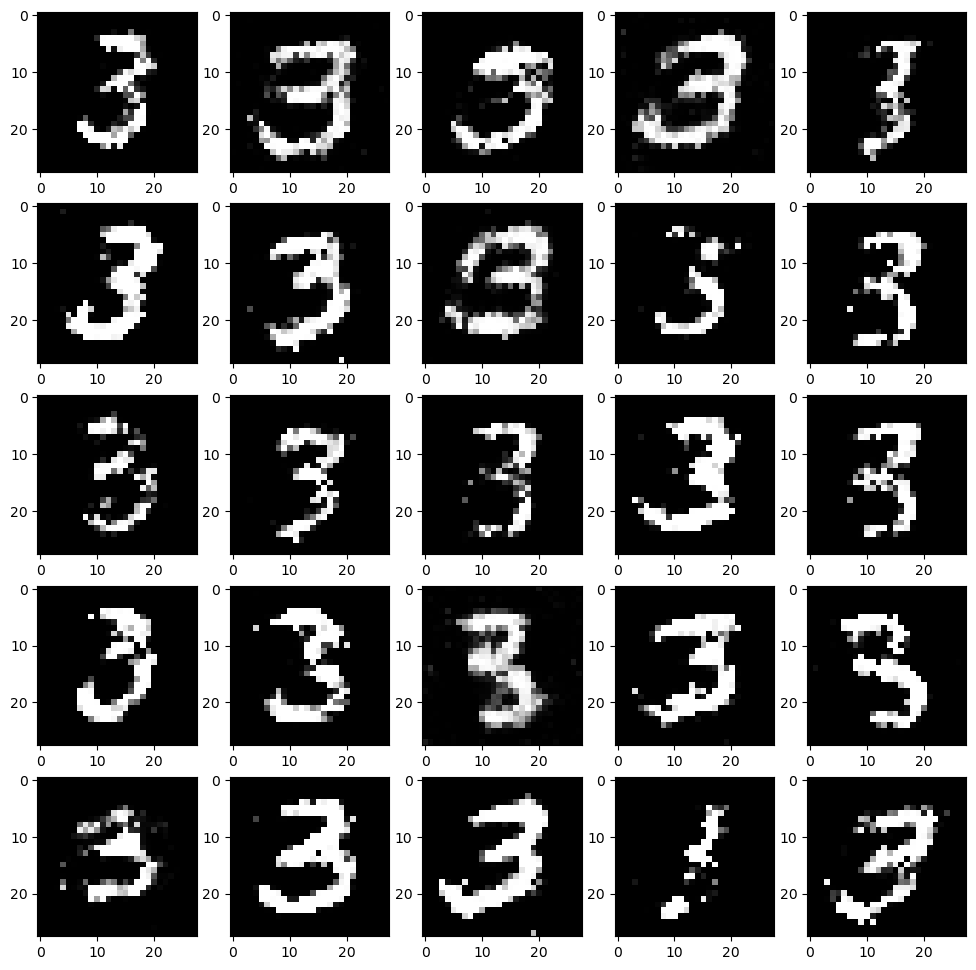

EPOCH  21


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6446859836578369   0.9421775341033936


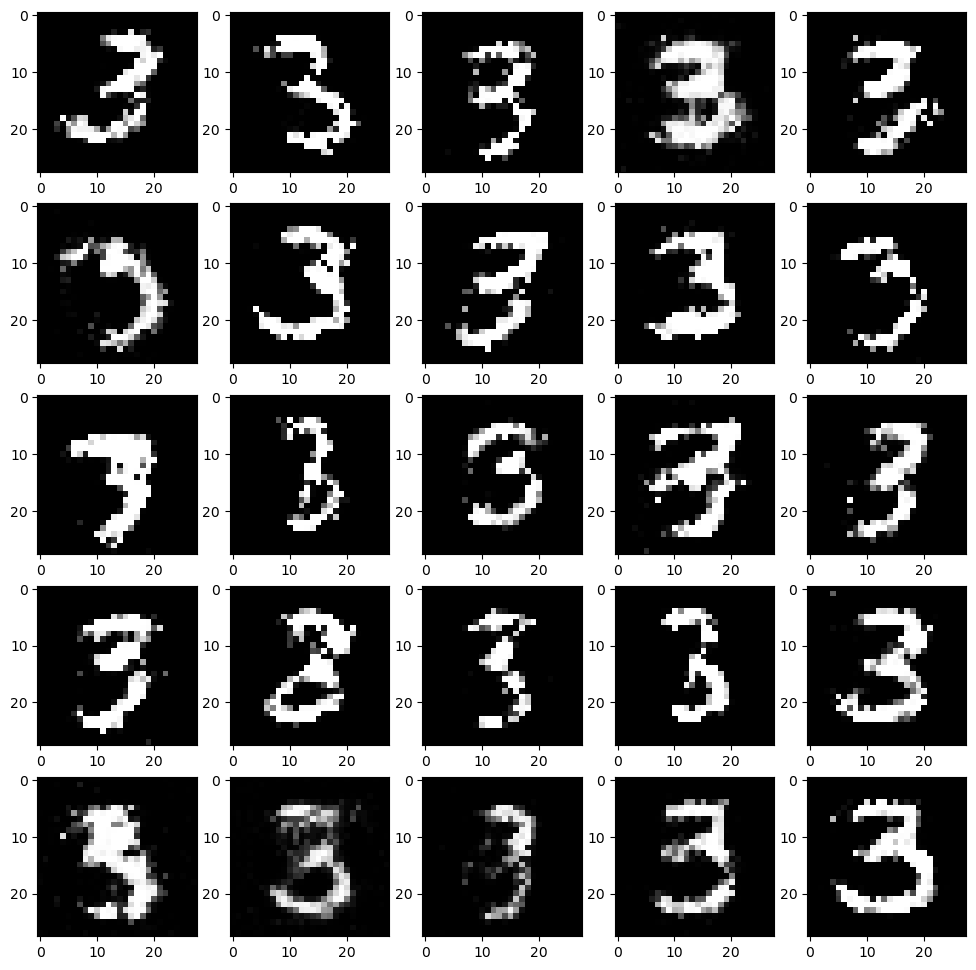

EPOCH  22


100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


losses-> 0.6278425455093384   0.9204646348953247


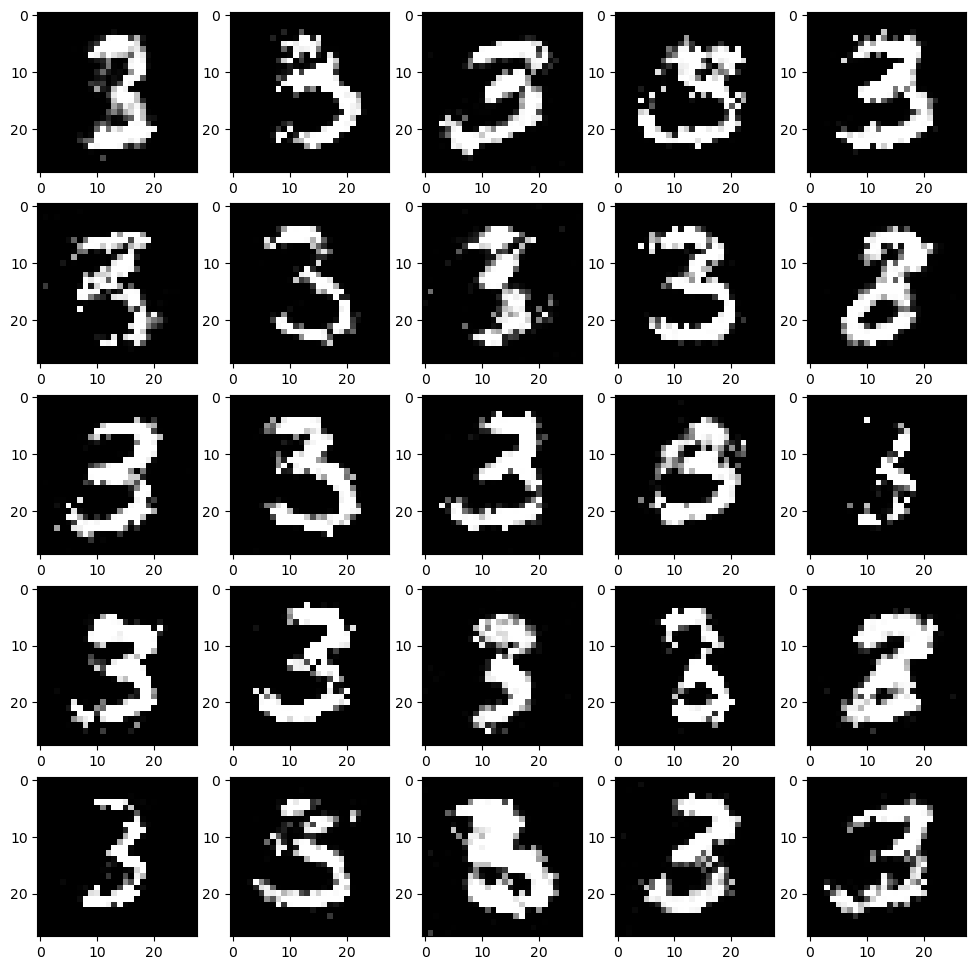

EPOCH  23


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


losses-> 0.6402385830879211   0.9396302700042725


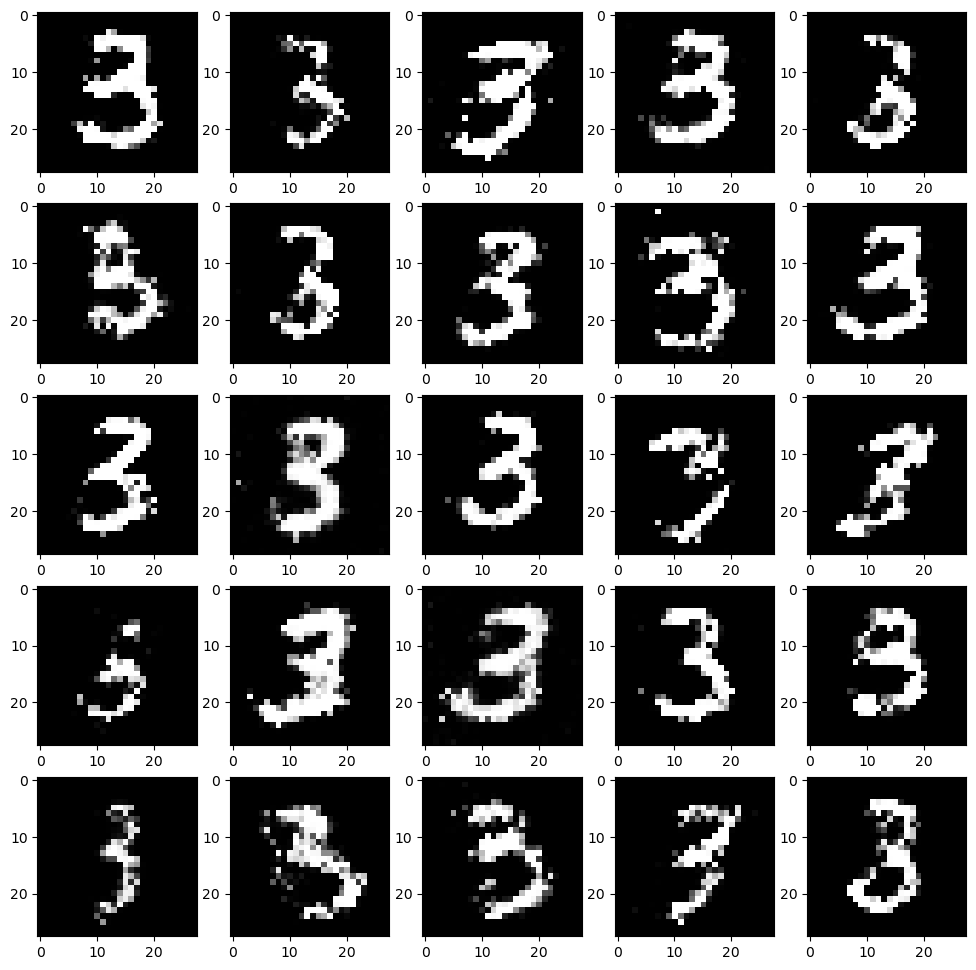

EPOCH  24


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


losses-> 0.6359394192695618   0.9657396078109741


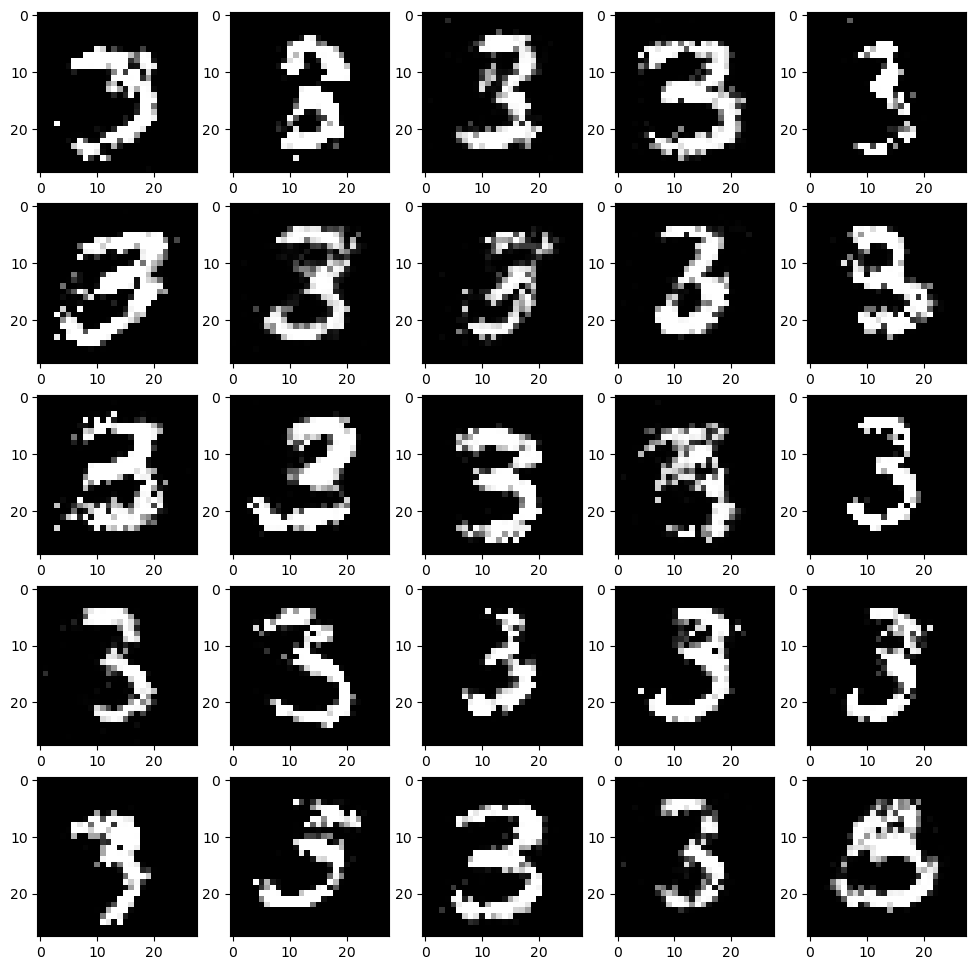

EPOCH  25


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


losses-> 0.6284294128417969   0.9580889940261841


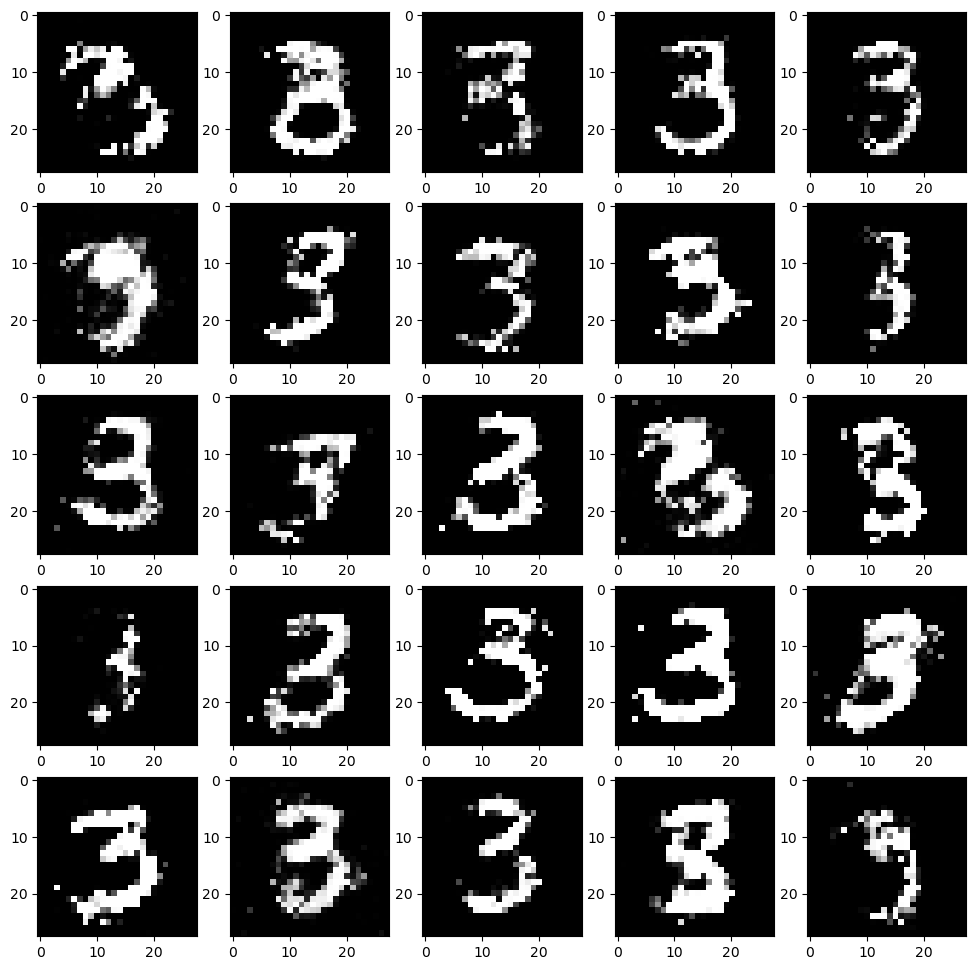

EPOCH  26


100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


losses-> 0.6211668252944946   0.9043892621994019


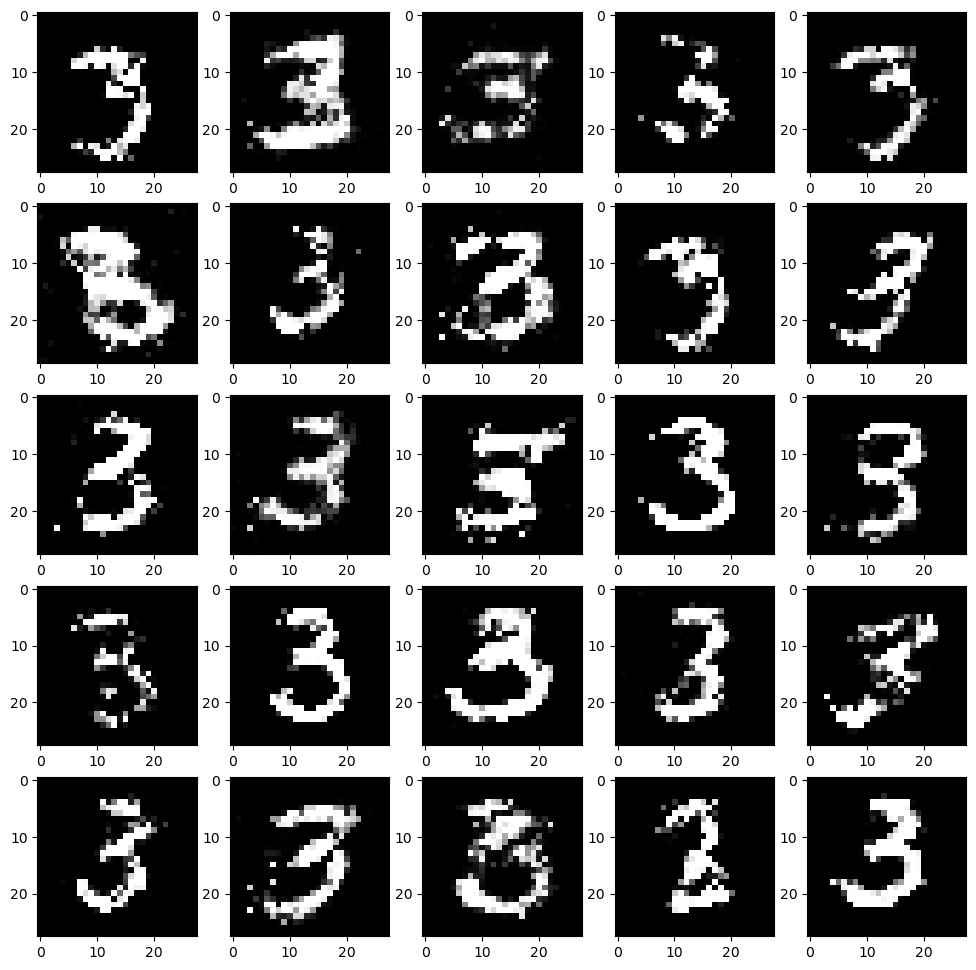

EPOCH  27


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6363245248794556   0.9318657517433167


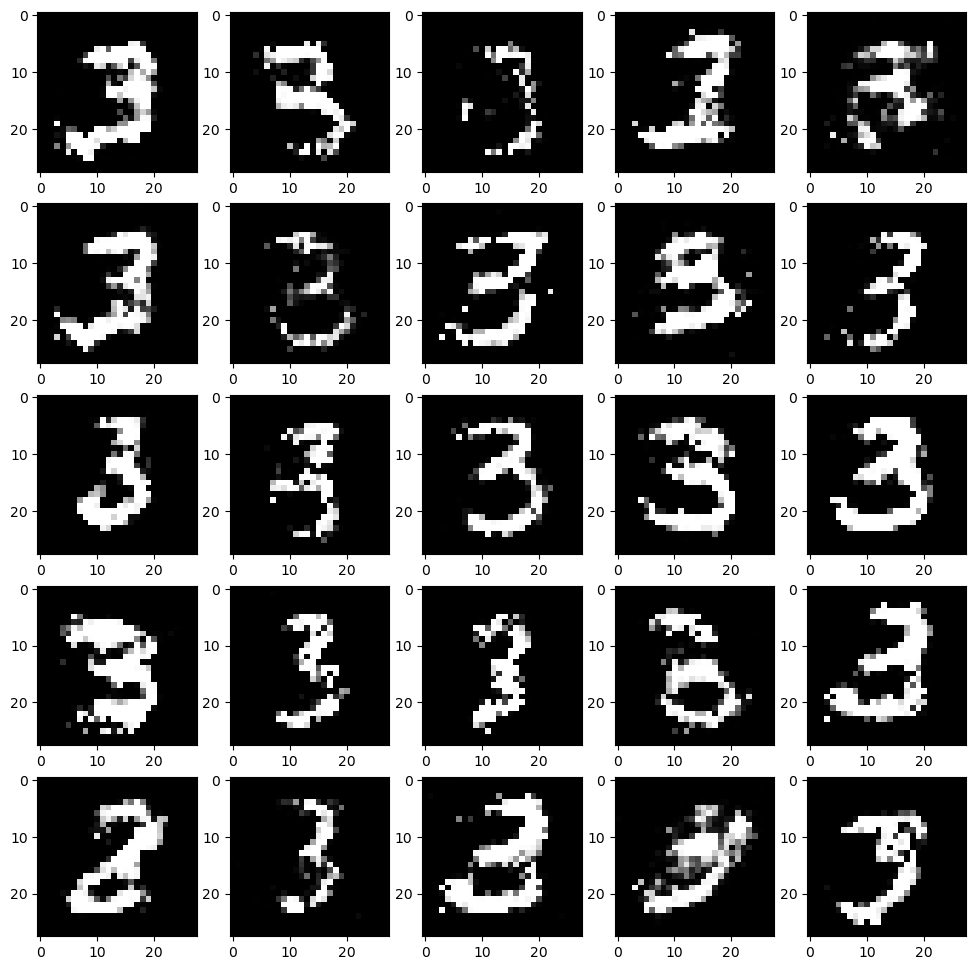

EPOCH  28


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


losses-> 0.6239770650863647   0.9209139347076416


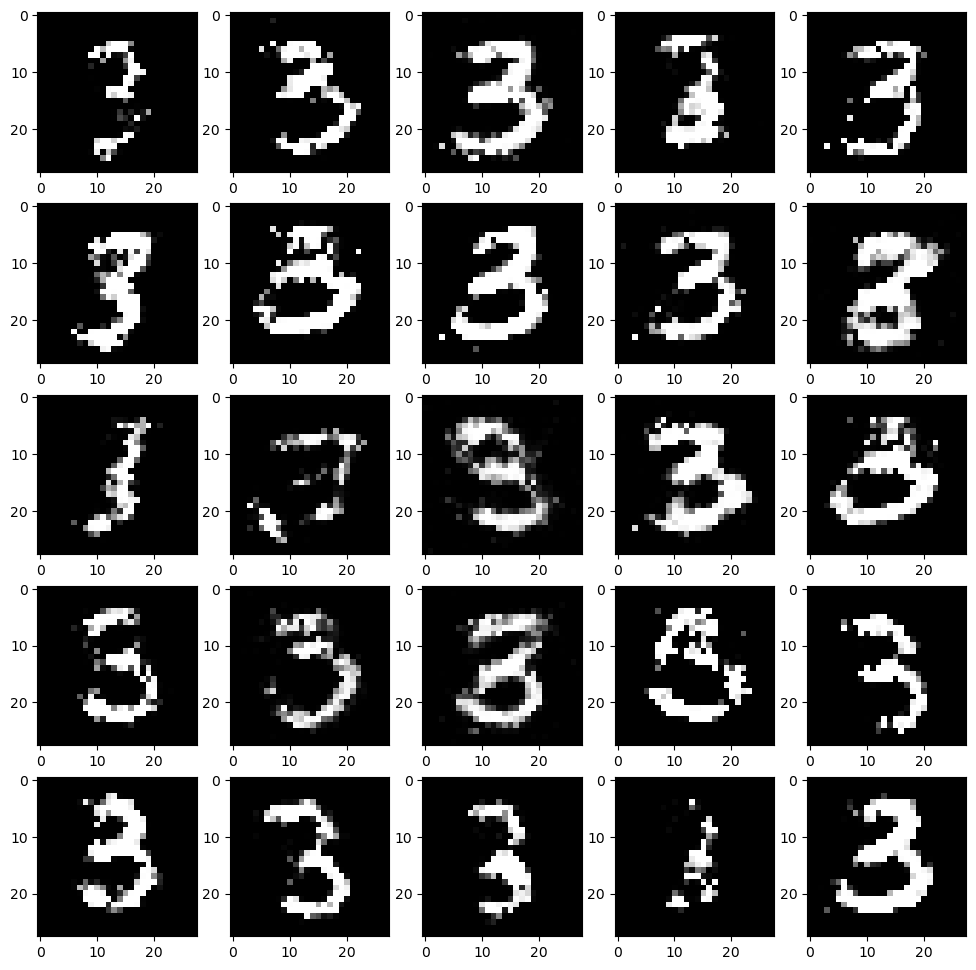

EPOCH  29


100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


losses-> 0.6283659934997559   0.9229159355163574


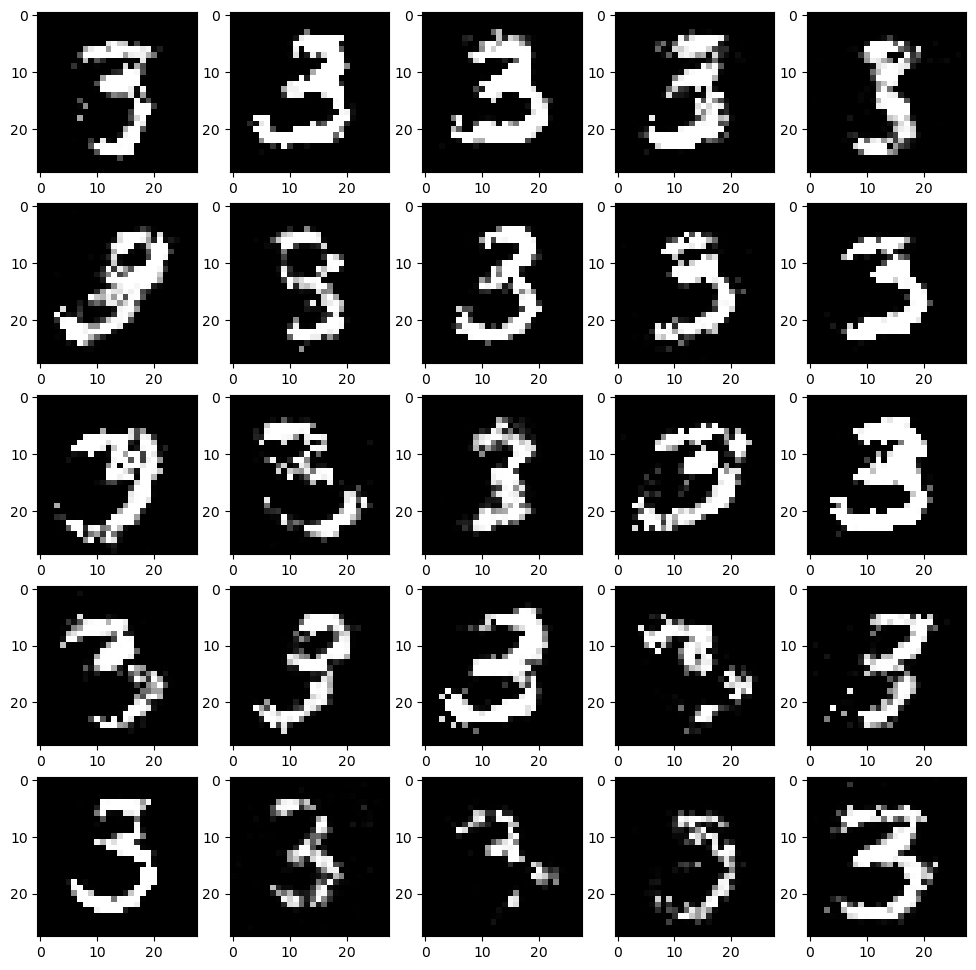

EPOCH  30


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


losses-> 0.6286711692810059   0.8662775754928589


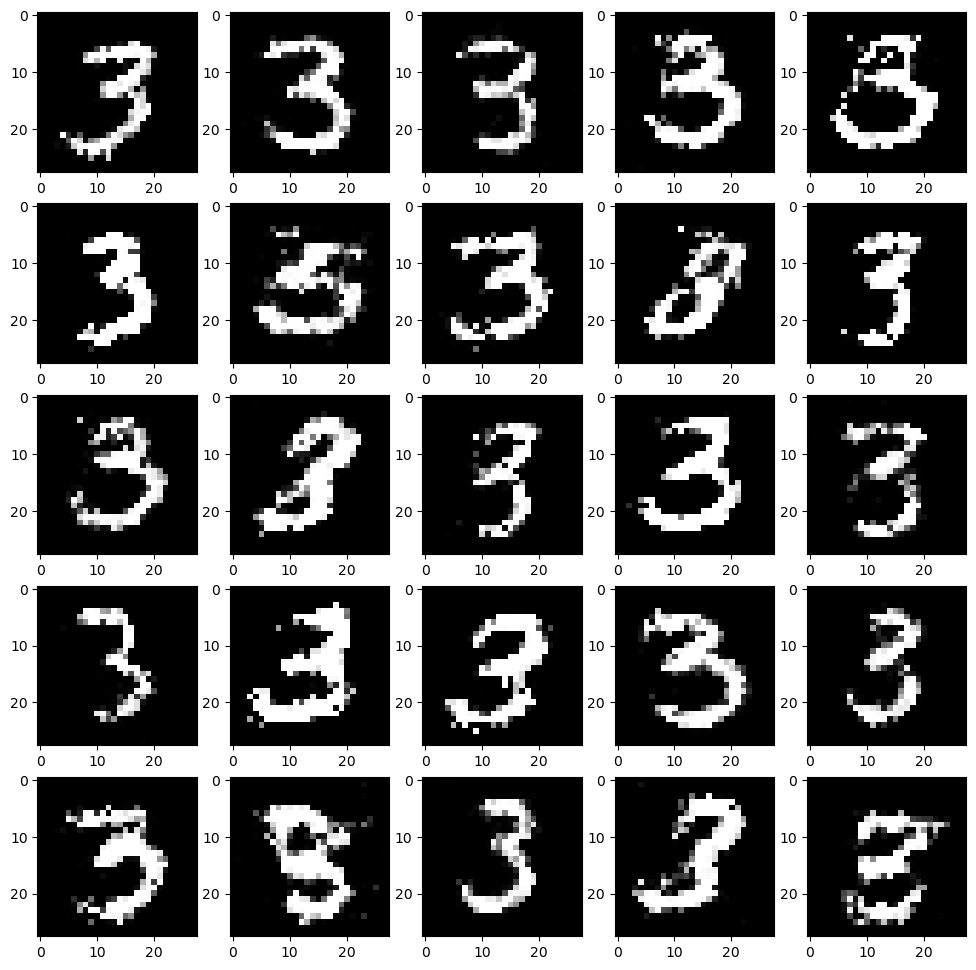

EPOCH  31


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


losses-> 0.6321831941604614   0.8584685325622559


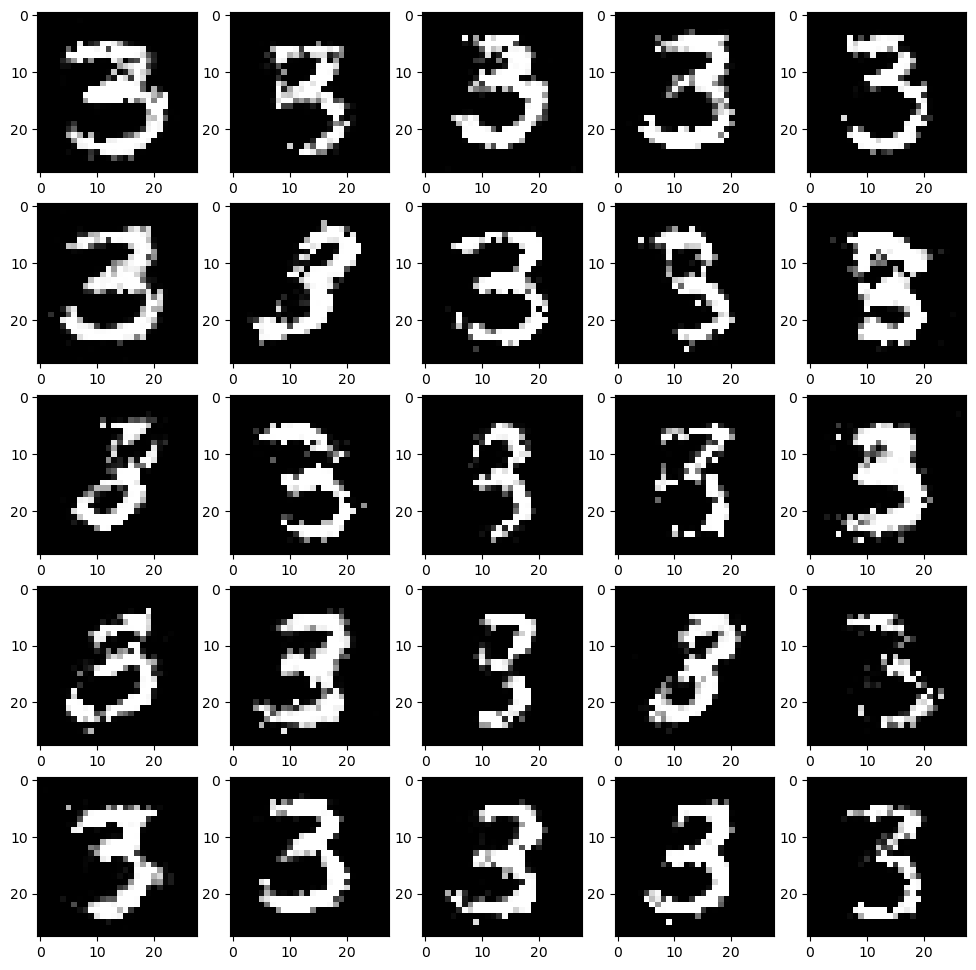

EPOCH  32


100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


losses-> 0.6301182508468628   0.9085195064544678


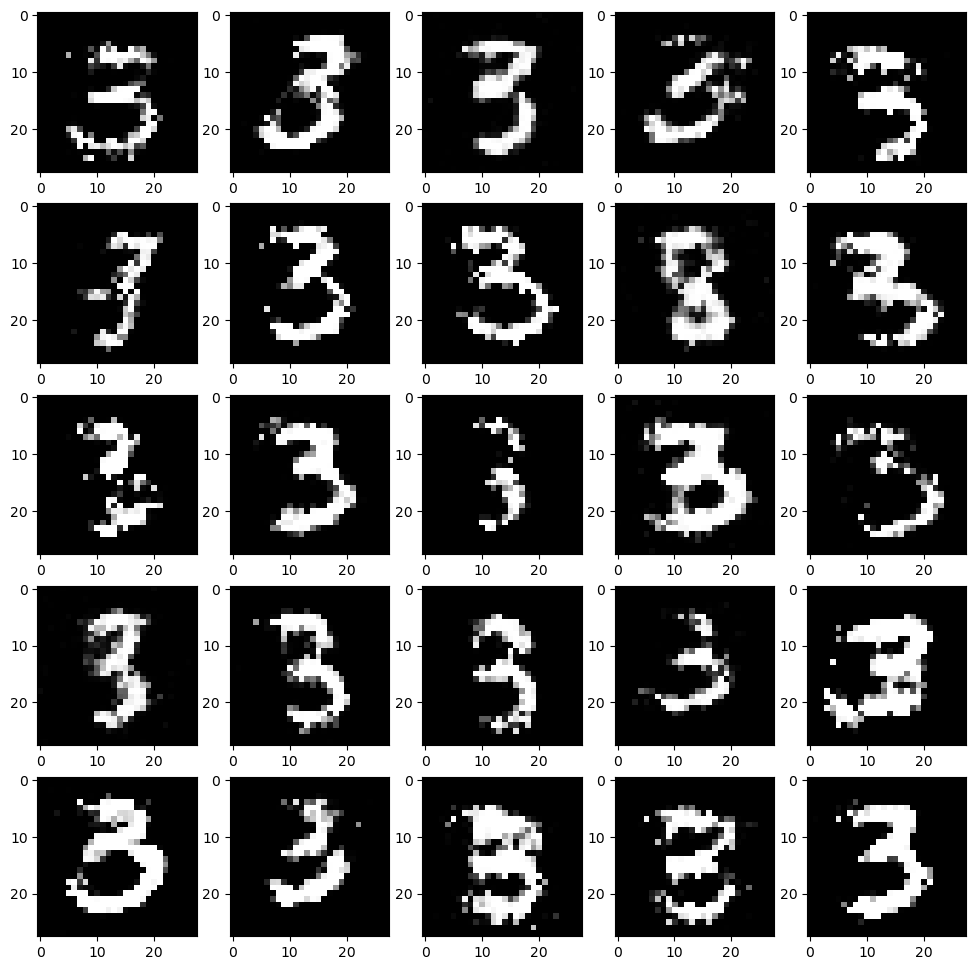

EPOCH  33


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6526353359222412   0.8864260315895081


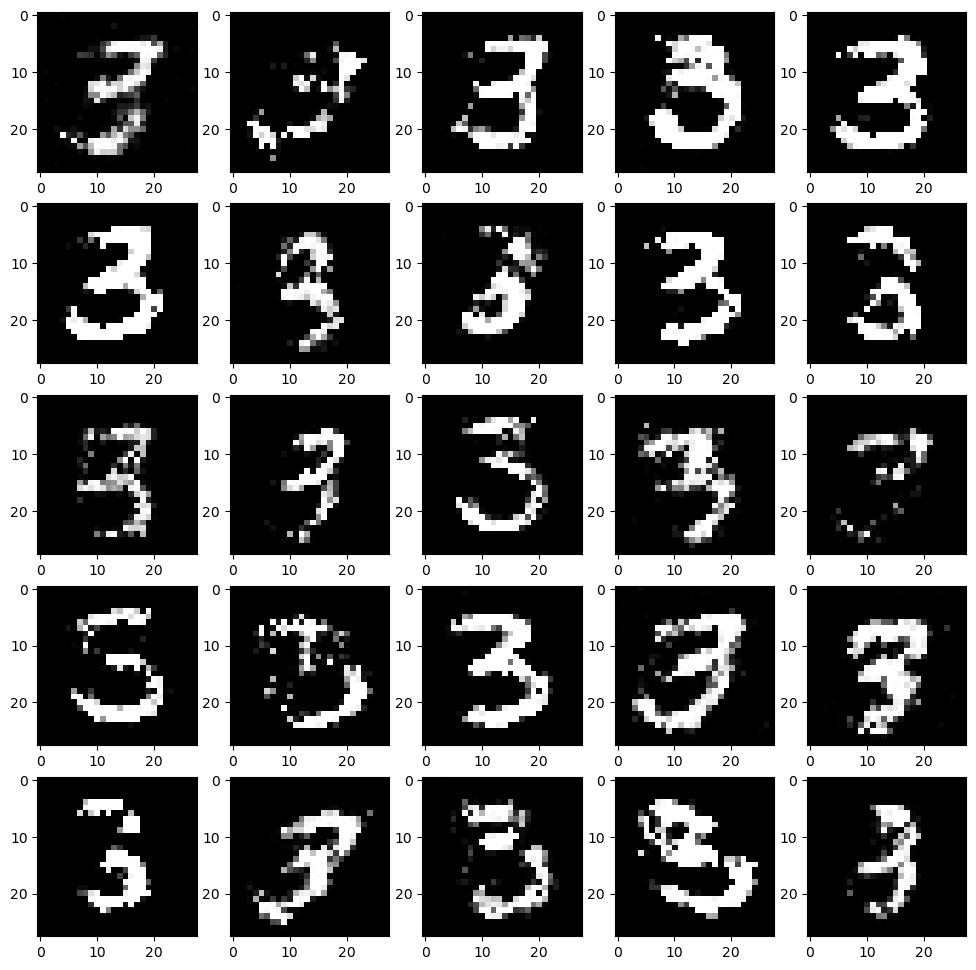

EPOCH  34


100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


losses-> 0.6316578388214111   0.9053105115890503


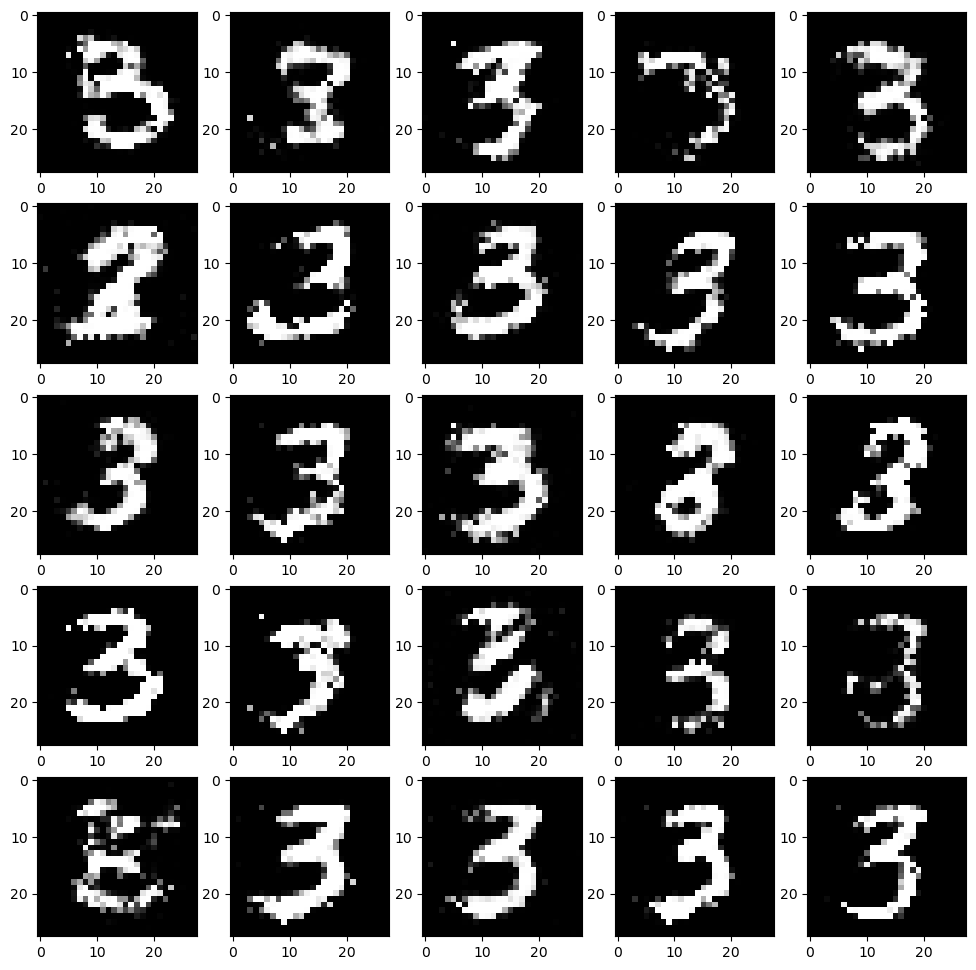

EPOCH  35


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6442397832870483   0.8565597534179688


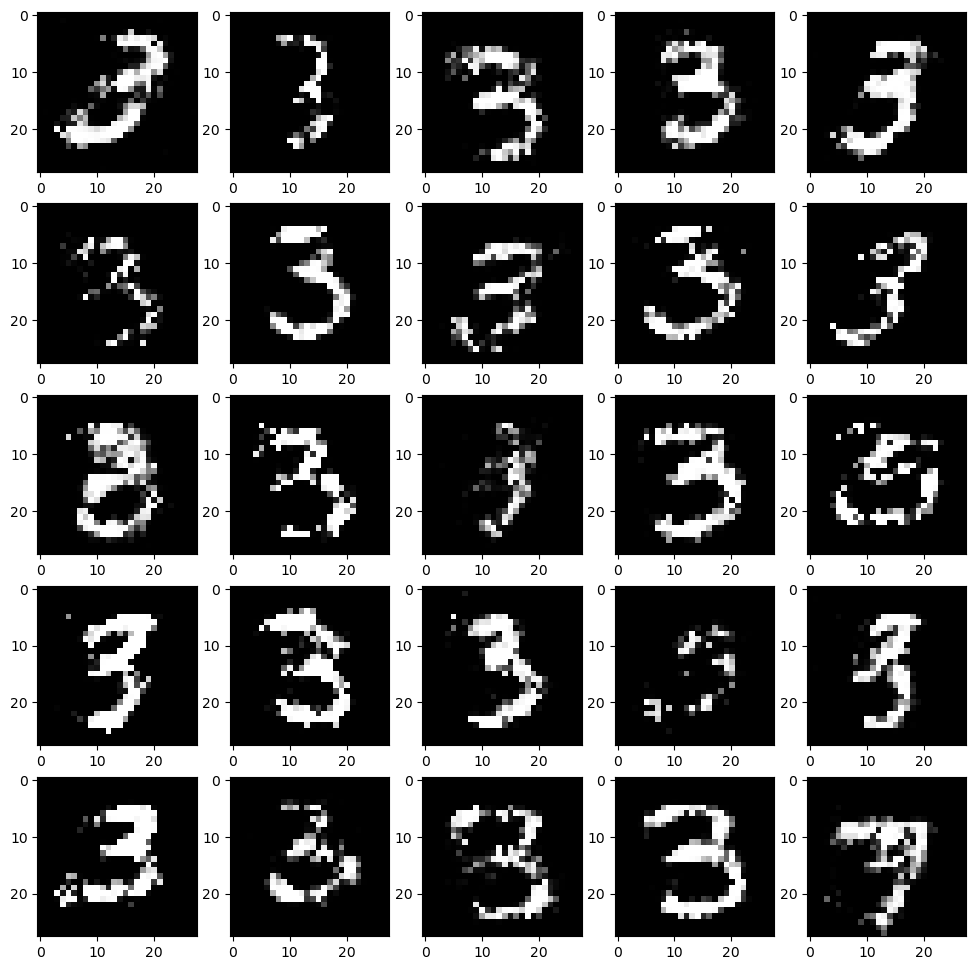

EPOCH  36


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


losses-> 0.6422742605209351   0.8348810076713562


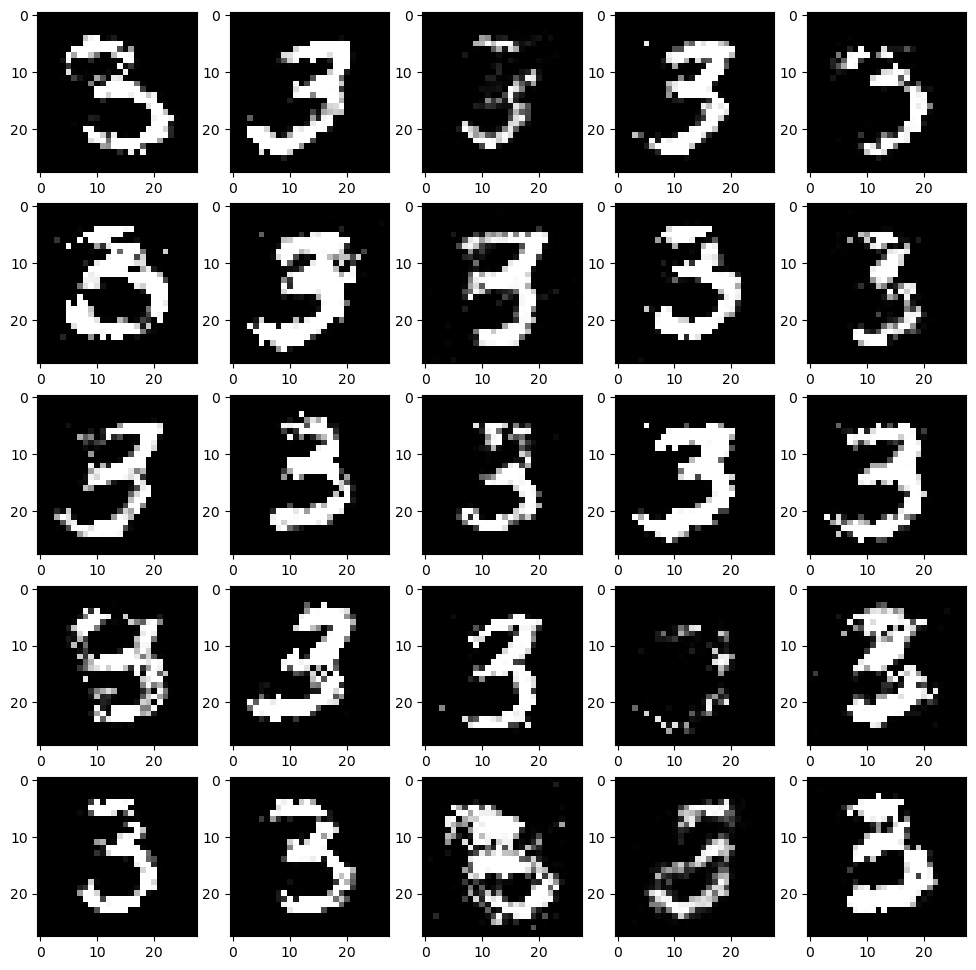

EPOCH  37


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


losses-> 0.6447275876998901   0.9163063168525696


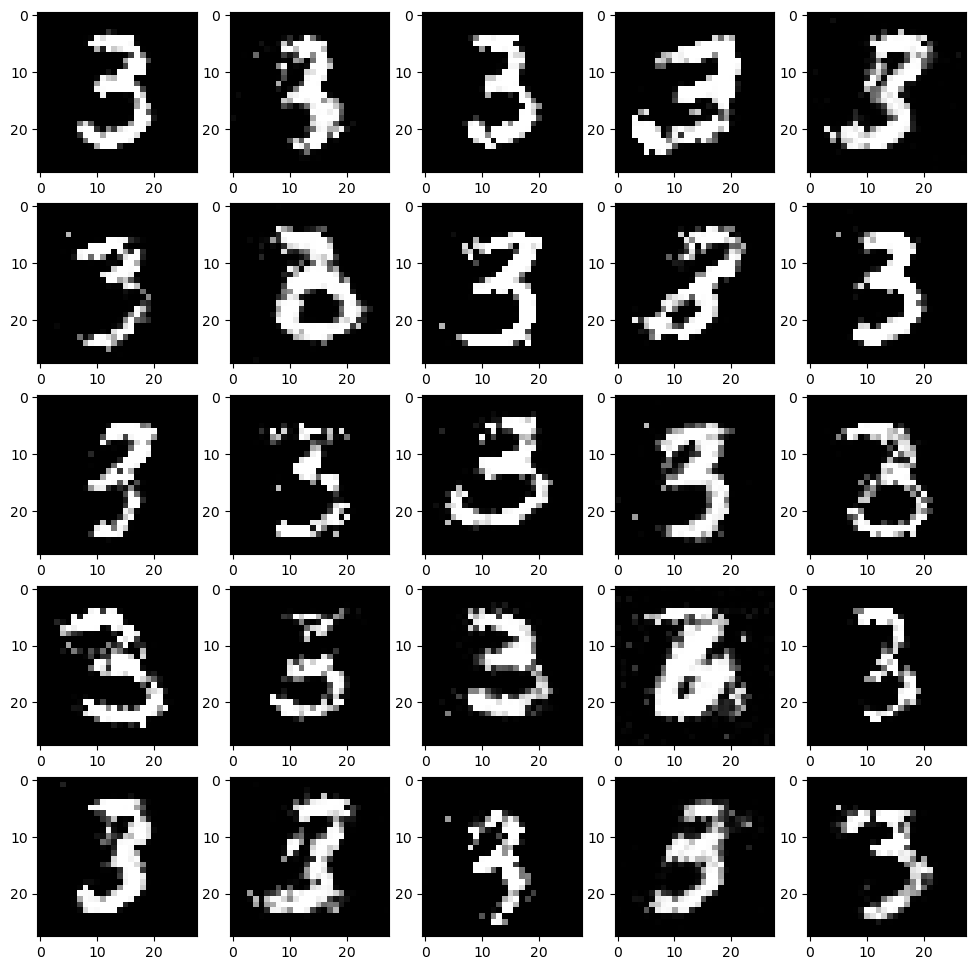

EPOCH  38


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


losses-> 0.641455888748169   0.9294227361679077


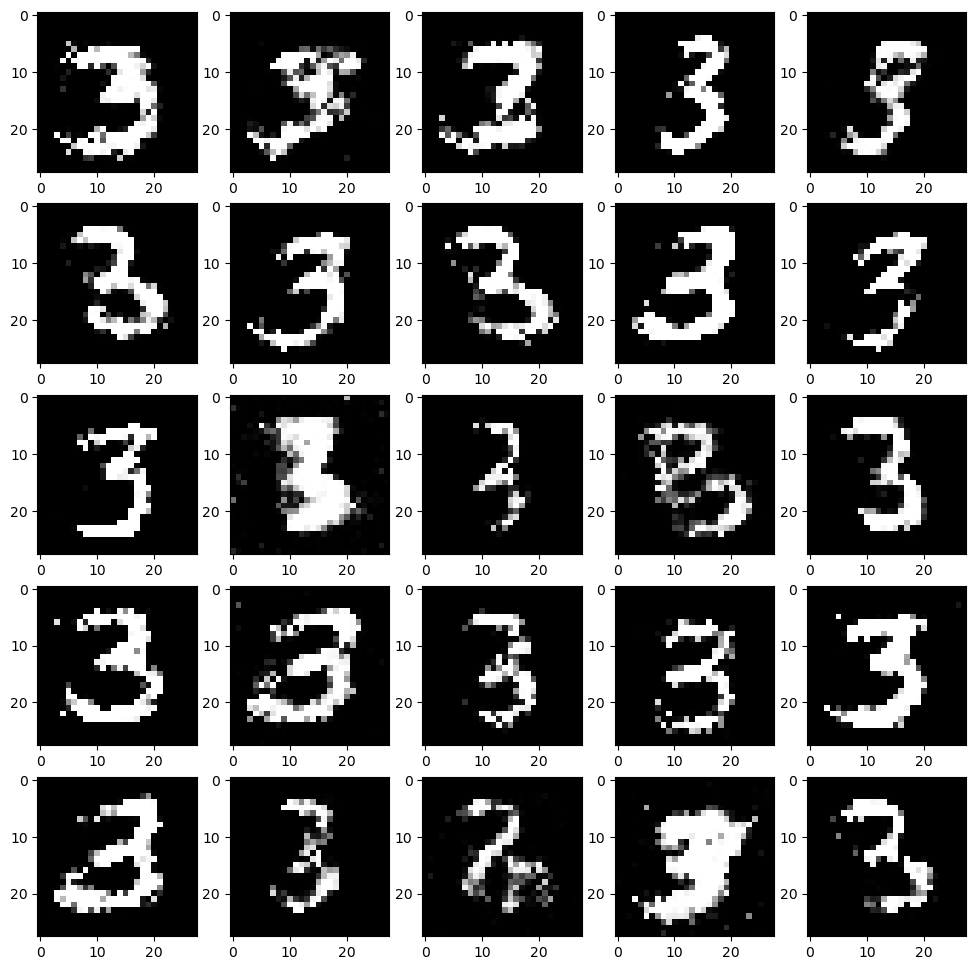

EPOCH  39


100%|██████████| 3/3 [00:01<00:00,  1.51it/s]


losses-> 0.6398682594299316   0.8362969160079956


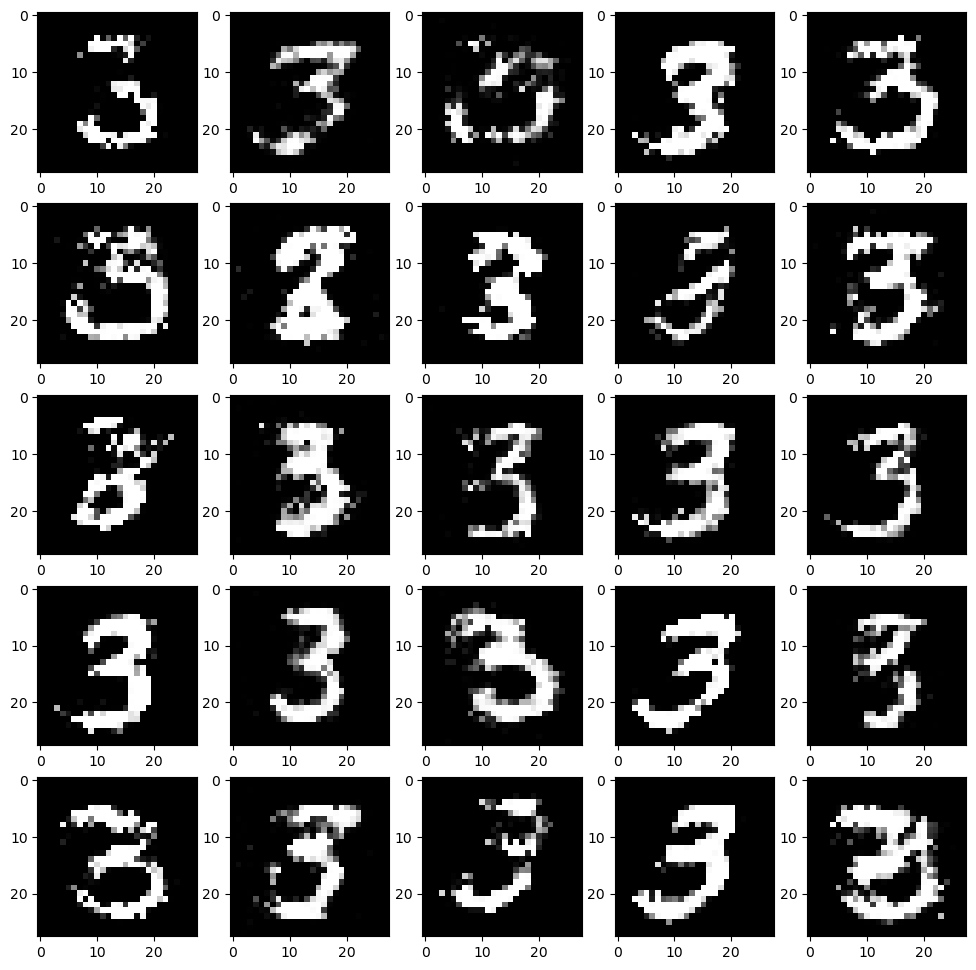

EPOCH  40


100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


losses-> 0.6393837928771973   0.931838870048523


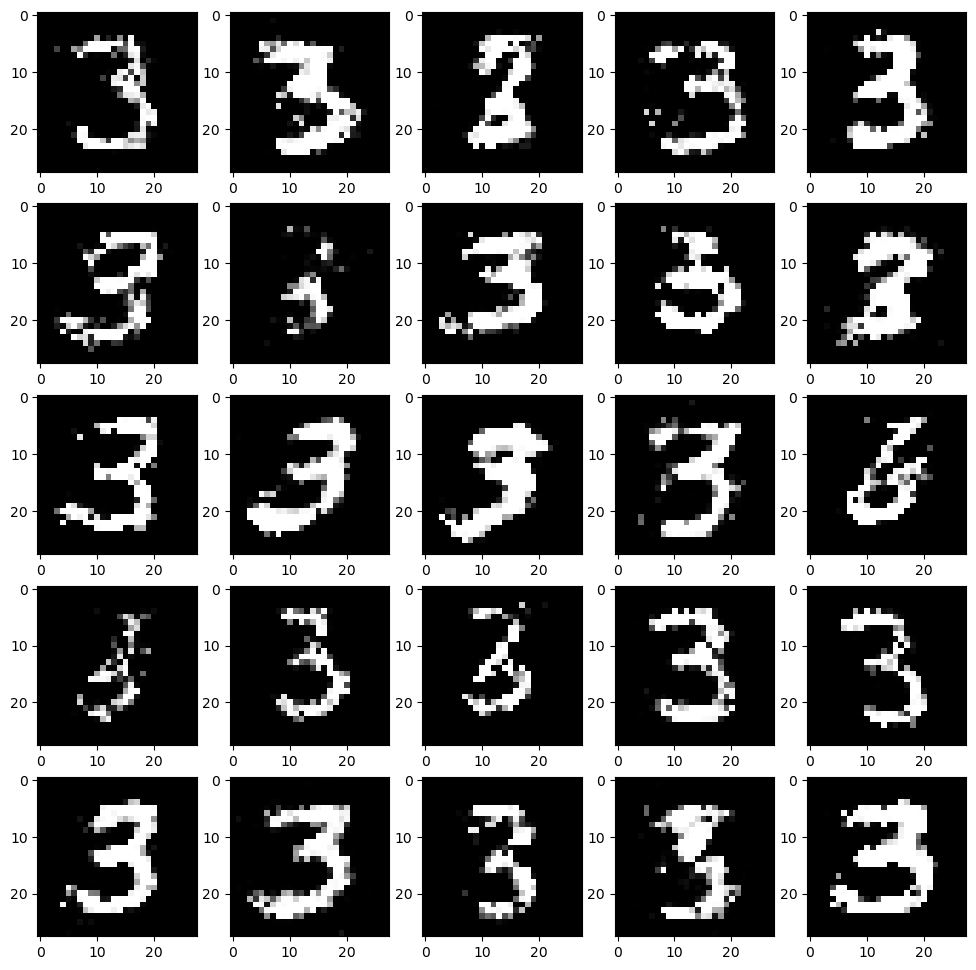

EPOCH  41


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6402760148048401   0.8683271408081055


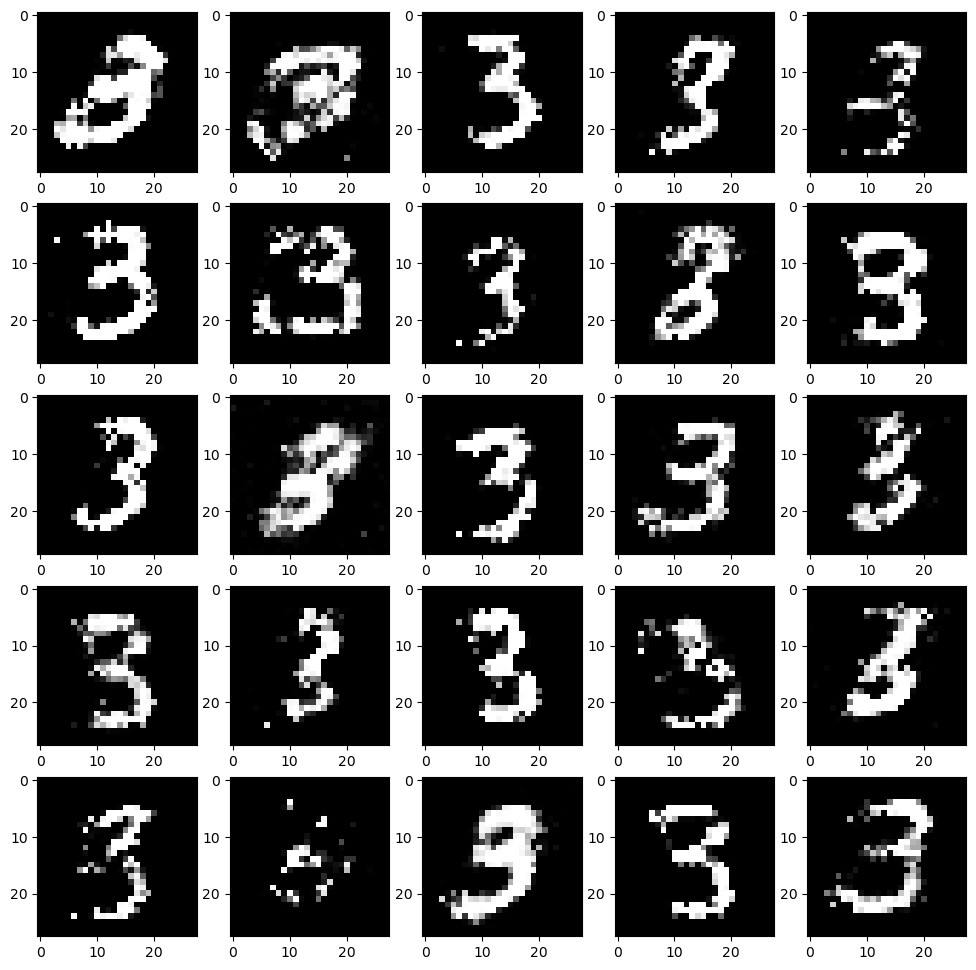

EPOCH  42


100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


losses-> 0.6387122869491577   0.9279505014419556


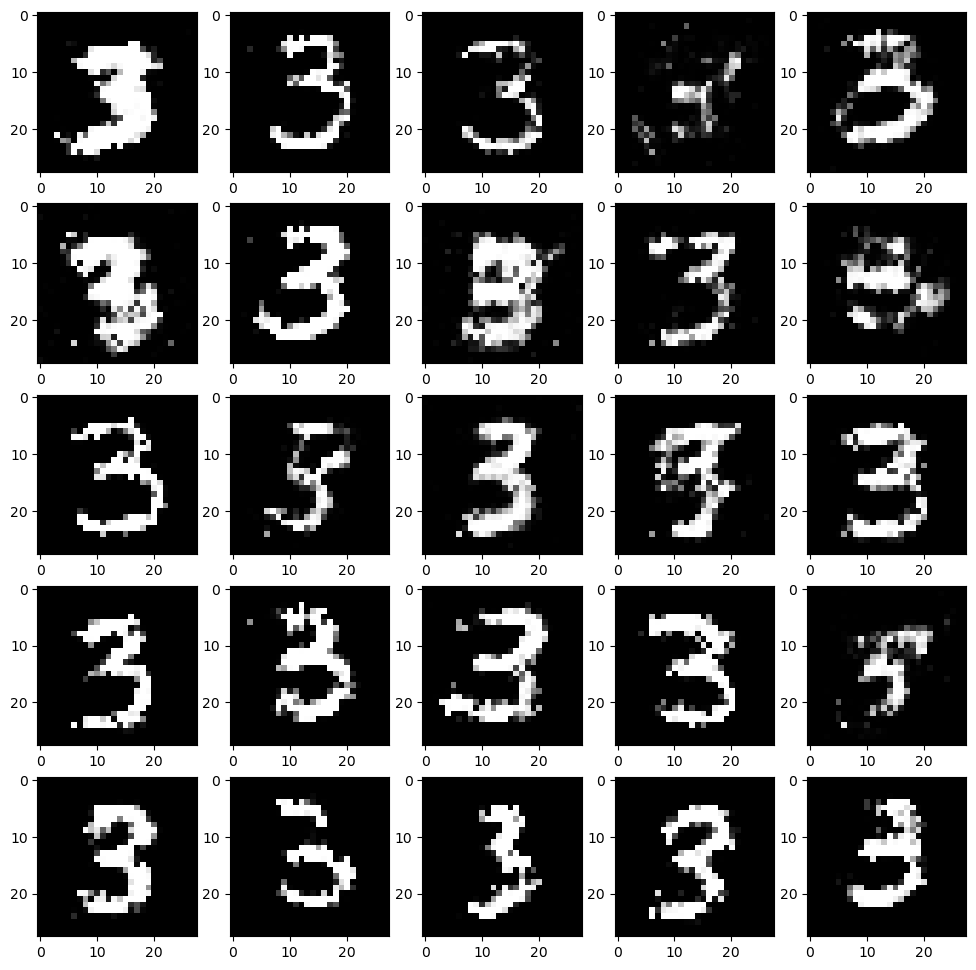

EPOCH  43


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6202293634414673   0.9437389969825745


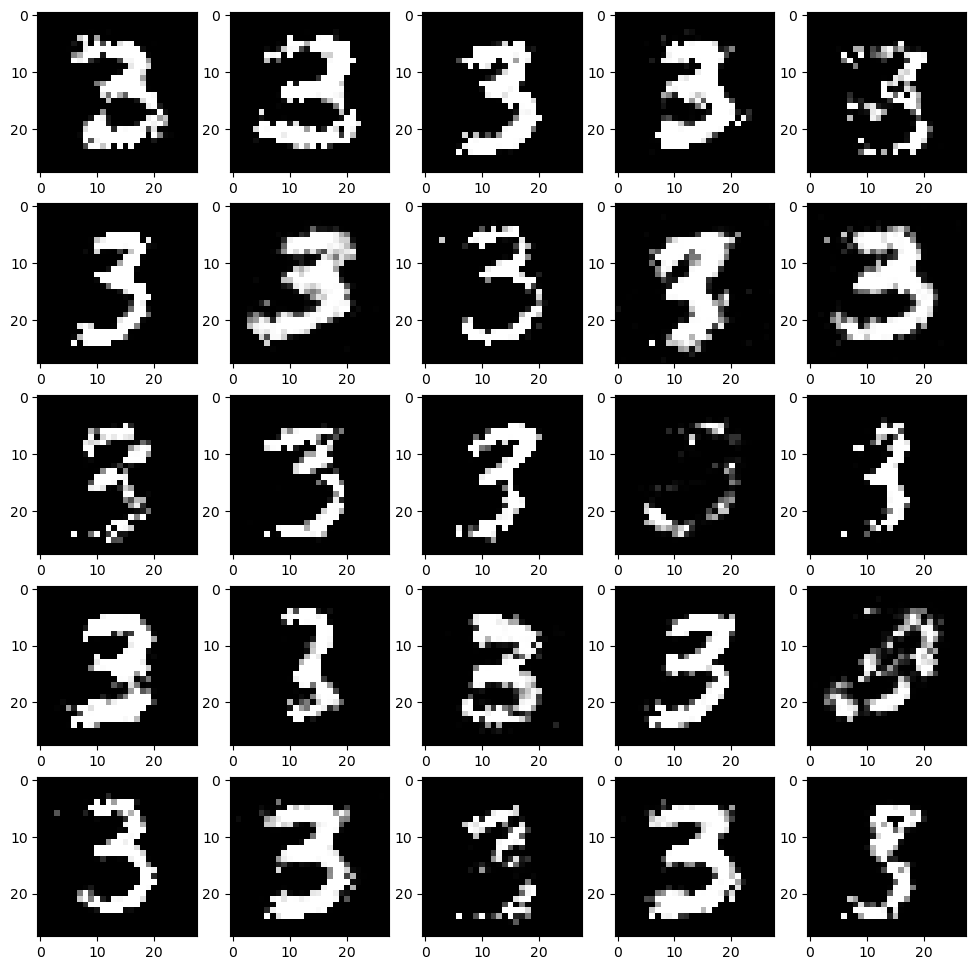

EPOCH  44


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


losses-> 0.6268215179443359   0.8751168251037598


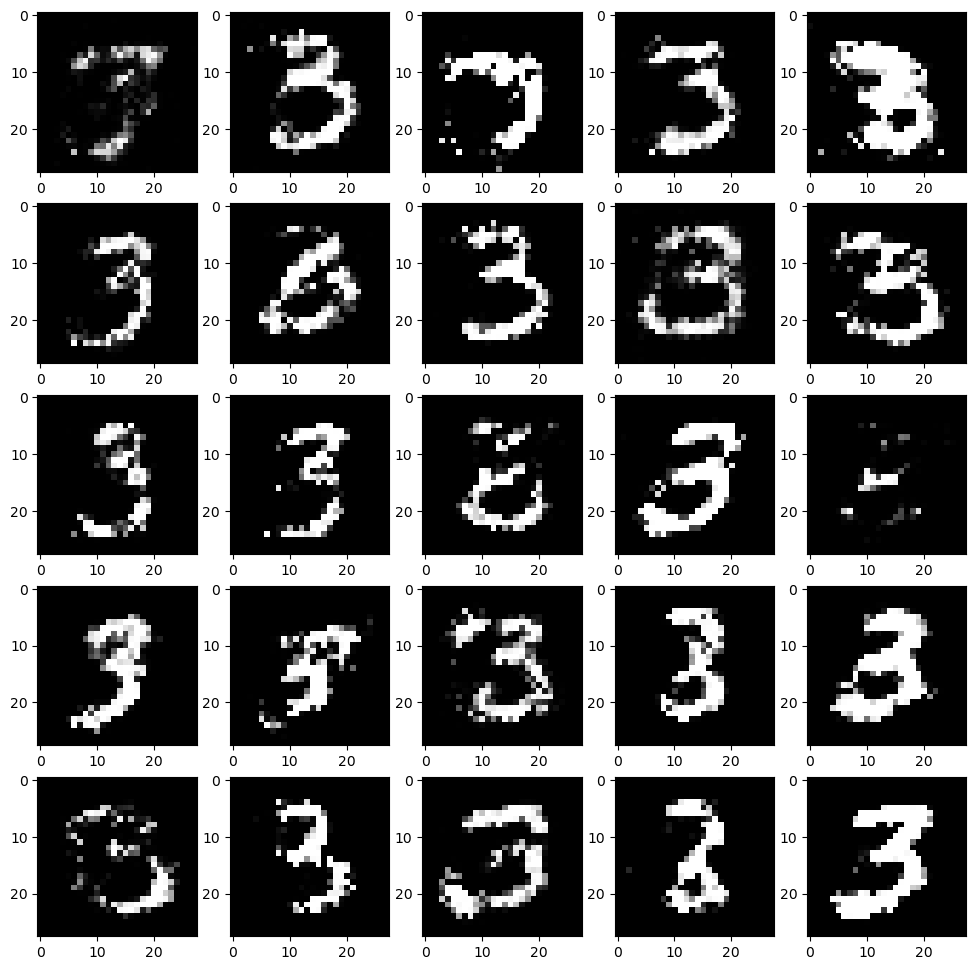

EPOCH  45


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


losses-> 0.6440032124519348   0.8937945365905762


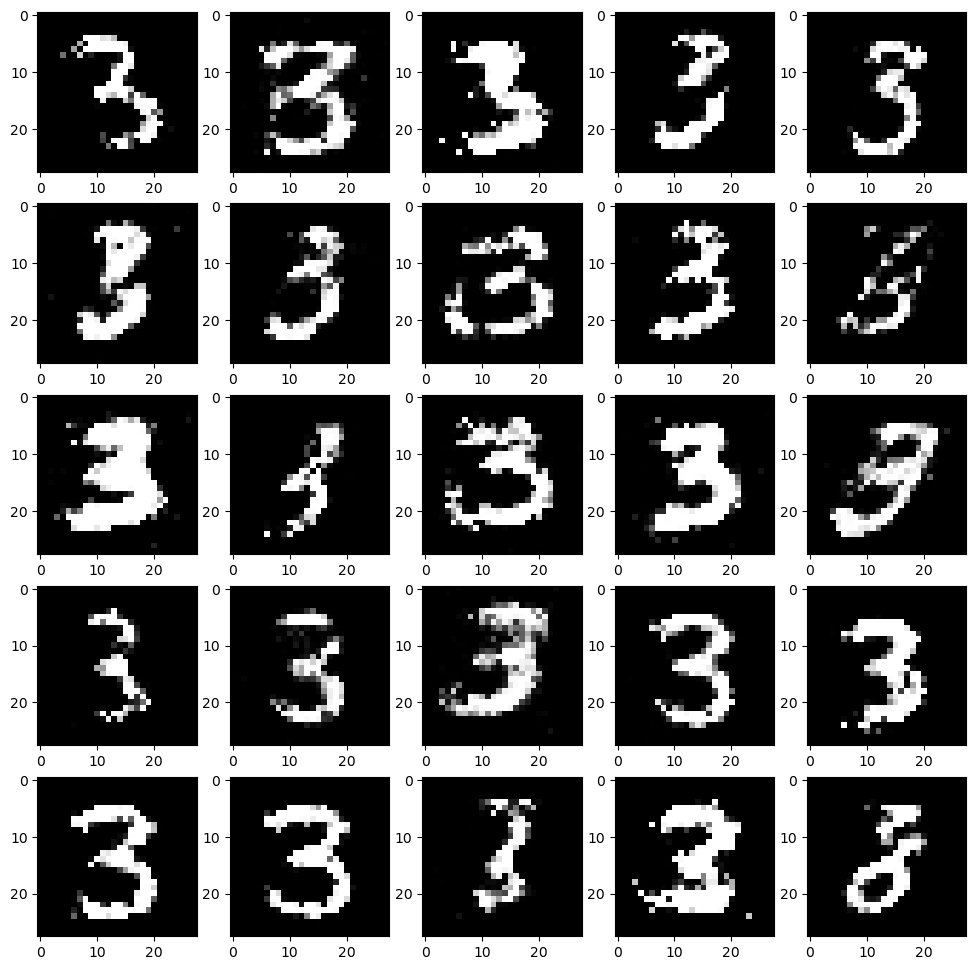

EPOCH  46


100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


losses-> 0.627234935760498   0.9028884172439575


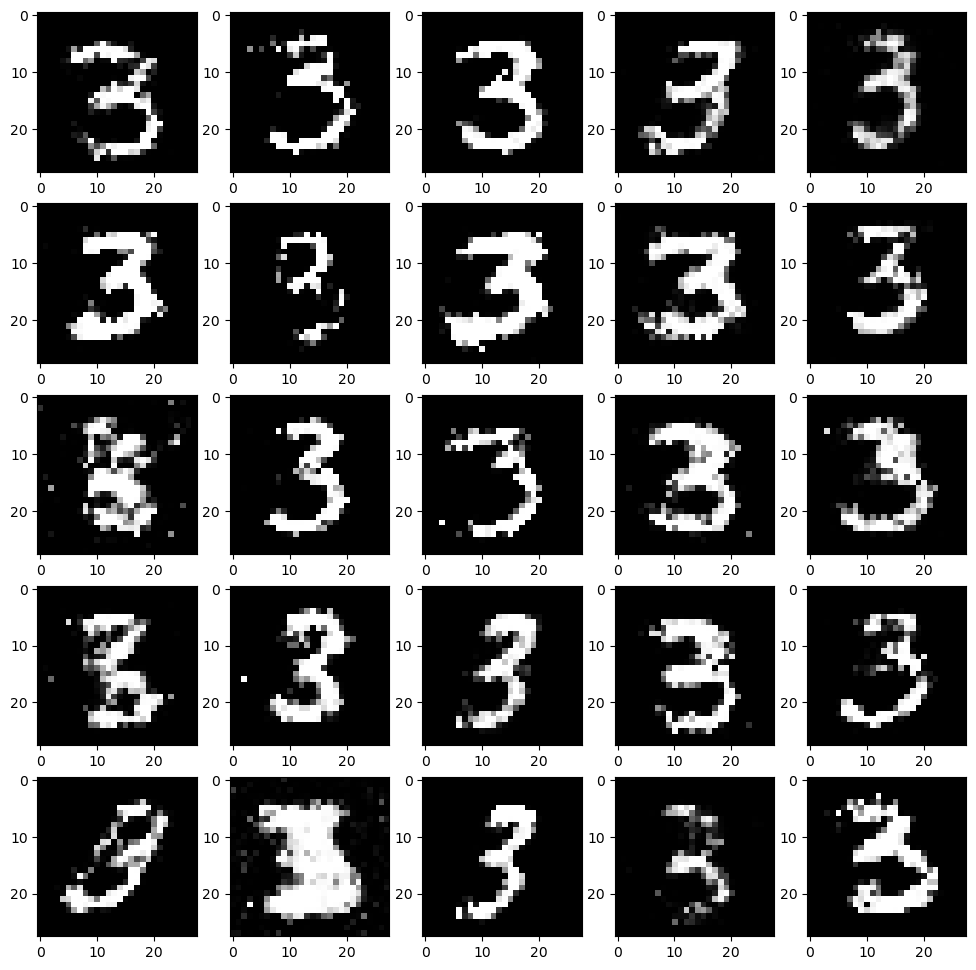

EPOCH  47


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


losses-> 0.6332155466079712   0.9531203508377075


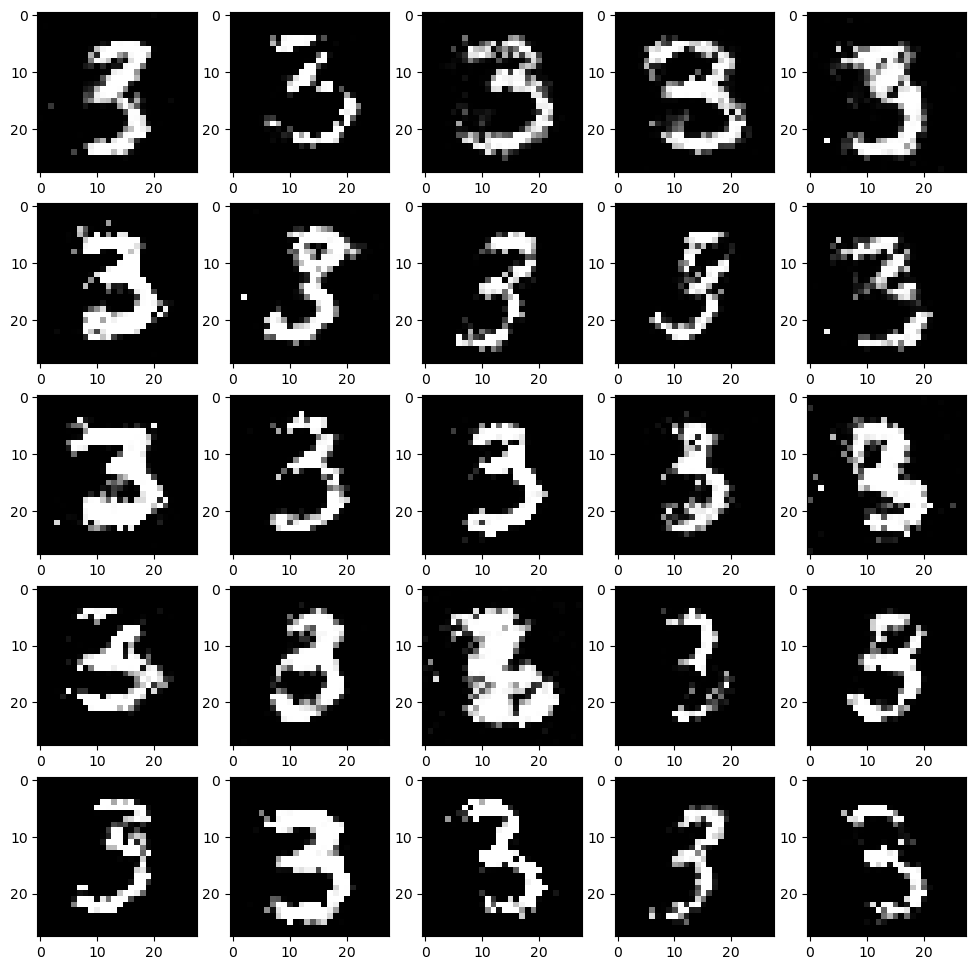

EPOCH  48


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6563237905502319   0.9346227645874023


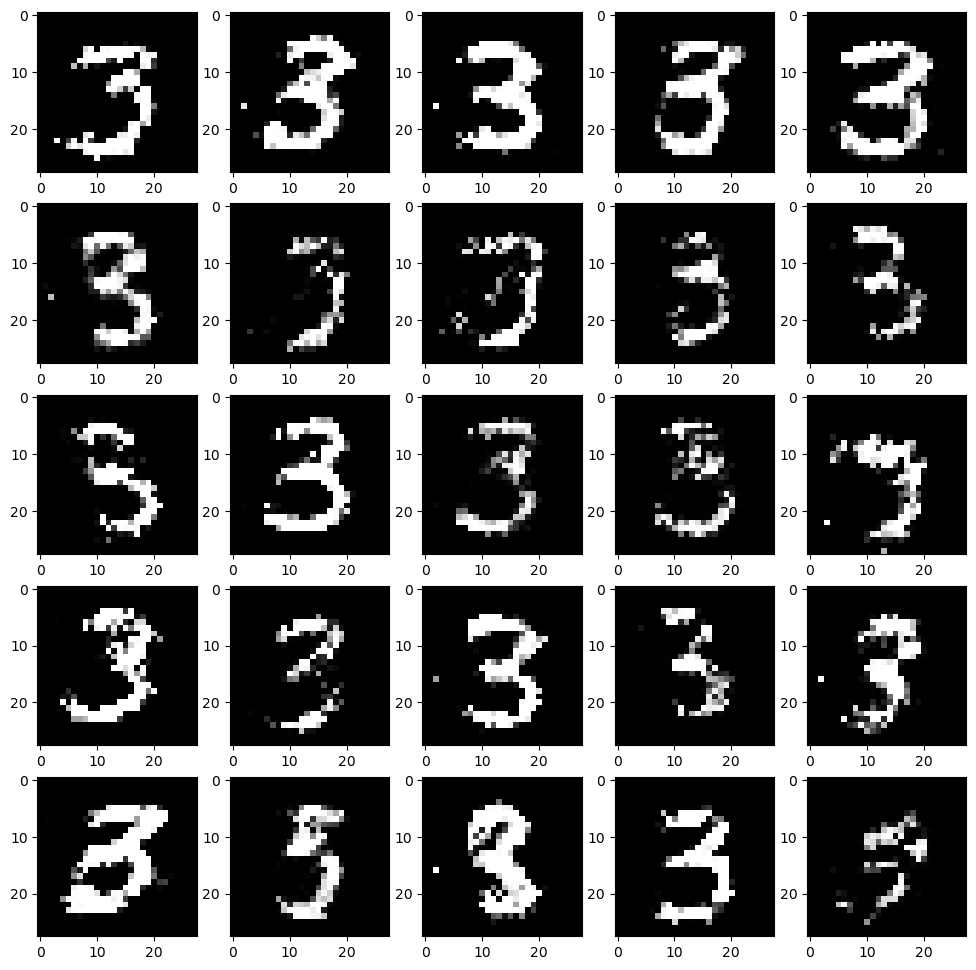

EPOCH  49


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


losses-> 0.6207411885261536   0.9195445775985718


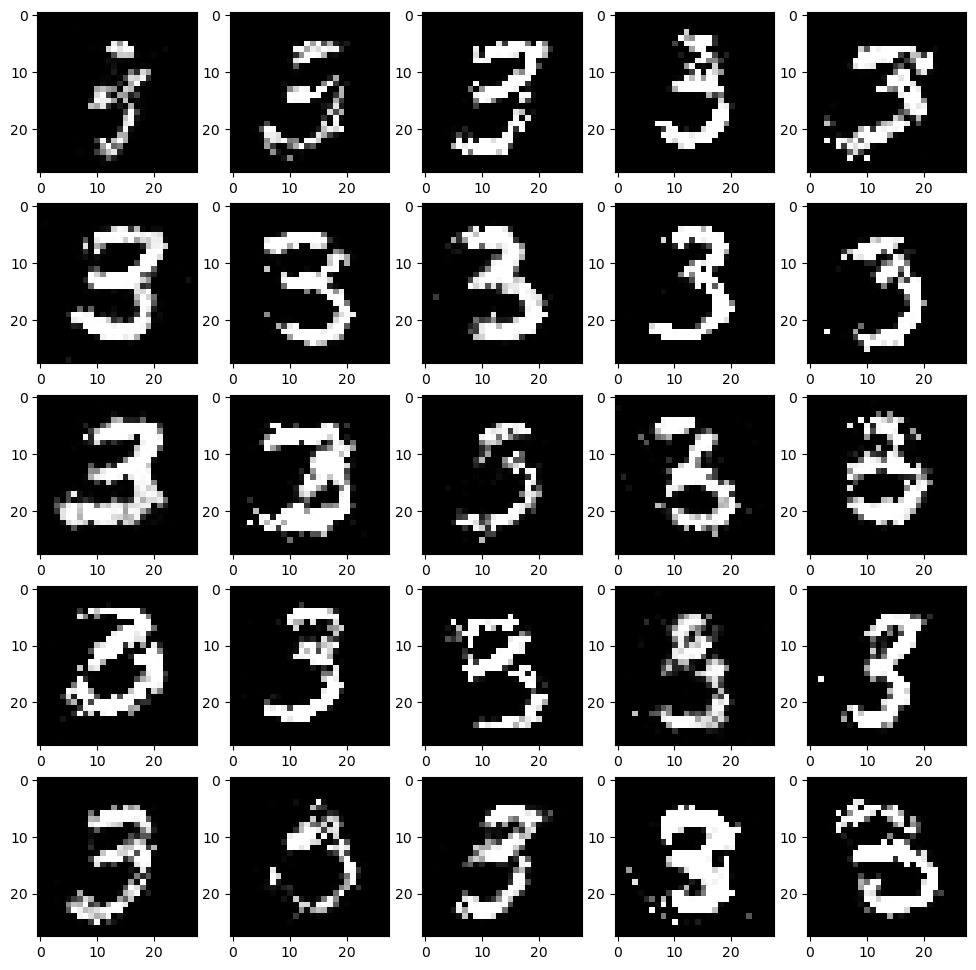

EPOCH  50


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


losses-> 0.6340830326080322   0.8945987224578857


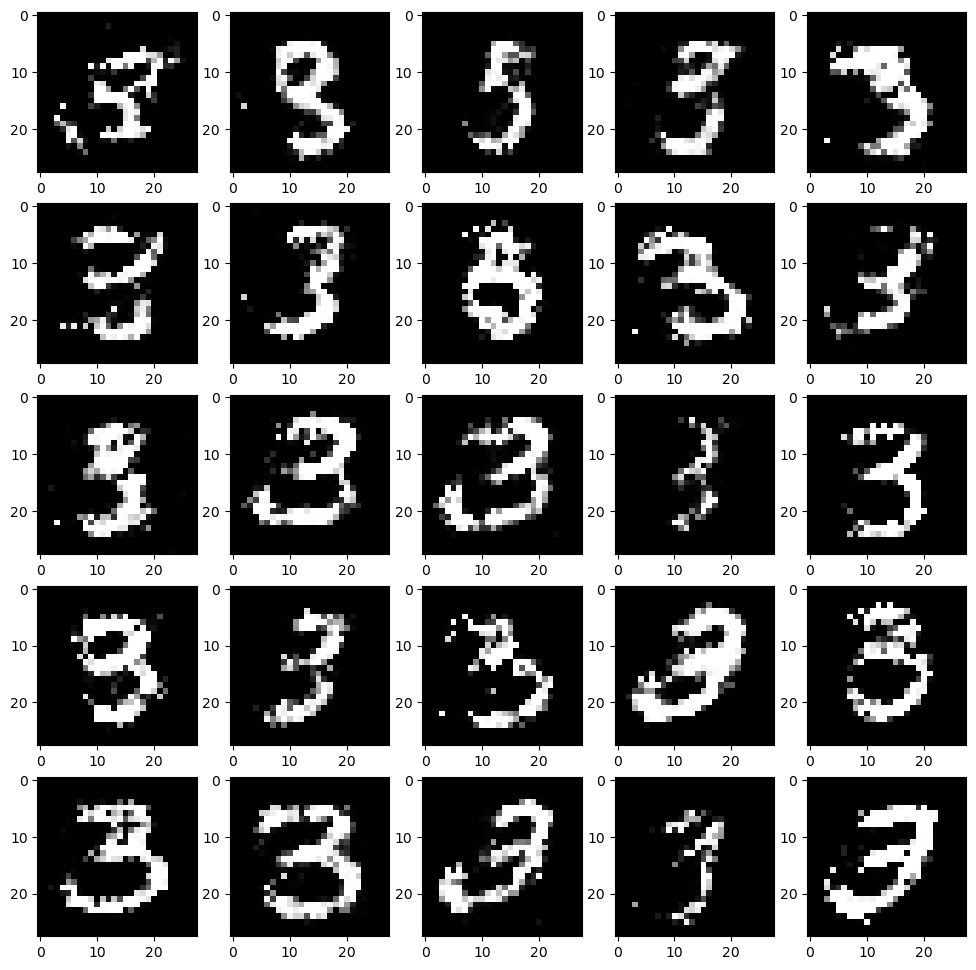

EPOCH  51


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


losses-> 0.6499106884002686   0.8635550737380981


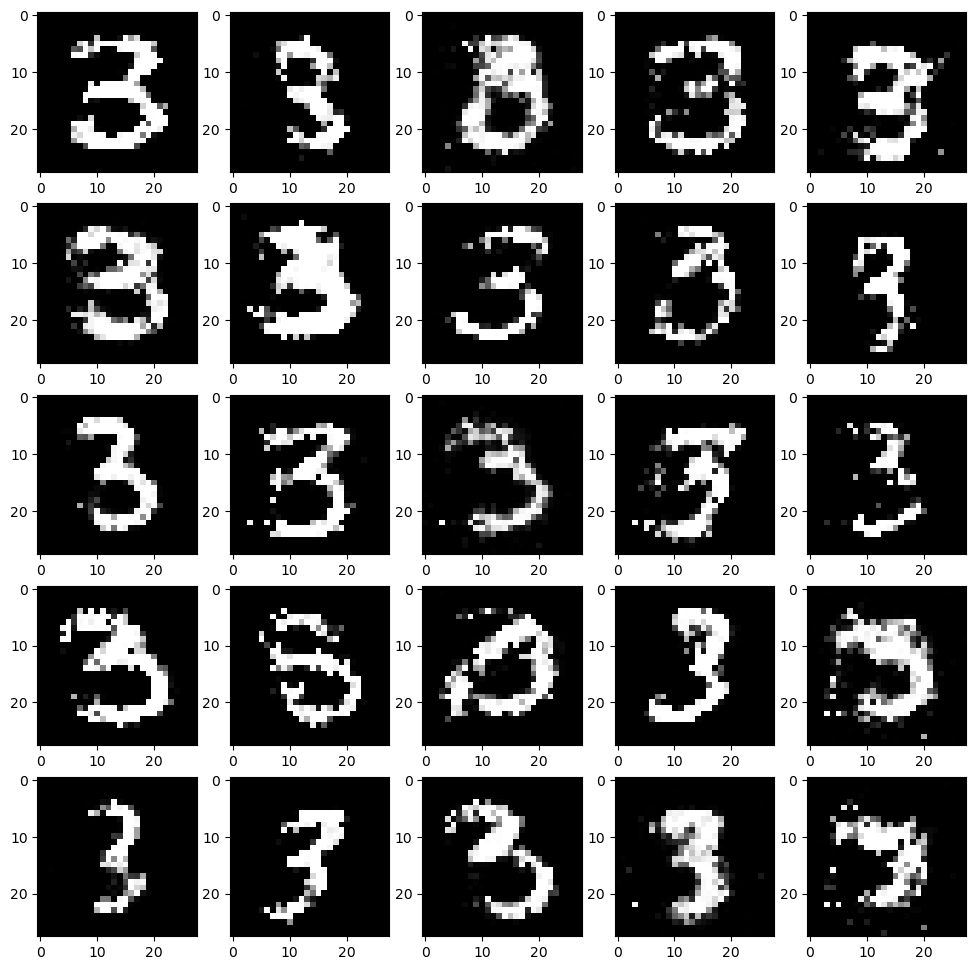

EPOCH  52


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


losses-> 0.6358489990234375   0.9063763618469238


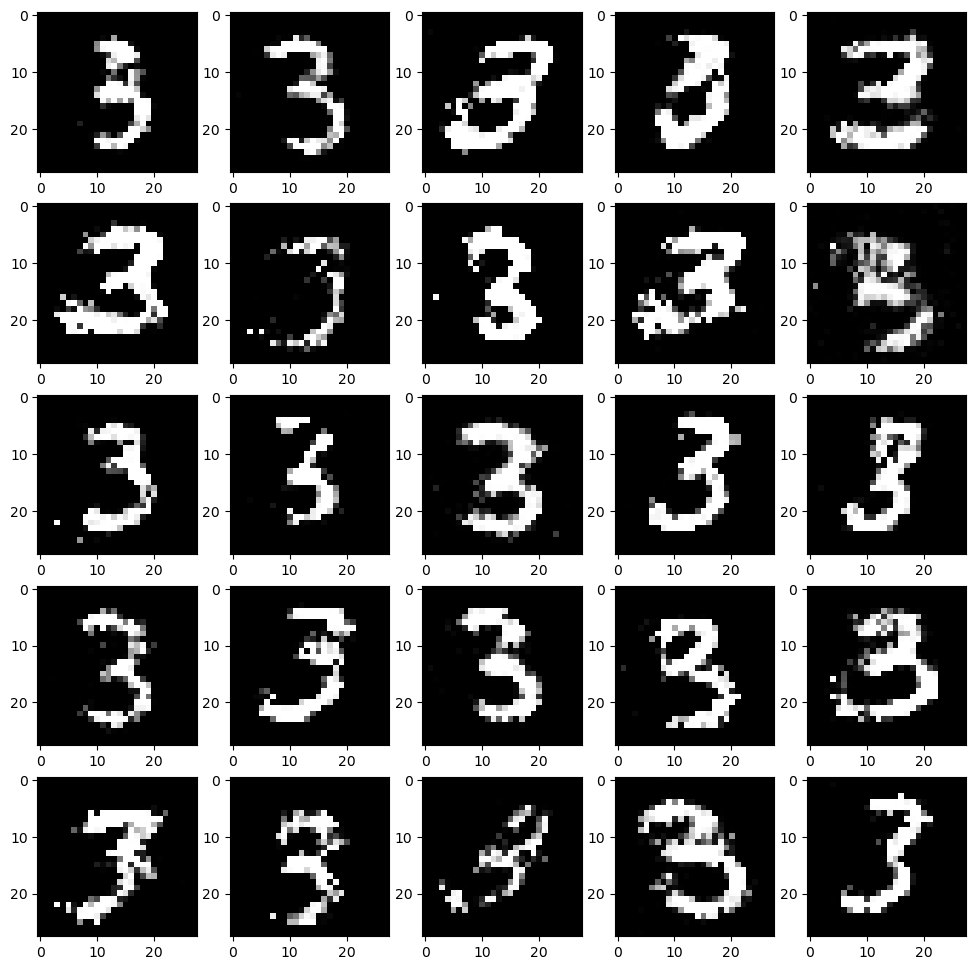

EPOCH  53


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


losses-> 0.636286735534668   0.9214365482330322


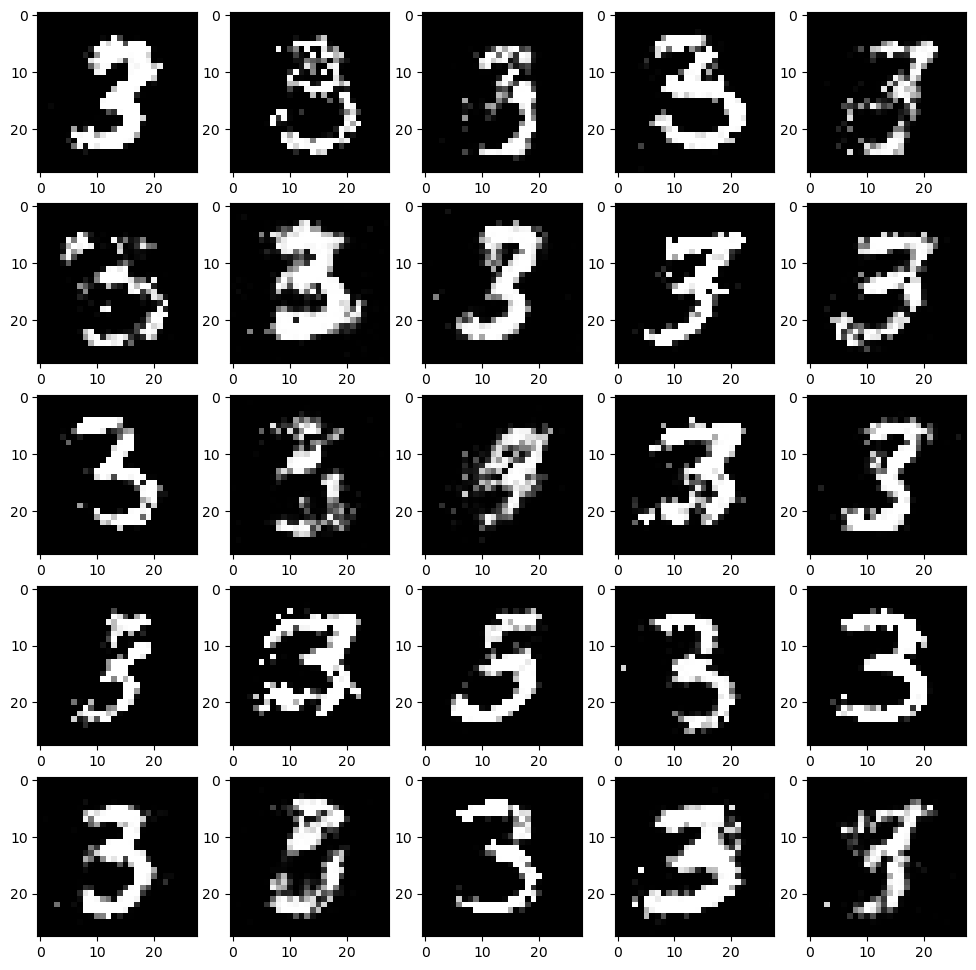

EPOCH  54


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6325279474258423   0.9045445919036865


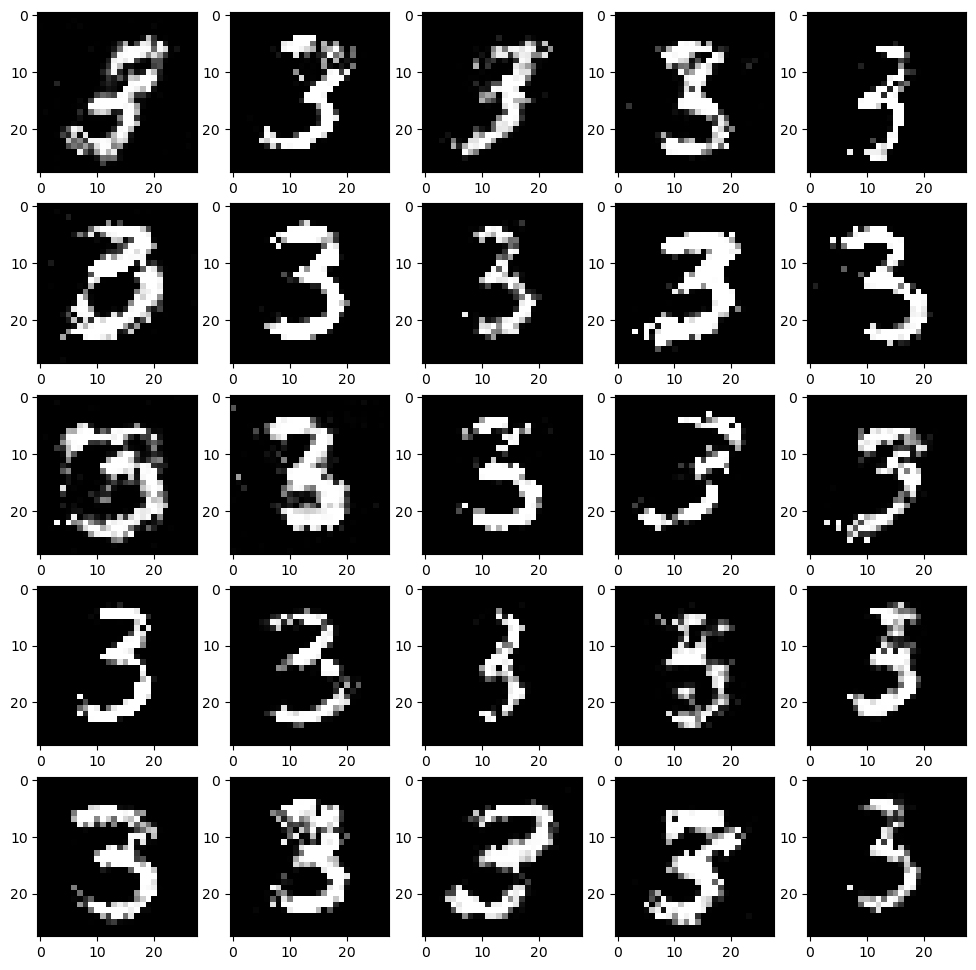

EPOCH  55


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


losses-> 0.6309742331504822   0.912727952003479


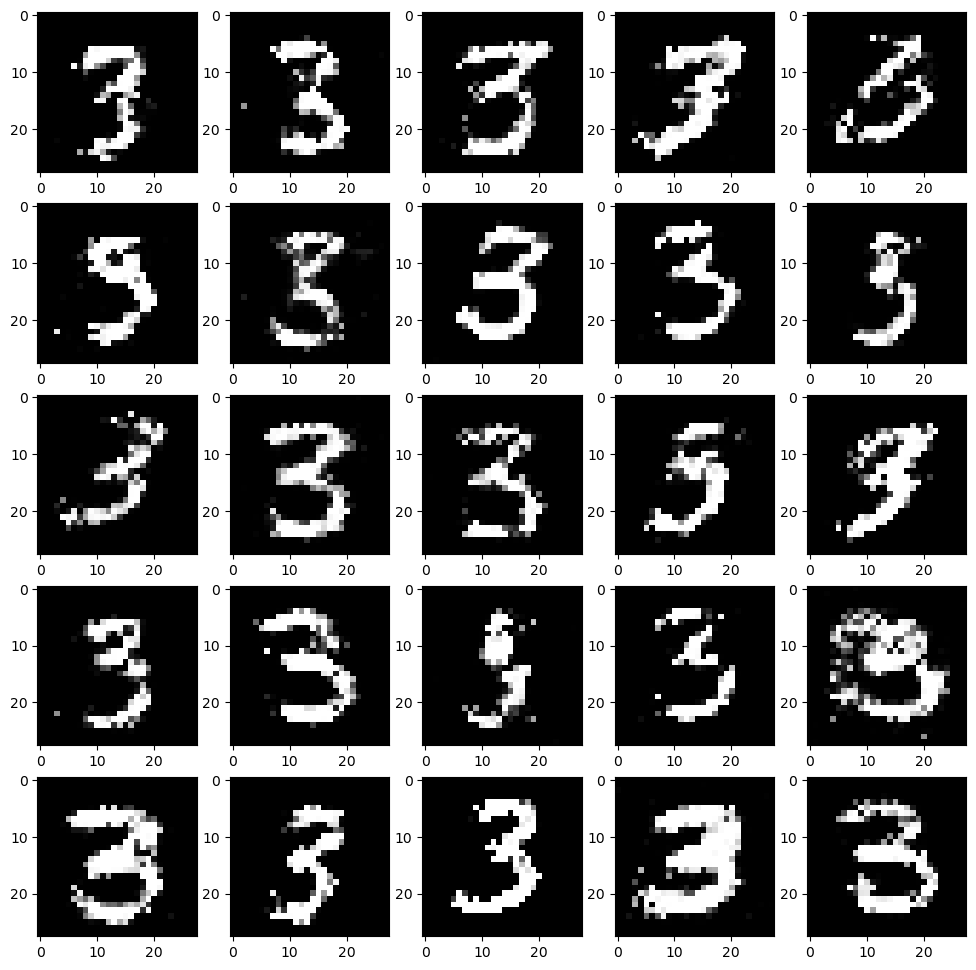

EPOCH  56


100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


losses-> 0.6362709999084473   0.8734482526779175


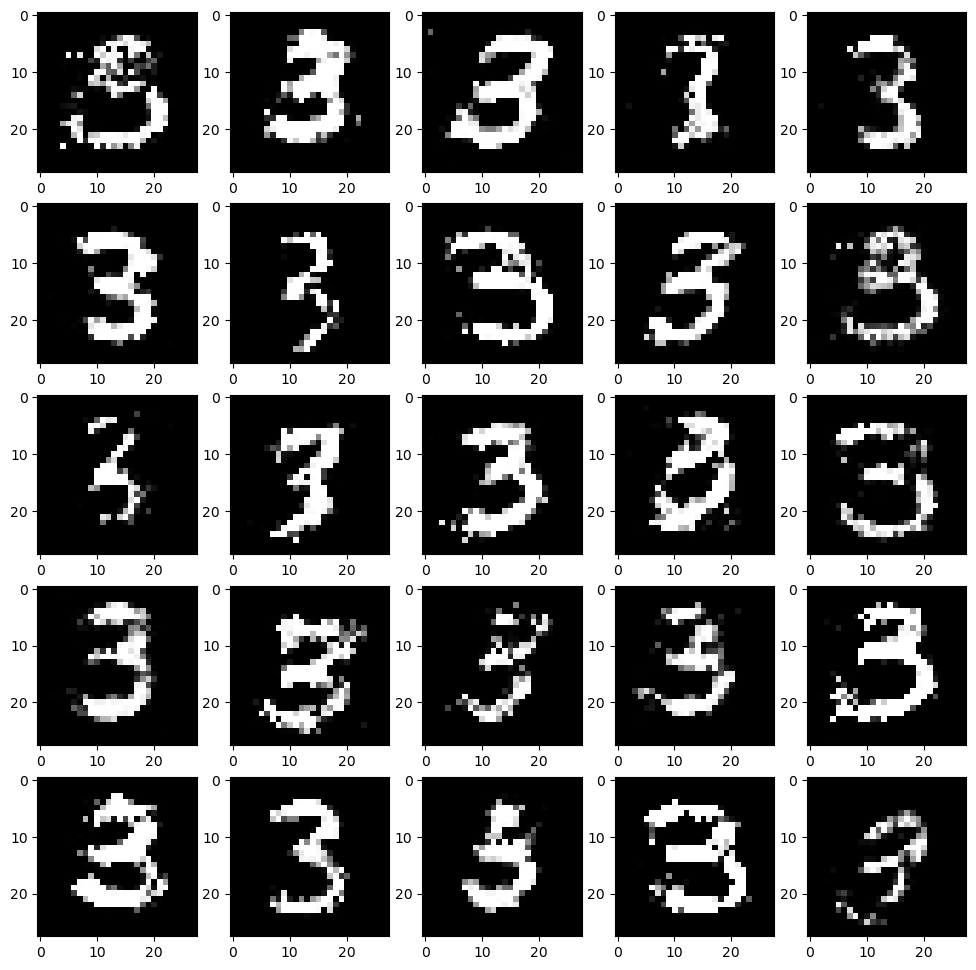

EPOCH  57


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


losses-> 0.6287345886230469   0.8346277475357056


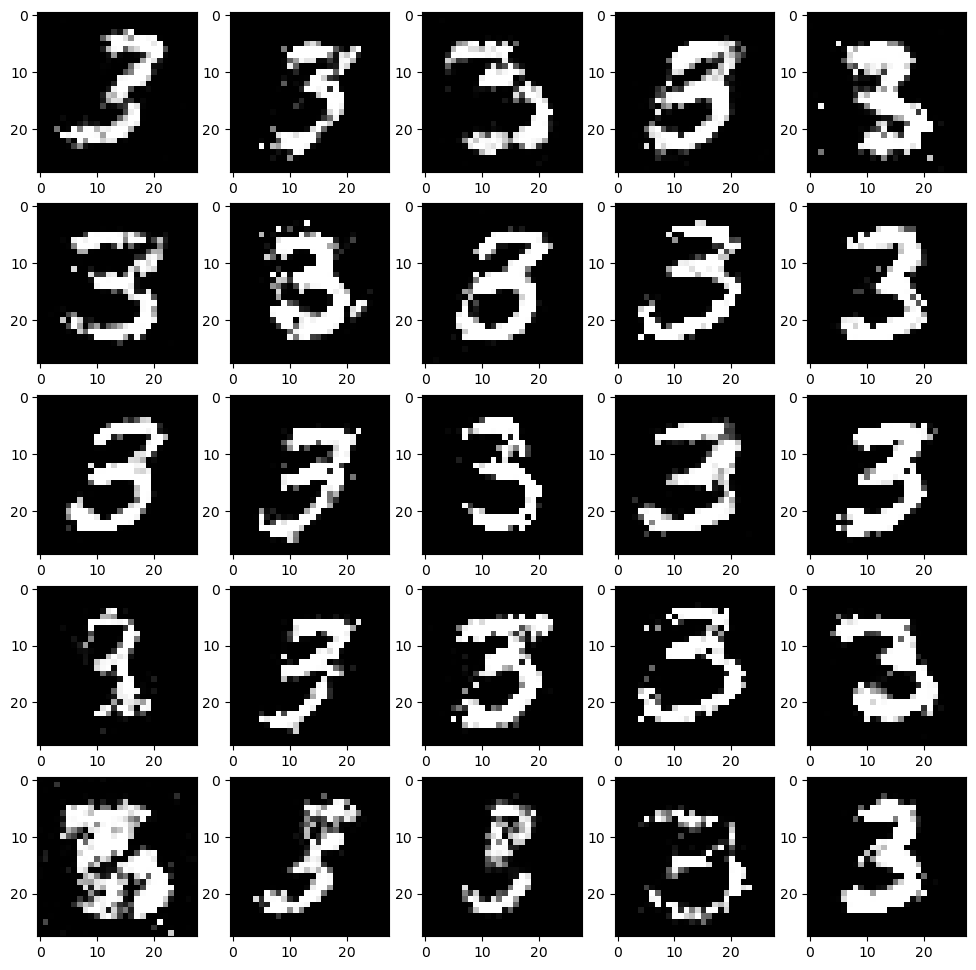

EPOCH  58


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.627841591835022   0.8716835975646973


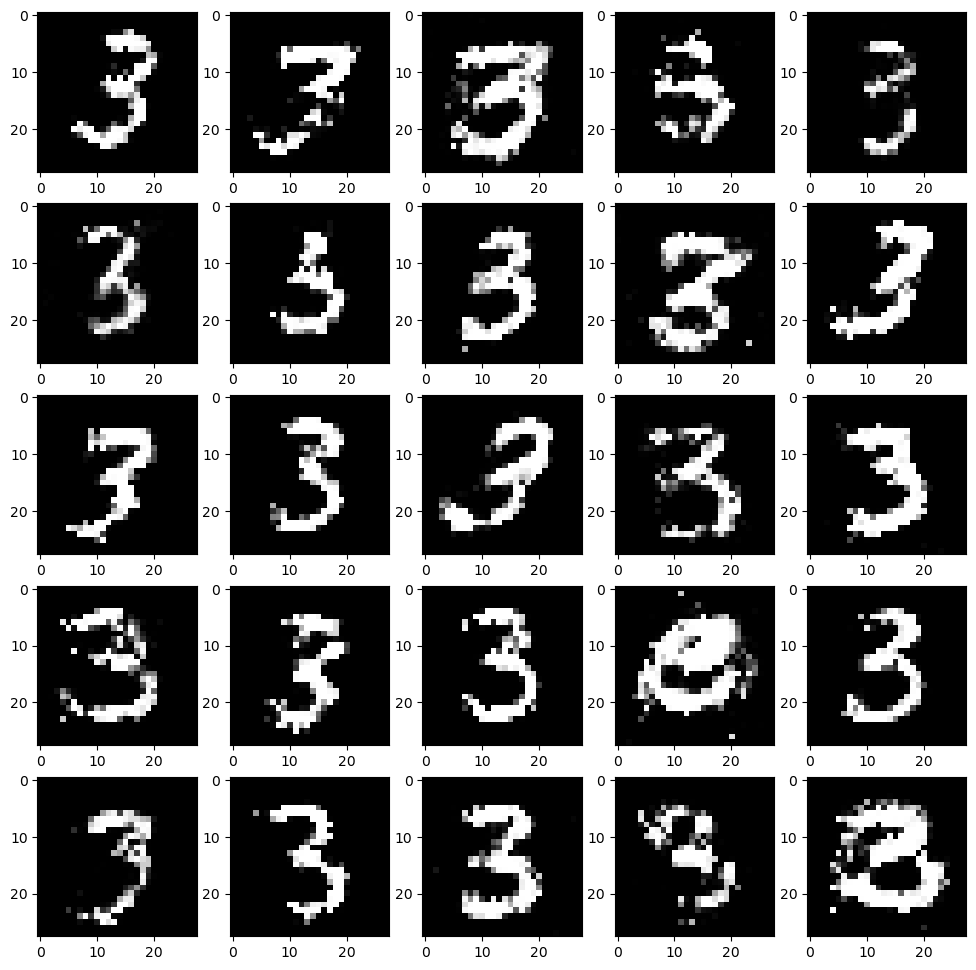

EPOCH  59


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6556413769721985   0.8613720536231995


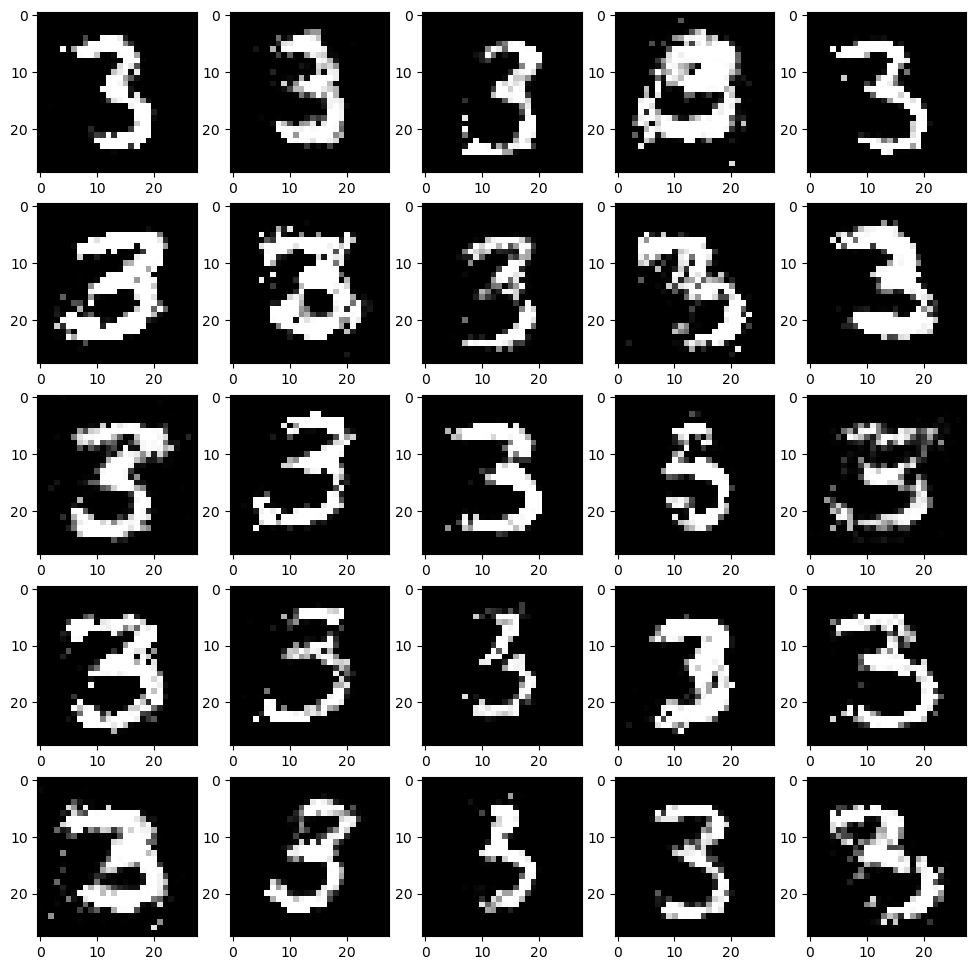

EPOCH  60


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


losses-> 0.6404181718826294   0.8724920749664307


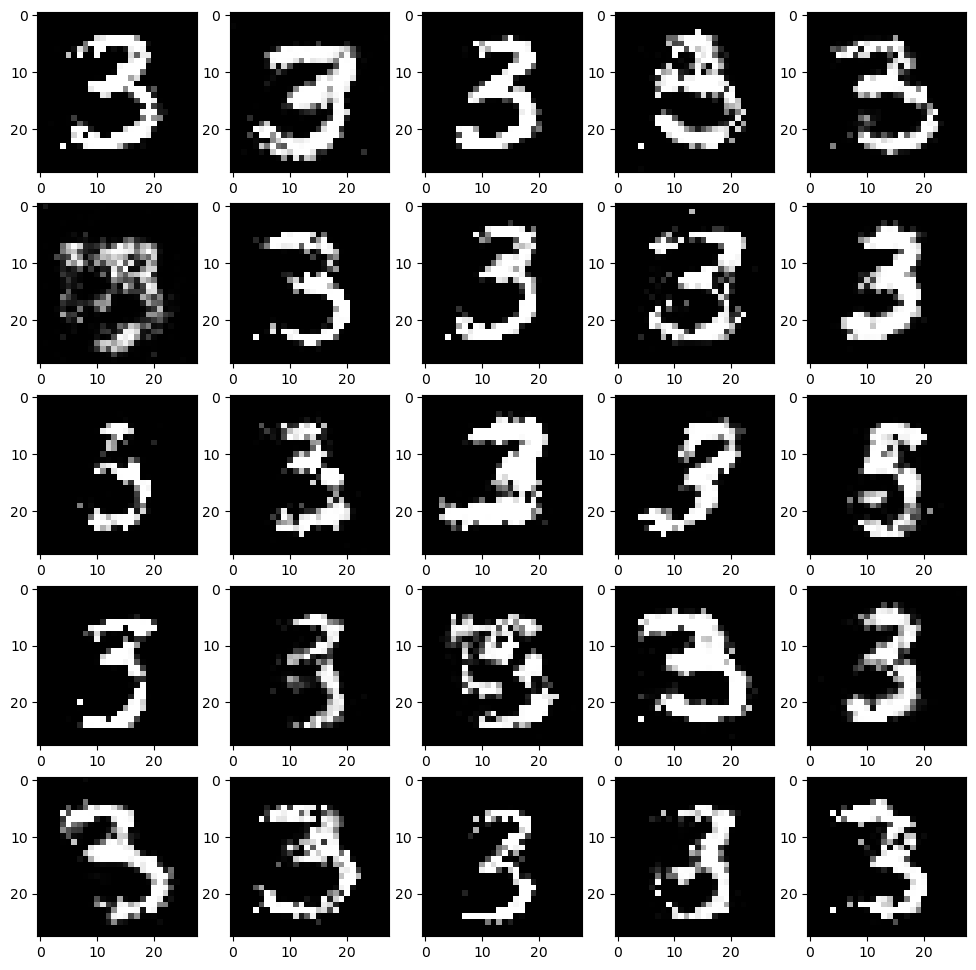

EPOCH  61


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


losses-> 0.6291625499725342   0.9436513185501099


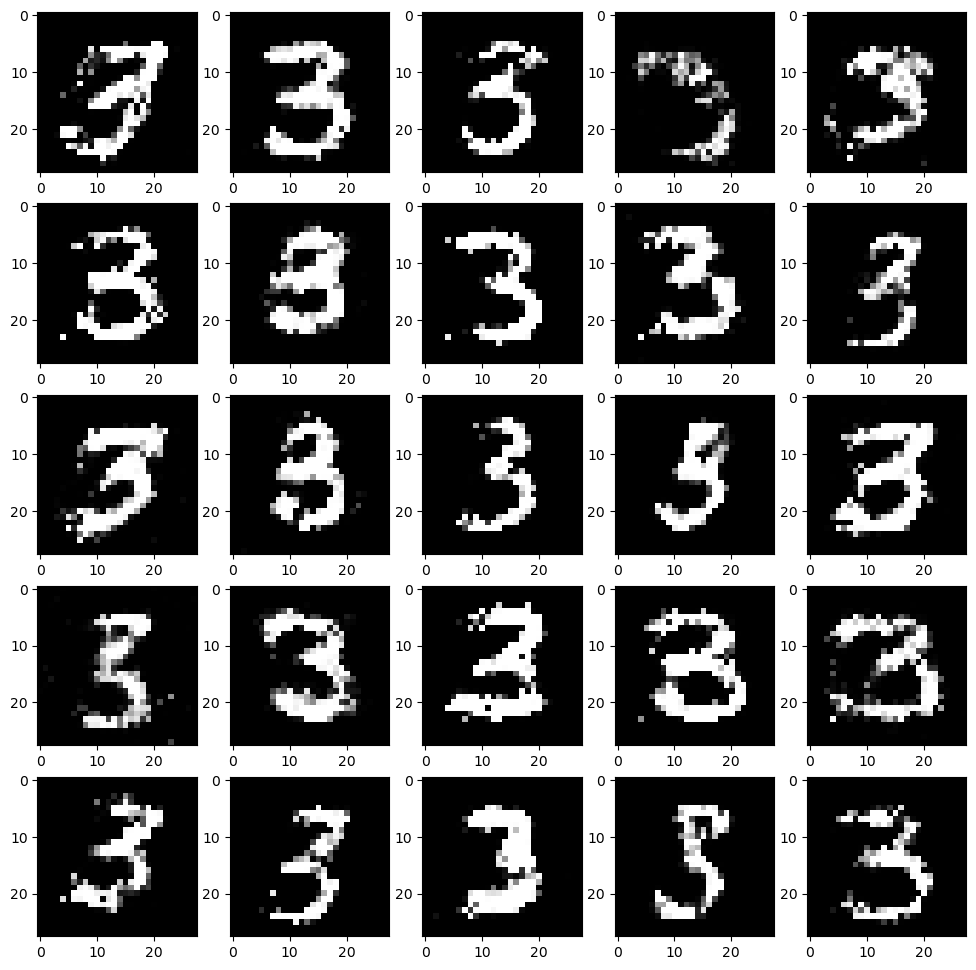

EPOCH  62


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6437606811523438   0.9102751016616821


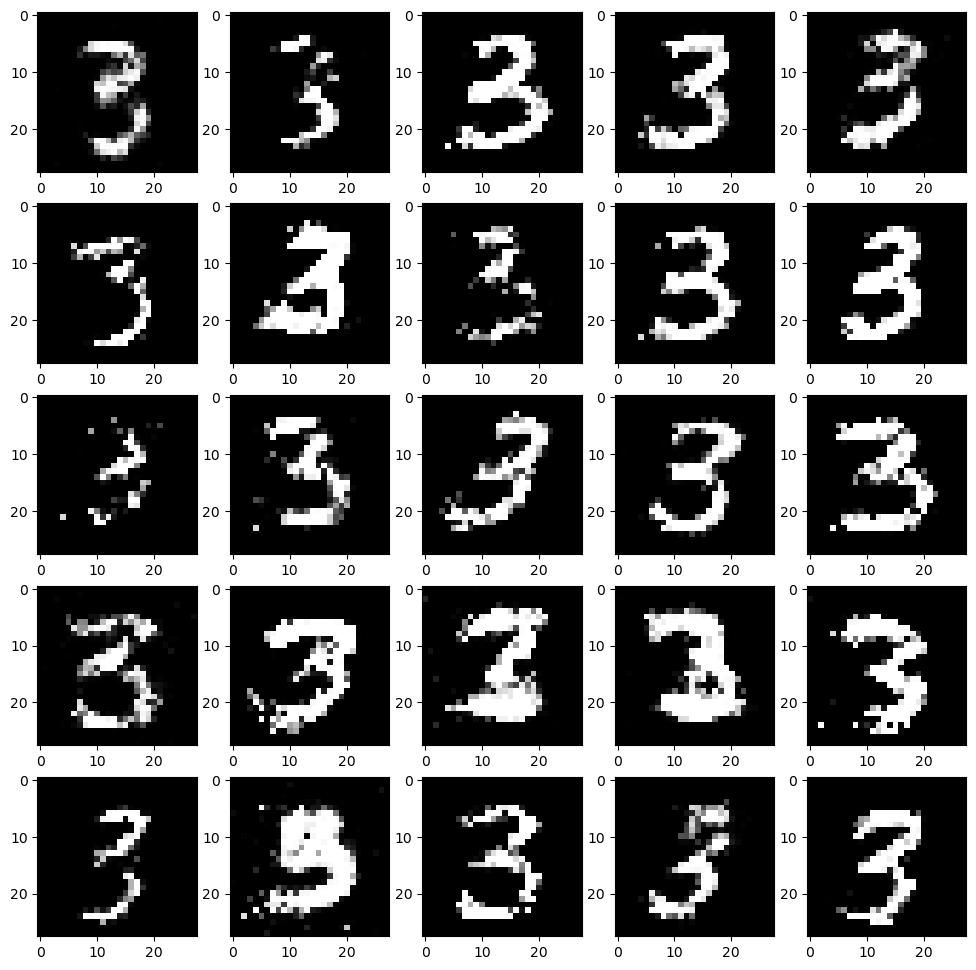

EPOCH  63


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


losses-> 0.6374818682670593   0.882639467716217


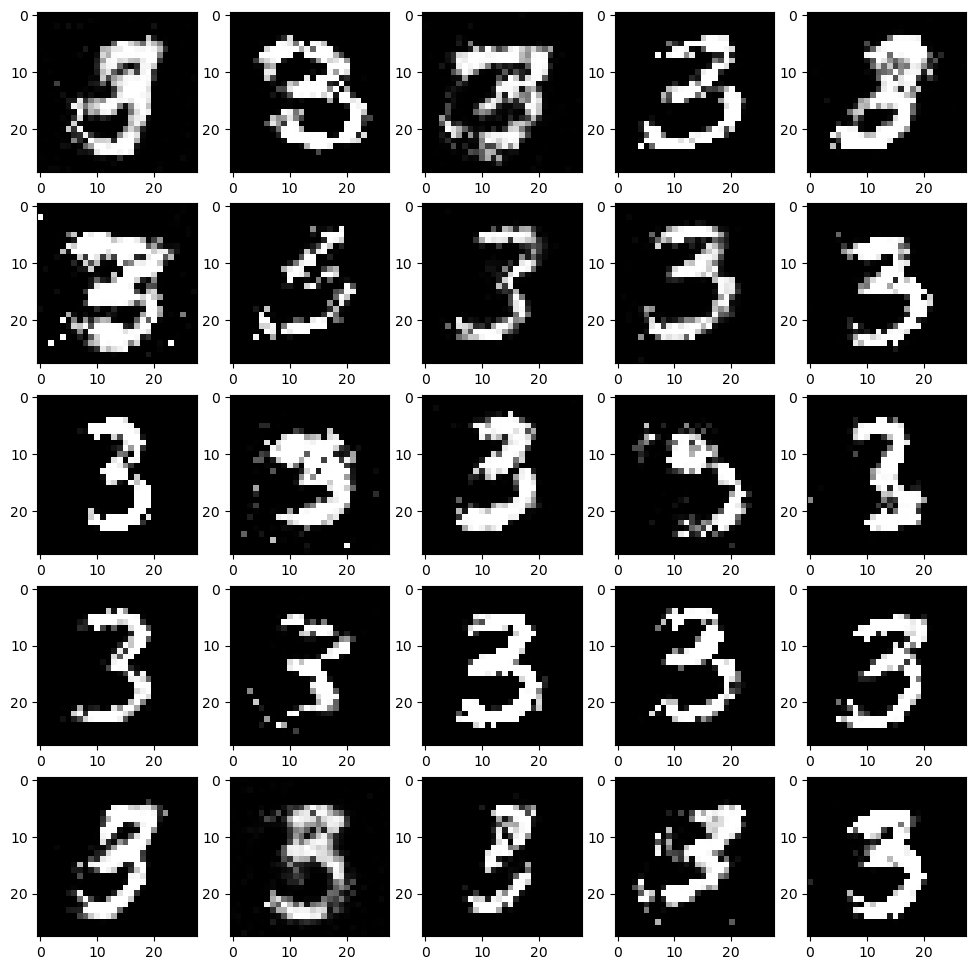

EPOCH  64


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


losses-> 0.6331281661987305   0.9056333899497986


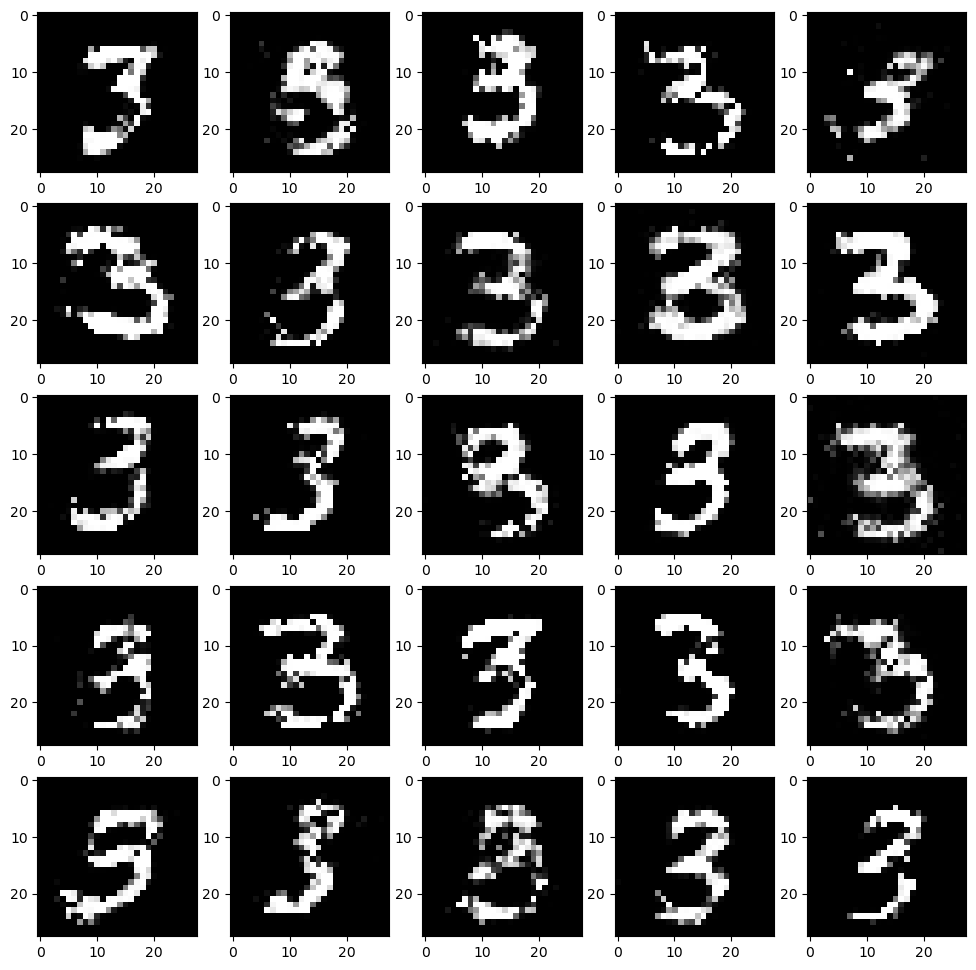

EPOCH  65


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


losses-> 0.6411499977111816   0.9011741876602173


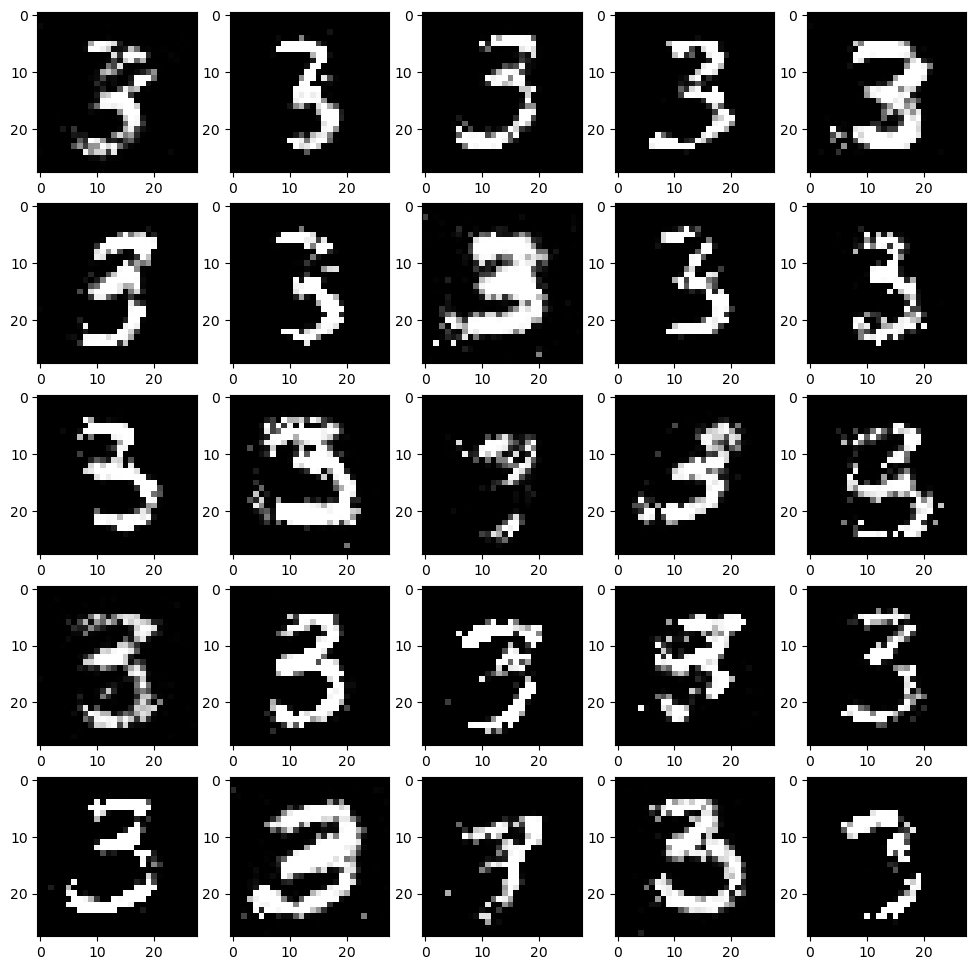

EPOCH  66


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6549930572509766   0.8804315328598022


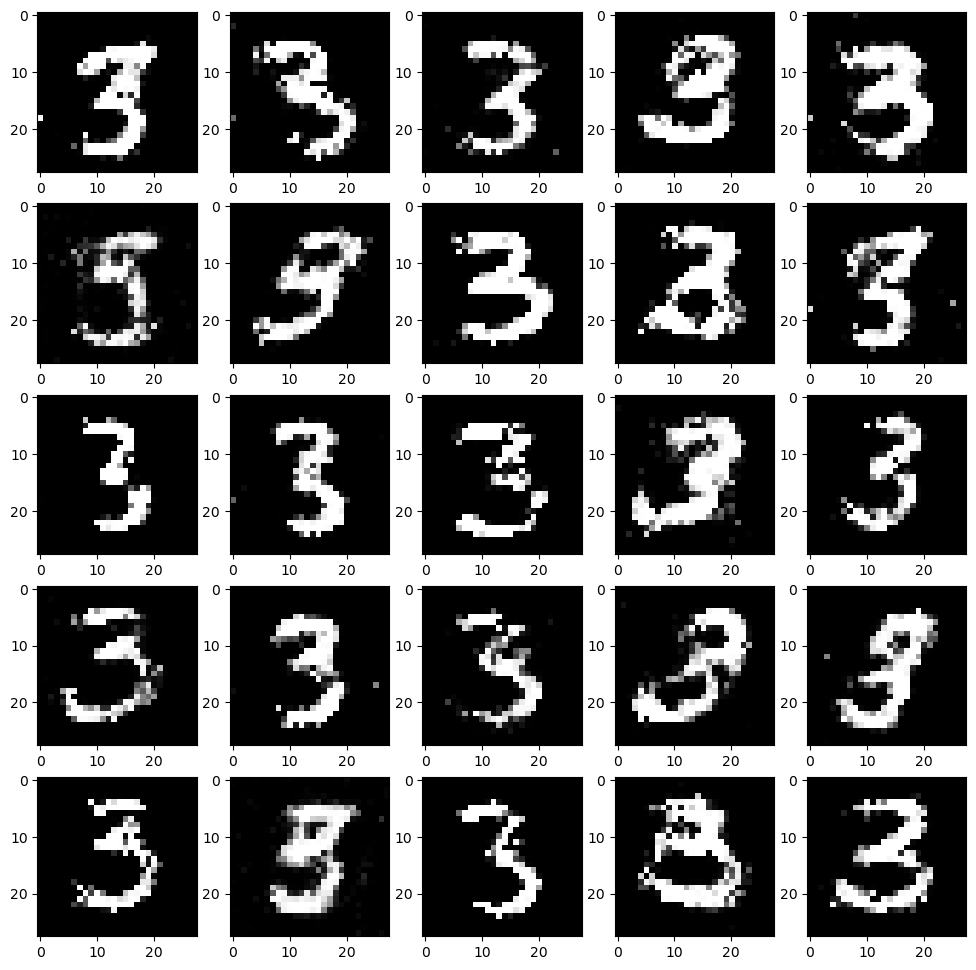

EPOCH  67


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6392824053764343   0.8908796906471252


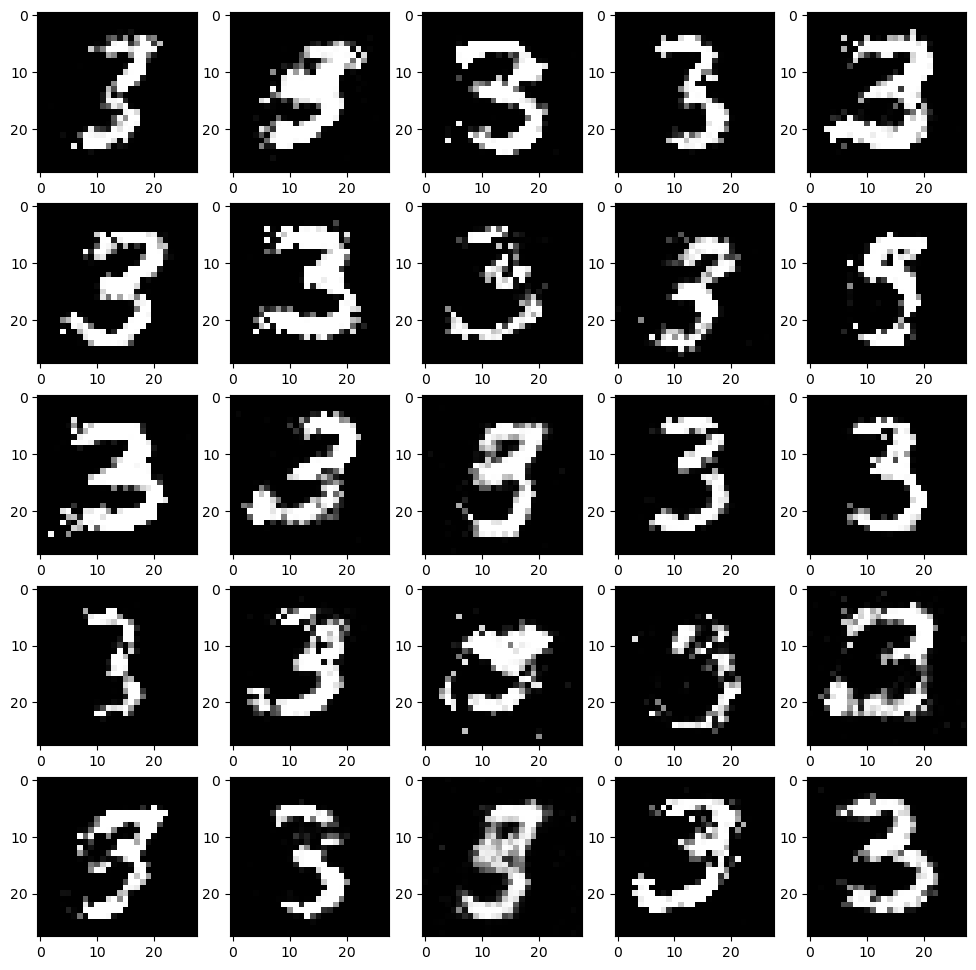

EPOCH  68


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6560380458831787   0.889868438243866


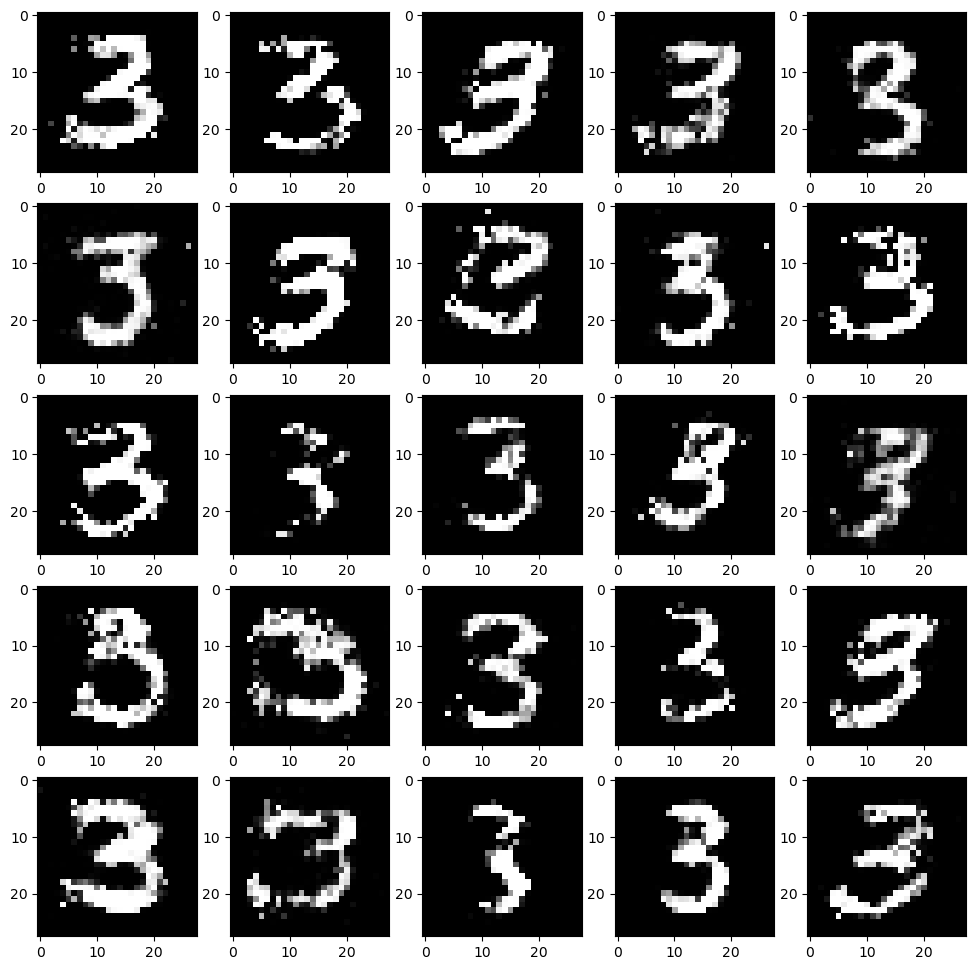

EPOCH  69


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


losses-> 0.6806238293647766   0.8384923338890076


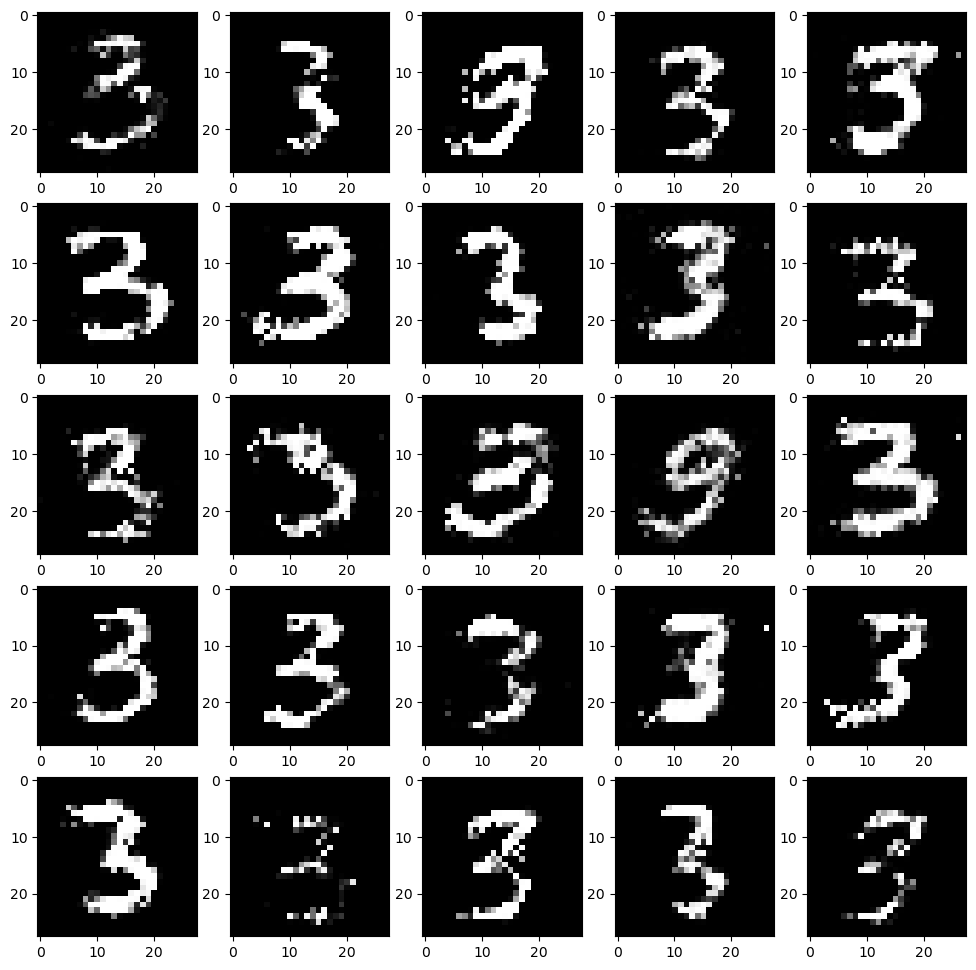

EPOCH  70


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


losses-> 0.622456431388855   0.913339376449585


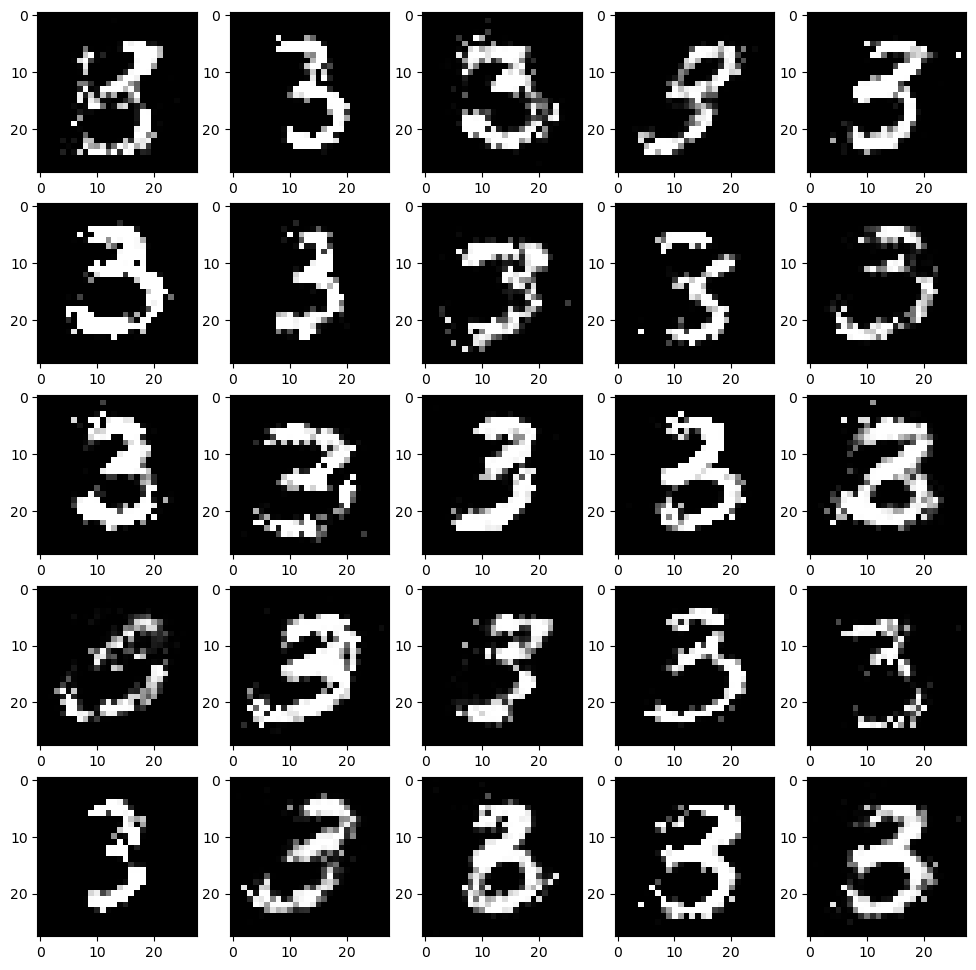

EPOCH  71


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6466079354286194   0.9229263067245483


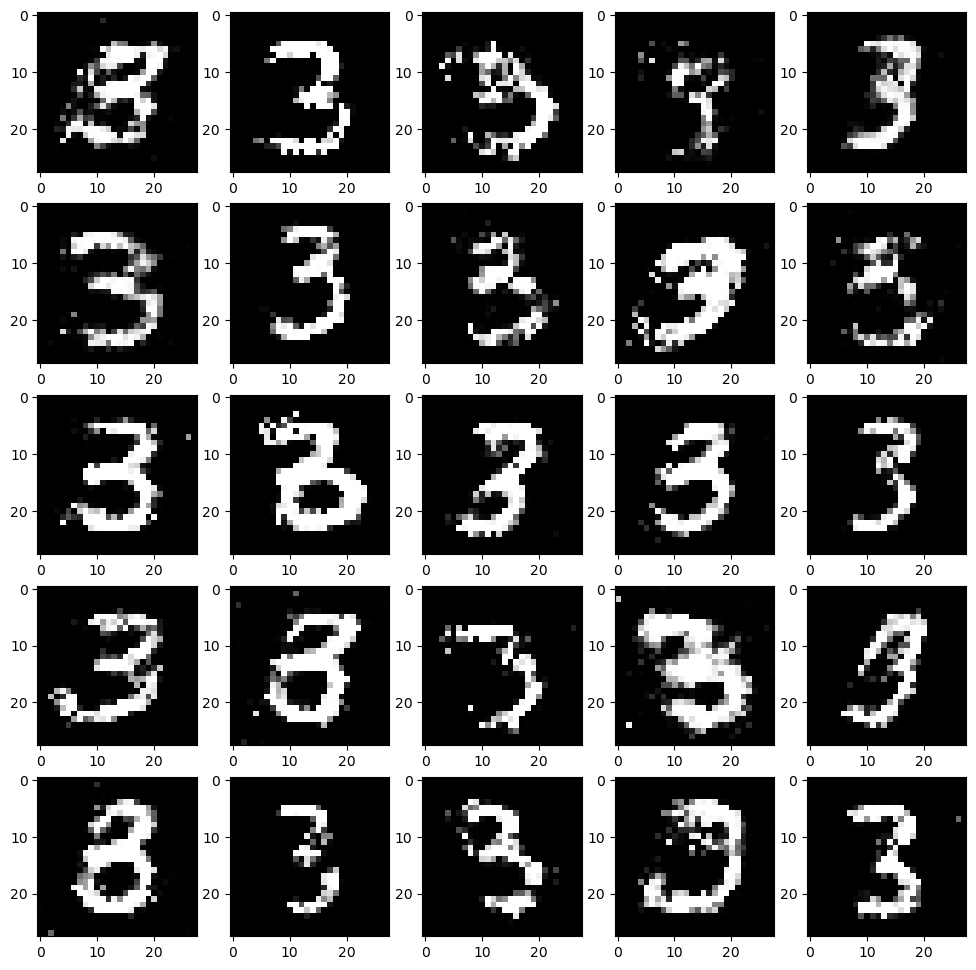

EPOCH  72


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6729178428649902   0.8916106820106506


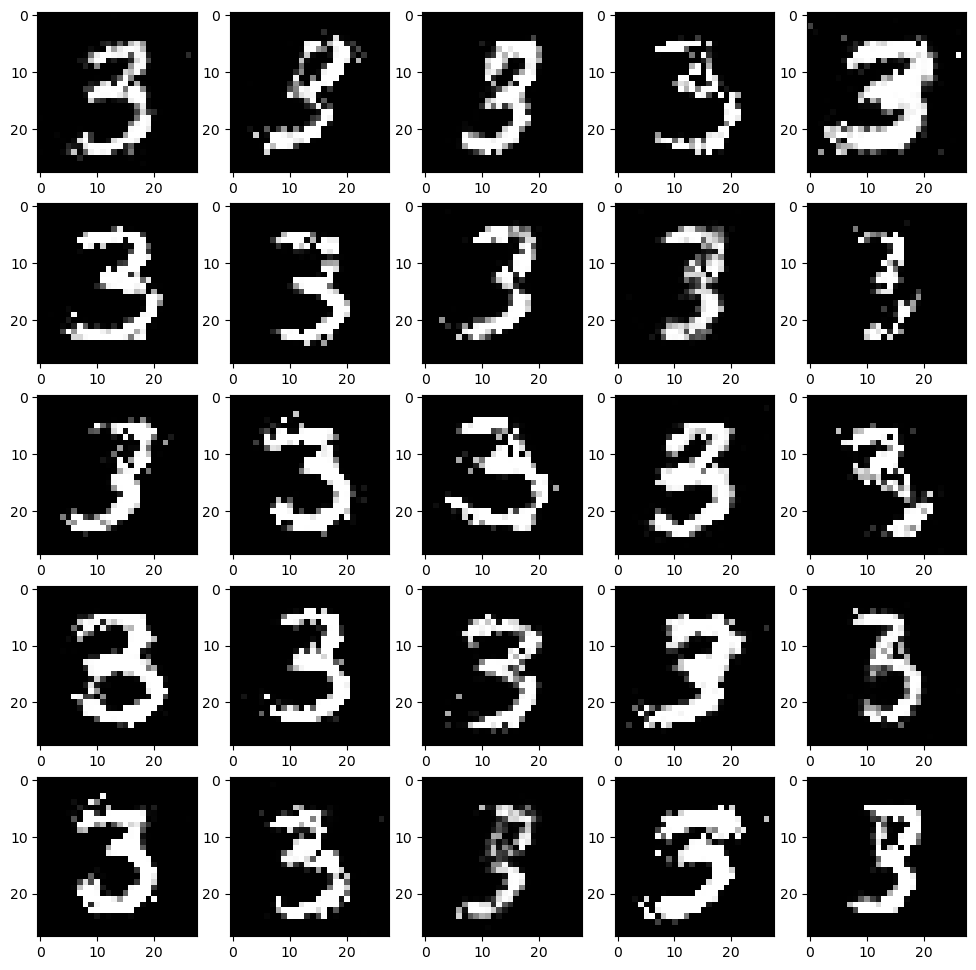

EPOCH  73


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


losses-> 0.6367089748382568   0.9052567481994629


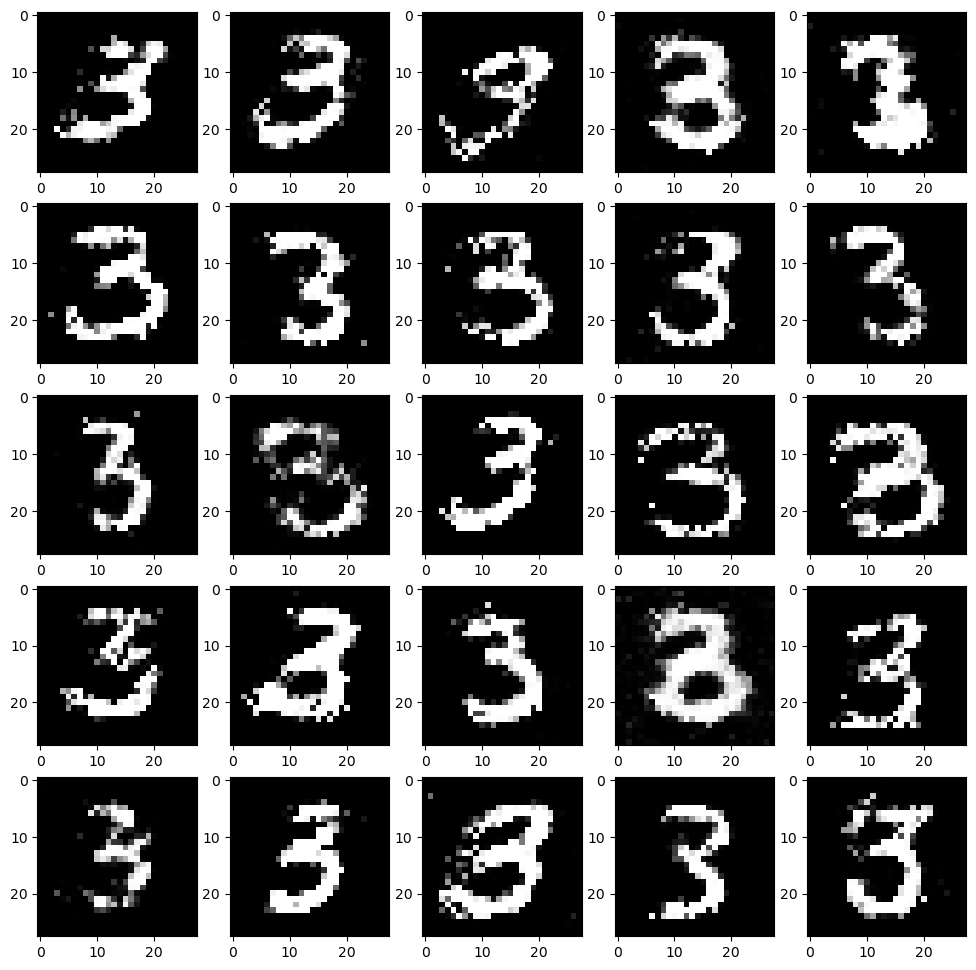

EPOCH  74


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


losses-> 0.6194319725036621   0.92984938621521


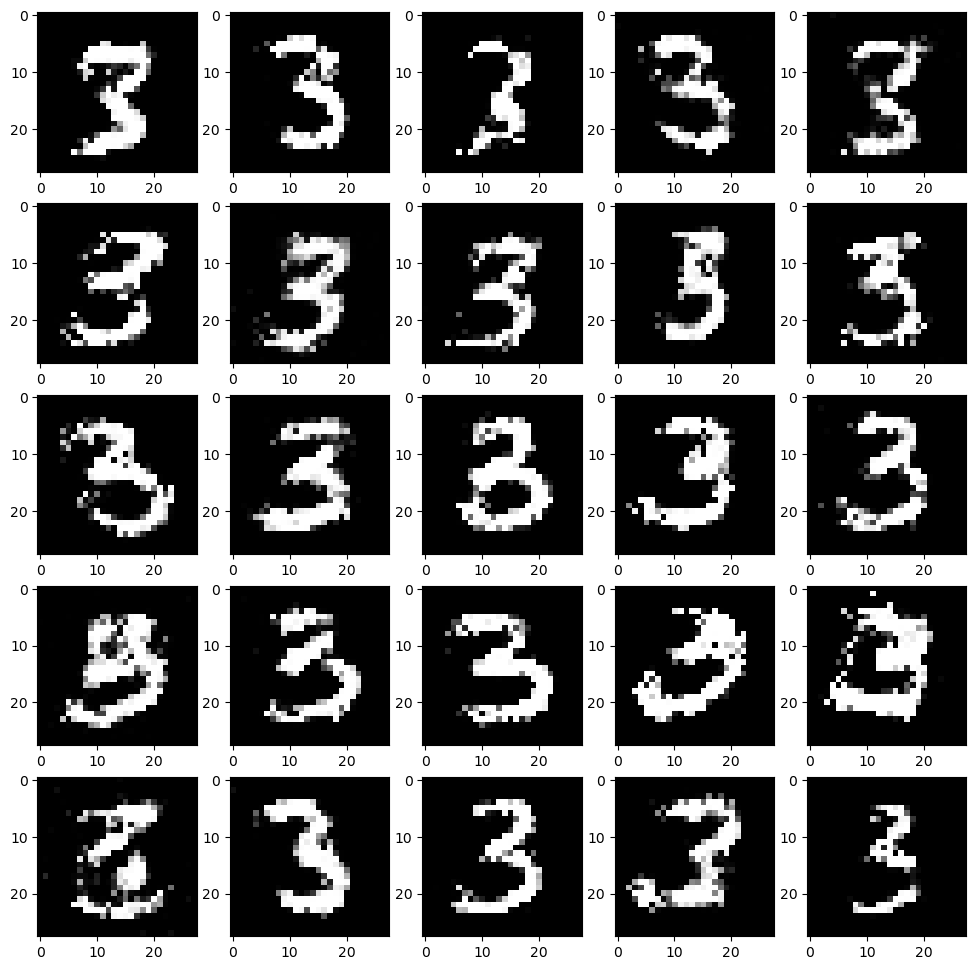

EPOCH  75


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


losses-> 0.6554261445999146   0.8910104632377625


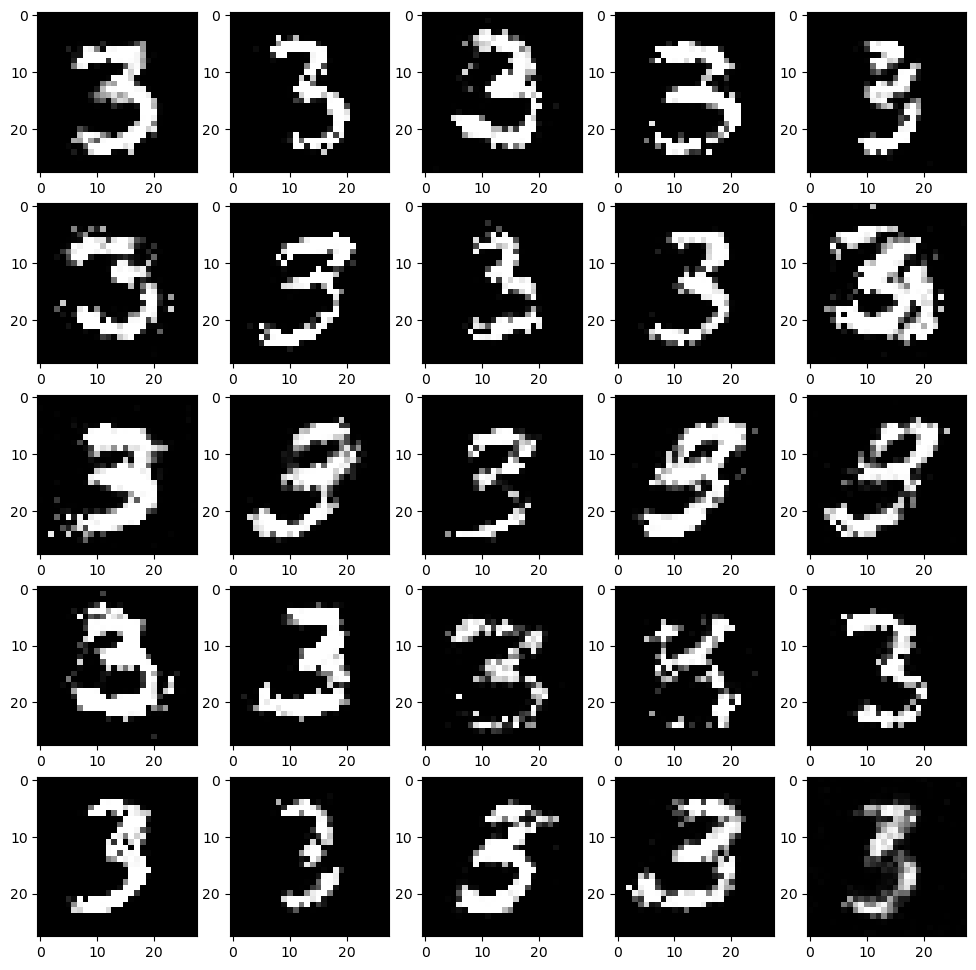

EPOCH  76


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


losses-> 0.6489495038986206   0.8643225431442261


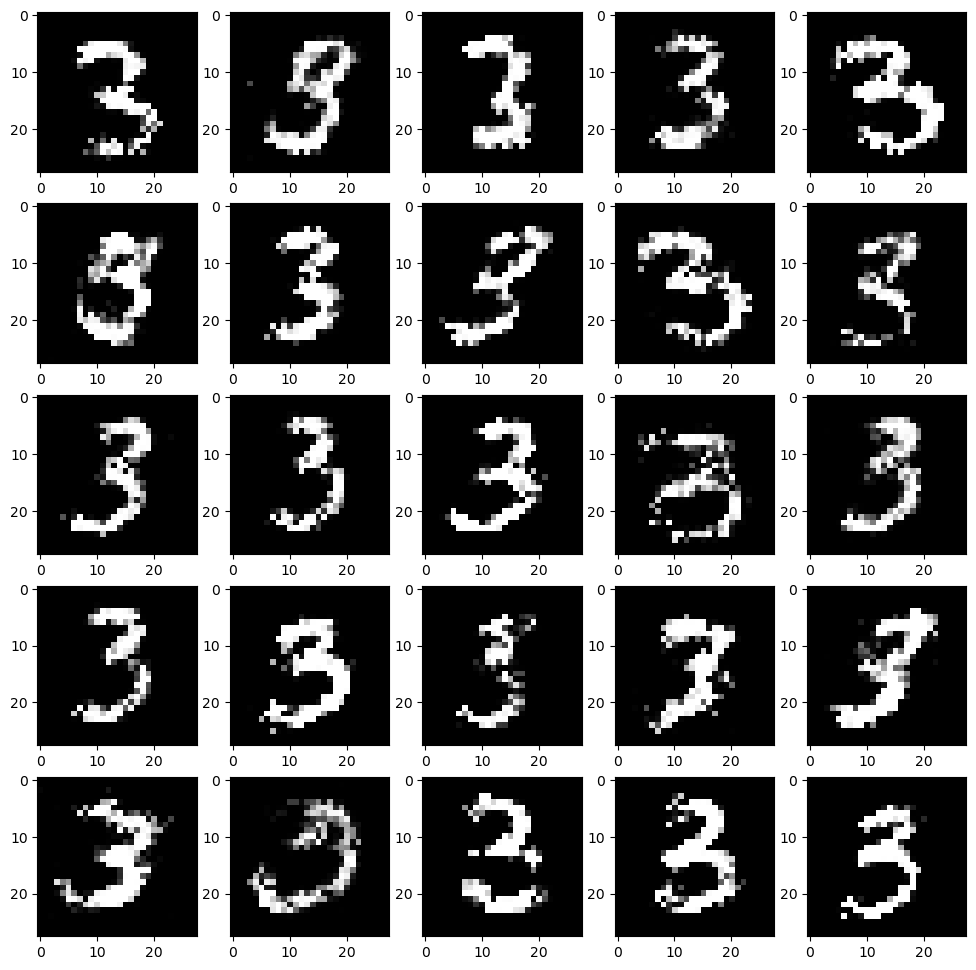

EPOCH  77


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


losses-> 0.6255999803543091   0.8887912034988403


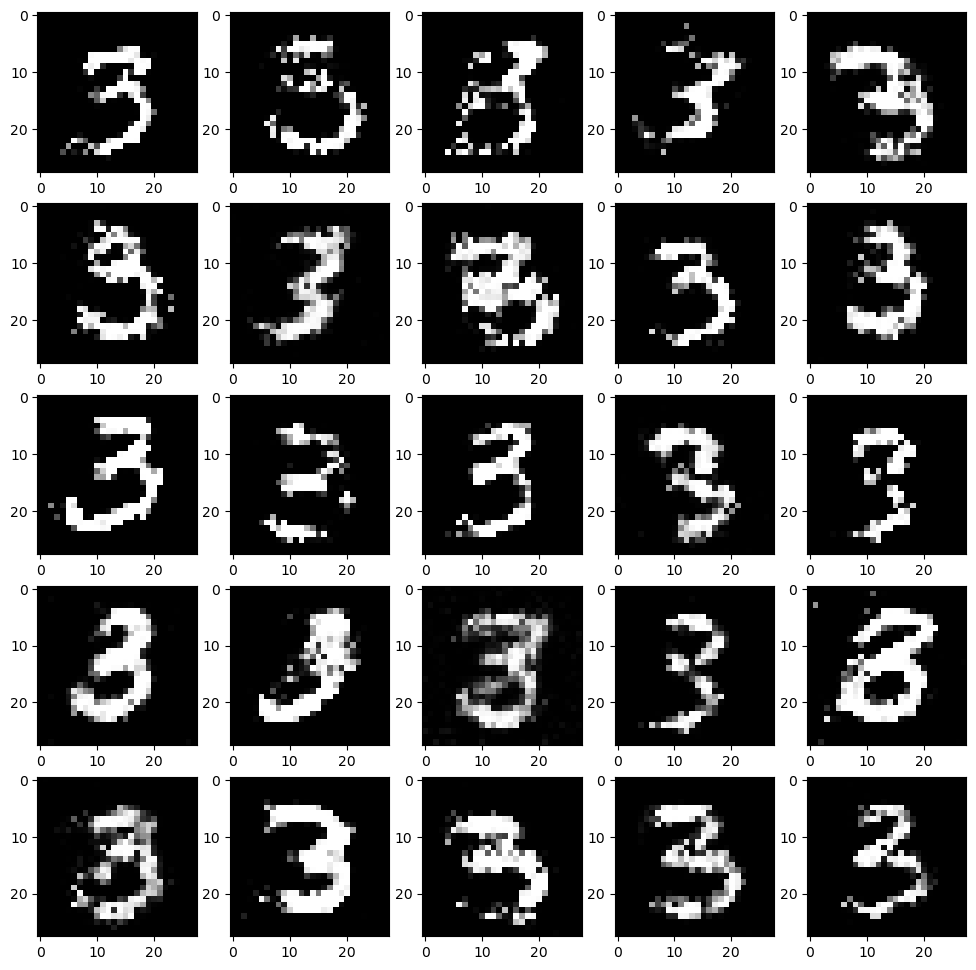

EPOCH  78


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


losses-> 0.6386433243751526   0.9414722323417664


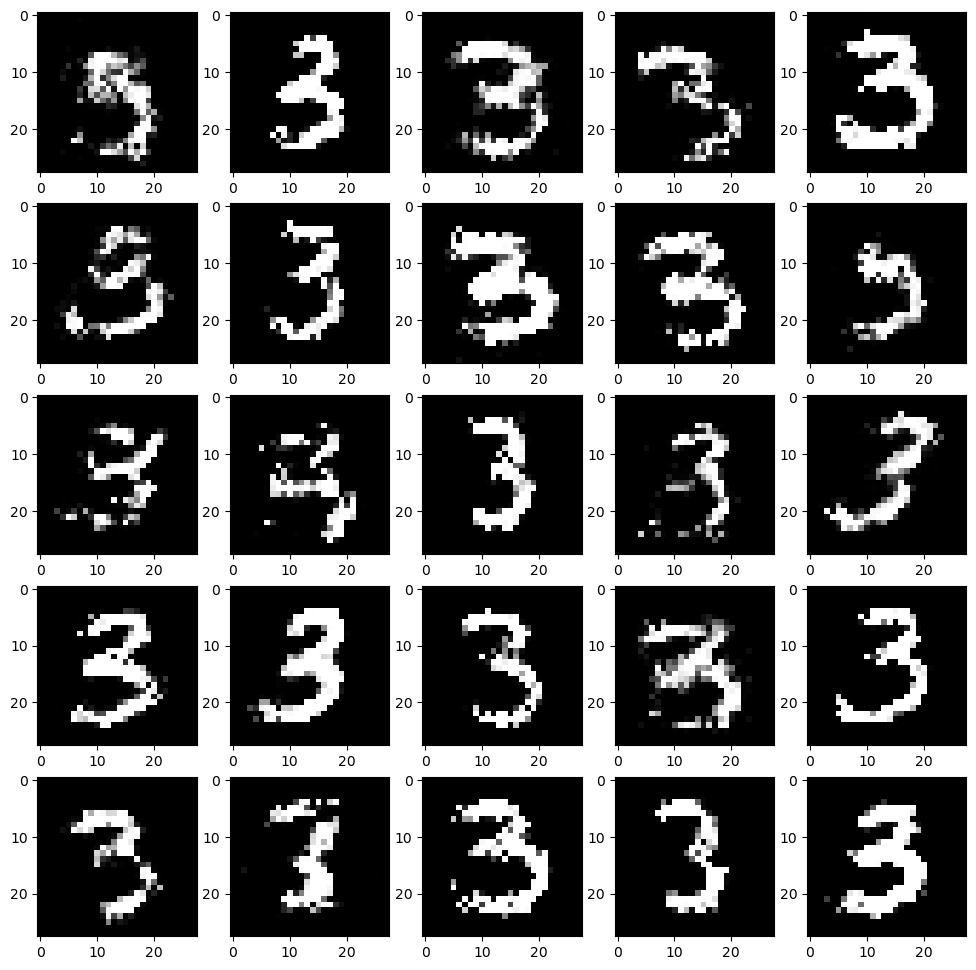

EPOCH  79


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


losses-> 0.6540471911430359   0.895768404006958


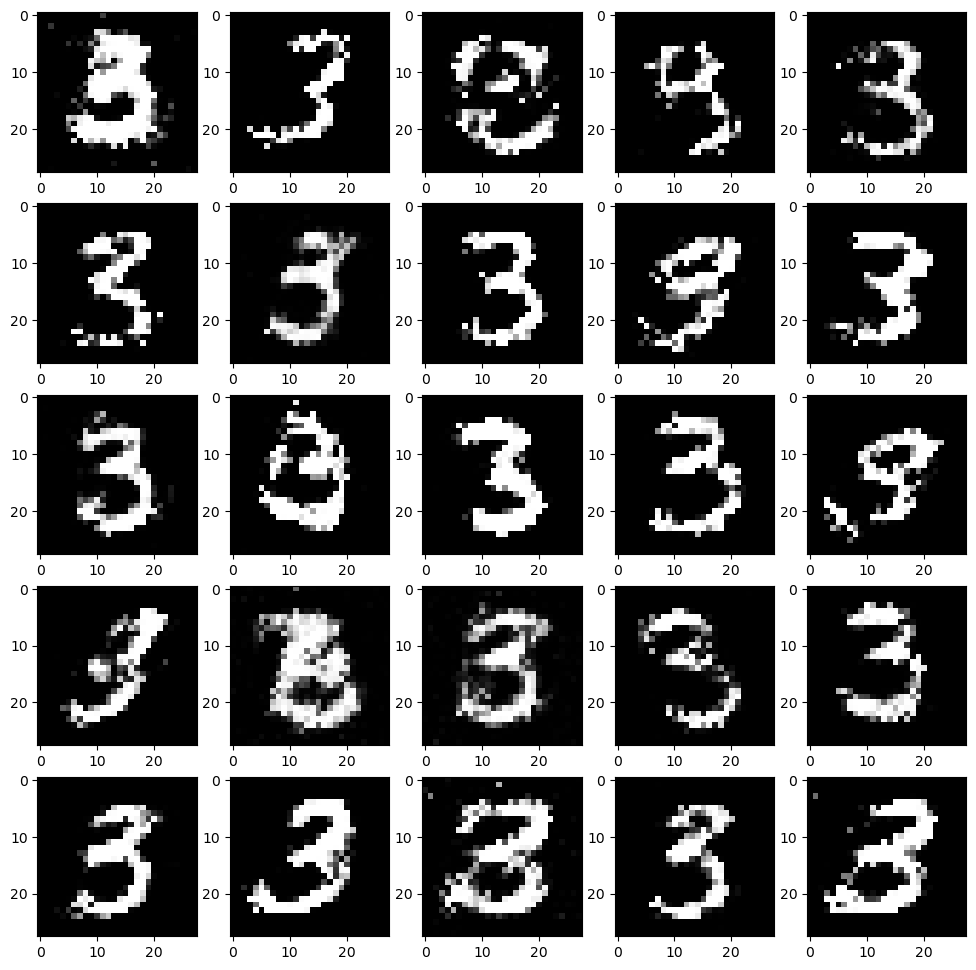

In [169]:

for i in range(epochs):
    print("EPOCH ",i)
    for j in tqdm(range(len(X)//batch_size)):
        xreal, yreal=X[np.random.randint(0,len(X), half_batch)].reshape(half_batch,28,28,1), np.ones(half_batch).reshape(half_batch, 1)
        xfake, yfake=gener.predict(np.random.randn(half_batch, n),verbose = 0), np.zeros(half_batch).reshape(half_batch, 1)
        xfinal, yfinal=np.vstack((xreal,xfake)), np.vstack((yreal,yfake))
        dloss=discrim.train_on_batch(xfinal,yfinal)
        gloss=gan_model.train_on_batch(np.random.randn(batch_size , n), np.ones(batch_size).reshape(batch_size, 1))
        losses.append([dloss,gloss])
            
            
    fig, axes=plt.subplots(5,5, figsize=(12,12))
    print("losses->", dloss, " ", gloss)
    for ii in range(5):
        for jj in range(5):
               axes[ii,jj].imshow(gener.predict(np.random.randn(1*n).reshape(1, n),verbose = 0).reshape(28,28), cmap='gray')
        
    plt.show()
    plt.close()
    



In [ ]:
plt.imshow(gener.predict(np.random.randn(1,100)).reshape(28,28), cmap='gray')

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(range(len(losses)),losses)